<a href="https://colab.research.google.com/github/bolps/vdm2020/blob/master/Progetto_VDM_Sport_e_alimentazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Consegna, link utili / pezzi di codice temporanei

**Consegna del progetto:**

1. Costruzione del sottoinsieme dei dati che contenga le informazioni assegnate al gruppo;
2. Analisi monovariata e visualizzazione monovariata dei dati del proprio dataset;
3. Analisi bivariata e visualizzazione dei dati piu’ interessanti ai fini degli obiettivi di ricerca;
4. Analisi multivariata e visualizzazione dei dati complessi.

**Link utili** <br>
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/ <br>
http://www.gastonsanchez.com/visually-enforced/how-to/2012/10/13/MCA-in-R/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/

#### **TODO**
- [x] Grafici con ggplot2
- [x] Fix colori/etichette barplot
- [x] Sistemare monovariata con nuove variabili
- [x] Uniformare grafici monovariata con il criterio: variabili sconnesse = torta, variabili ordinali barplot
- [ ] Rifare bivariate con nuove variabili
- [ ] Inserire cittadinanza, sport, sesso, età nella MCA

#### Contesto e domanda di ricerca

**Domanda di ricerca** <br>

Indagare il legame tra le abitudini sportive, le risorse economiche, l'area geografica e gli indici di salute oggettivi (BMI) e soggettivi (SALUTE PERCEPITA) nei 18-35enni residenti in Italia. Vedere inoltre se esistono influenze legate a fattori socio-demografici con un focus sulla differenza tra cittadini italiani e non.

#### Informazioni sulle variabili e sulla codifica<br>
Per informazioni sulle variabili e sulla loro codifica consultare il tracciato disponibile
<a href="http://pizzaplanet.epizy.com/vdm/METADATI/AVQ_Tracciato_2018.html"> qui </a>

#### Installazione librerie

In [2]:
# TEMPO DI INSTALLAZIONE STIMATO: 4 MINUTI
list.of.packages <- c("RCurl","readr","ggplot2", "RColorBrewer","graphics","vcd","FactoMineR","factoextra")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppArmadillo’, ‘conquer’, ‘quantreg’, ‘rstatix’, ‘car’, ‘ggrepel’, ‘ggpubr’


Warning message in install.packages(new.packages):
“installation of package ‘RcppArmadillo’ had non-zero exit status”
Warning message in install.packages(new.packages):
“installation of package ‘ggrepel’ had non-zero exit status”
Warning message in install.packages(new.packages):
“installation of package ‘conquer’ had non-zero exit status”
Warning message in install.packages(new.packages):
“installation of package ‘quantreg’ had non-zero exit status”
Warning message in install.packages(new.packages):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages(new.packages):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages(new.packages):
“installation of package ‘FactoMineR’ had non-zero exit status”
Warning messa

#### Download e caricamento del dataset

In [4]:
library(RCurl)
download.file("https://raw.githubusercontent.com/bolps/dataset/master/AVQ_Microdati_2018.txt", "AVQ_Microdati_2018.txt")

In [5]:
library(readr)
AVQ_Microdati_2018 <- read_delim(
  "AVQ_Microdati_2018.txt",
  "\t",
  escape_double=FALSE,
  na="NA",
  trim_ws=TRUE,
  col_types = cols(
    'REACQ3'=col_double(),'REACQ5'=col_double(),
    'NODELE'=col_double(),'NOSPO6'=col_double(),
    'ORARIS'=col_double(),'NOMED' =col_double(),
    'CONASS'=col_double(),'MALAT' =col_double(),
    'ABBAND'=col_double(),'NONVUO'=col_double()
  )
)

##### Estrazione delle varabili, ricodifica e fix vari


In [ ]:
AVQ18.sport <- AVQ_Microdati_2018[AVQ_Microdati_2018$ETAMi>='007'&AVQ_Microdati_2018$ETAMi<='009',c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'REGMF', 'RIPMF',
  'SPOCON', 'SPOSAL', 'ATTFIS','FREQSPO', 'SPRIV', #spocon, sposal, attfis -> sport
  'AMBIENTE','TEMLIB','SALUT','BMI')]

In [ ]:
# Verifico la struttura del dataset selezionato
str(AVQ18.sport)

tibble [7,372 × 18] (S3: tbl_df/tbl/data.frame)
 $ ETAMi   : chr [1:7372] "008" "009" "008" "008" ...
 $ SESSO   : num [1:7372] 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi  : num [1:7372] 1 1 1 1 1 1 3 1 1 1 ...
 $ STCIVMi : num [1:7372] 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi  : chr [1:7372] "07" "01" "07" "01" ...
 $ CONDMi  : num [1:7372] 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC   : num [1:7372] 2 2 2 2 2 3 2 2 3 3 ...
 $ REGMF   : chr [1:7372] "070" "070" "070" "070" ...
 $ RIPMF   : num [1:7372] 1 1 1 1 1 1 3 3 3 3 ...
 $ SPOCON  : num [1:7372] 1 2 2 2 1 1 1 2 1 2 ...
 $ SPOSAL  : num [1:7372] 1 NA NA NA 2 1 1 NA 1 NA ...
 $ ATTFIS  : num [1:7372] 1 NA NA NA NA 2 3 NA 1 NA ...
 $ FREQSPO : num [1:7372] NA 3 1 2 3 NA NA 4 NA NA ...
 $ SPRIV   : num [1:7372] NA 1 1 2 2 NA NA 1 NA 1 ...
 $ AMBIENTE: num [1:7372] 3 2 2 2 3 3 2 3 1 1 ...
 $ TEMLIB  : num [1:7372] 3 1 2 2 2 3 2 1 2 2 ...
 $ SALUT   : num [1:7372] 3 1 2 1 2 3 2 2 2 2 ...
 $ BMI     : num [1:7372] 2 2 2 2 1 2 2 2 2 2 ...


In [ ]:
# Trasformo la tipologia delle variabili in linea con quanto indicato nel tracciato
for (i in 1:length(AVQ18.sport))
  AVQ18.sport[[i]]<-as.factor(AVQ18.sport[[i]])

In [ ]:
# Assegno l'etichetta corrispondente ai livelli delle variabili
# Per uniformare il dataset l'opzione 'non disponibile' è stata ricodificata come NA

levels(AVQ18.sport$ETAMi) <- c(
    "18-19 anni", 
    "20-24 anni", 
    "25-34 anni"
)

levels(AVQ18.sport$SESSO) <- c(
    "maschio",
    "femmina"
)

levels(AVQ18.sport$CITTMi) <- c(
    "italiana",
    "straniera",
    NA
)

levels(AVQ18.sport$STCIVMi) <- c(
    "celibe/nubile",
    "coniugato/unito civilmente",
    "separato/divorziato",
    "vedovo",
    NA
)

levels(AVQ18.sport$ISTRMi) <- c(
    "laurea e post-laurea"
    ,"diploma"
    ,"licenza di scuola media"
    ,"licenza di scuola elementare/nessun titolo",
    NA
)

levels(AVQ18.sport$CONDMi) <- c(
    "occupato",
    "in cerca di occupazione",
    "inattivo; altra condizione",
    NA
)

levels(AVQ18.sport$RISEC) <- c(
    "ottime",
    "adeguate",
    "scarse",
    "assolutamente insufficienti"
)

# Per pulire i livelli della variabile e eliminare ridondanza con la variabile RIPMF, "Nord-ovest", "Nord-est", "Centro", "Sud", "Isole" sono state ricodificate come NA
levels(AVQ18.sport$REGMF) <- c(
    "Piemonte",
    "Valle d'Aosta",
    "Lombardia",
    "Trentino-Alto Adige",
    "Veneto",
    "Friuli-Venezia Giulia",
    "Liguria",
    "Emilia-Romagna",
    "Toscana",
    "Umbria",
    "Marche",
    "Lazio",
    "Abruzzo", 
    "Molise", 
    "Campania", 
    "Puglia", 
    "Basilicata", 
    "Calabria", 
    "Sicilia", 
    "Sardegna", 
    NA, 
    NA, 
    NA, 
    NA, 
    NA, 
    NA
)

levels(AVQ18.sport$RIPMF) <- c(
    "Nord-ovest",
    "Nord-est",
    "Centro",
    "Sud",
    "Isole",
    NA
)

for (i in c("SPOCON", "SPOSAL"))
    levels(AVQ18.sport[[i]])<- c(
      "no", 
      "si"
    )

levels(AVQ18.sport$ATTFIS) <- c(
    "no",
    "si, una o più volte a settimana",
    "si, una o più volte al mese",
    "si, più raramente"
)

levels(AVQ18.sport$FREQSPO) <- c(
    "cinque o più volte a settimana",
    "tre o quattro volte a settimana",
    "due volte a settimana",
    "una volta a settimana",
    "due o tre volte al mese",
    "una volta al mese",
    "qualche volta durante l'anno"
)

levels(AVQ18.sport$AMBIENTE) <- c(
    "molto",
    "abbastanza",
    "poco",
    "per niente"
)

levels(AVQ18.sport$SPRIV) <- c(
    "no",
    "si"
)

for (i in c("AMBIENTE", "TEMLIB","SALUT"))
    levels(AVQ18.sport[[i]])<- c(
        "molto",
        "abbastanza",
        "poco",
        "per niente"
    )

levels(AVQ18.sport$BMI) <- c(
    "sottopeso", 
    "normopeso", 
    "sovrappeso", 
    "obeso"
)

In [ ]:
AVQ18.sport$SPORT <- ifelse(AVQ18.sport$SPOCON=="si", "sport continuativo", 
                             ifelse(AVQ18.sport$SPOSAL=="si", "sport saltuario", 
                               ifelse(AVQ18.sport$ATTFIS=="si, una o più volte a settimana", "attività fisica continuativa",
                                 ifelse(AVQ18.sport$ATTFIS=="si, una o più volte al mese" | AVQ18.sport$ATTFIS=="si, più raramente", "attività fisica saltuaria", 
                                    ifelse(AVQ18.sport$ATTFIS=="no", "nessuna attività", NA)))))
                                    
AVQ18.sport$SPORT <- as.factor(AVQ18.sport$SPORT)
AVQ18.sport$SPORT <- factor(AVQ18.sport$SPORT,levels(AVQ18.sport$SPORT)[c(4,5,1,2,3)])

In [ ]:
# Visualizzo la struttura del dataset per verificare le modifiche applicate
str(AVQ18.sport)

tibble [7,372 × 19] (S3: tbl_df/tbl/data.frame)
 $ ETAMi   : Factor w/ 3 levels "18-19 anni","20-24 anni",..: 2 3 2 2 3 1 2 3 3 3 ...
 $ SESSO   : Factor w/ 2 levels "maschio","femmina": 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi  : Factor w/ 2 levels "italiana","straniera": 1 1 1 1 1 1 2 1 1 1 ...
 $ STCIVMi : Factor w/ 4 levels "celibe/nubile",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi  : Factor w/ 4 levels "laurea e post-laurea",..: 2 1 2 1 1 2 2 1 2 2 ...
 $ CONDMi  : Factor w/ 3 levels "occupato","in cerca di occupazione",..: 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC   : Factor w/ 4 levels "ottime","adeguate",..: 2 2 2 2 2 3 2 2 3 3 ...
 $ REGMF   : Factor w/ 20 levels "Piemonte","Valle d'Aosta",..: 7 7 7 7 7 7 9 9 9 9 ...
 $ RIPMF   : Factor w/ 5 levels "Nord-ovest","Nord-est",..: 1 1 1 1 1 1 3 3 3 3 ...
 $ SPOCON  : Factor w/ 2 levels "no","si": 1 2 2 2 1 1 1 2 1 2 ...
 $ SPOSAL  : Factor w/ 2 levels "no","si": 1 NA NA NA 2 1 1 NA 1 NA ...
 $ ATTFIS  : Factor w/ 4 levels "no","si, una o più volte a se

#### Analisi monovariata // Summary per macrocategoria di variabili

In [ ]:
# Visualizzo summary delle variabili socio-demografiche
summary(AVQ18.sport[,c('ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'REGMF', 'RIPMF')])

        ETAMi          SESSO            CITTMi    
 18-19 anni: 811   maschio:3716   italiana :6758  
 20-24 anni:2056   femmina:3656   straniera: 428  
 25-34 anni:4505                  NA's     : 186  
                                                  
                                                  
                                                  
                                                  
                       STCIVMi    
 celibe/nubile             :5960  
 coniugato/unito civilmente:1112  
 separato/divorziato       : 128  
 vedovo                    : 172  
                                  
                                  
                                  
                                        ISTRMi    
 laurea e post-laurea                      :1595  
 diploma                                   :4026  
 licenza di scuola media                   :1518  
 licenza di scuola elementare/nessun titolo:  35  
 NA's                                      : 198  
      

In [ ]:
# Visualizzo il summary delle variabili relative allo sport e all'attività fisica
summary(AVQ18.sport[,c('SPORT','FREQSPO', 'SPRIV')])

                          SPORT                                 FREQSPO    
 sport continuativo          :2740   due volte a settimana          :1343  
 sport saltuario             :1074   tre o quattro volte a settimana:1082  
 attività fisica continuativa: 883   una volta a settimana          : 539  
 attività fisica saltuaria   :1056   due o tre volte al mese        : 339  
 nessuna attività            :1528   cinque o più volte a settimana : 282  
 NA's                        :  91   (Other)                        : 225  
                                     NA's                           :3562  
  SPRIV     
 no  :2720  
 si  :1092  
 NA's:3560  
            
            
            
            

In [ ]:
# Visualizzo il summary relativo a BMI, stato di salute percepita e soddisfazione per il tempo libero
summary(AVQ18.sport[,c('AMBIENTE','TEMLIB','SALUT','BMI')])

       AMBIENTE           TEMLIB            SALUT              BMI      
 molto     :1017   molto     :1331   molto     :2091   sottopeso : 518  
 abbastanza:4317   abbastanza:4082   abbastanza:4682   normopeso :4941  
 poco      :1546   poco      :1581   poco      : 408   sovrappeso:1574  
 per niente: 403   per niente: 274   per niente:  88   obeso     : 339  
 NA's      :  89   NA's      : 104   NA's      : 103                    

#### Analisi monovariata // Variabili socio-demografiche



In [ ]:
library(RColorBrewer)
library(ggplot2)

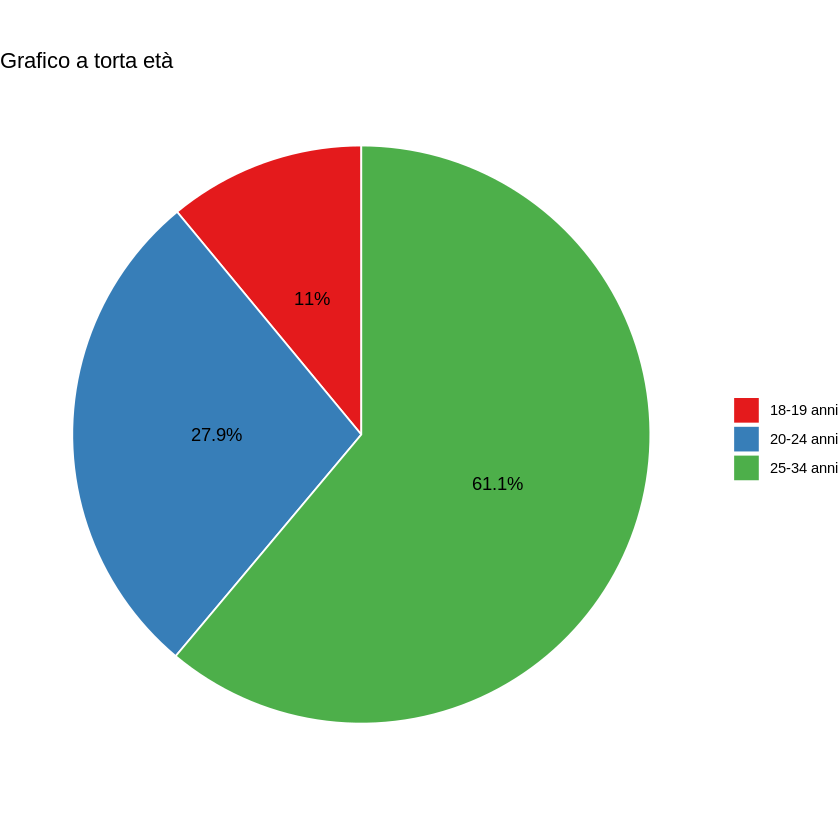

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$ETAMi),
                   "values" =round(as.vector(table(AVQ18.sport$ETAMi))/sum(as.vector(table(AVQ18.sport$ETAMi)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta età")+
scale_fill_brewer(palette="Set1")+
theme_void()

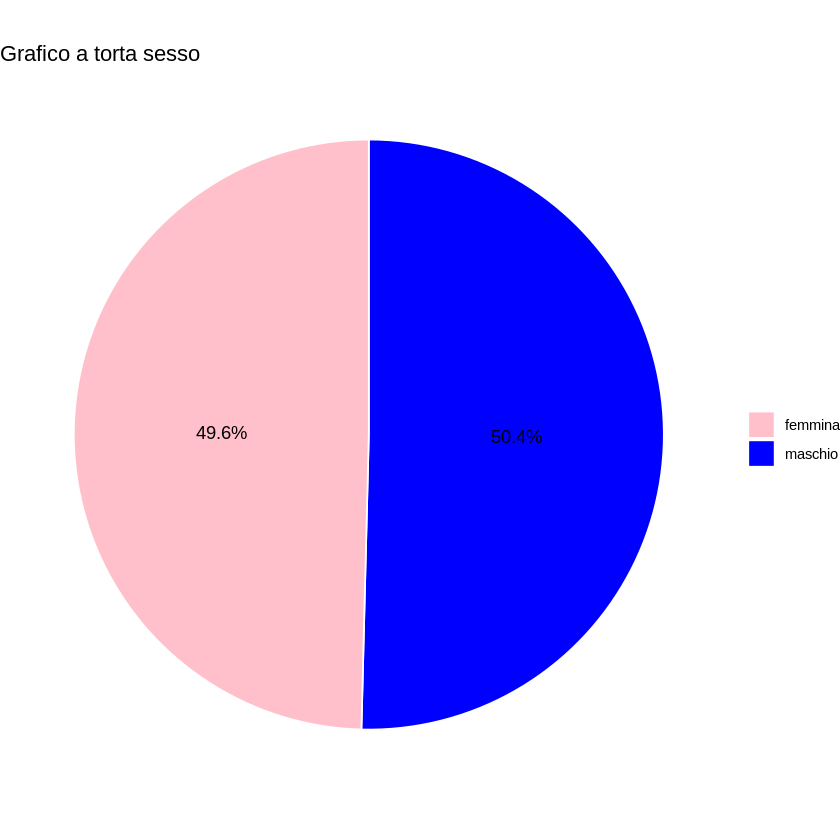

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$SESSO),
                   "values" =round(as.vector(table(AVQ18.sport$SESSO))/sum(as.vector(table(AVQ18.sport$SESSO)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta sesso")+
scale_fill_manual( values=c("pink", "blue"))+
theme_void()

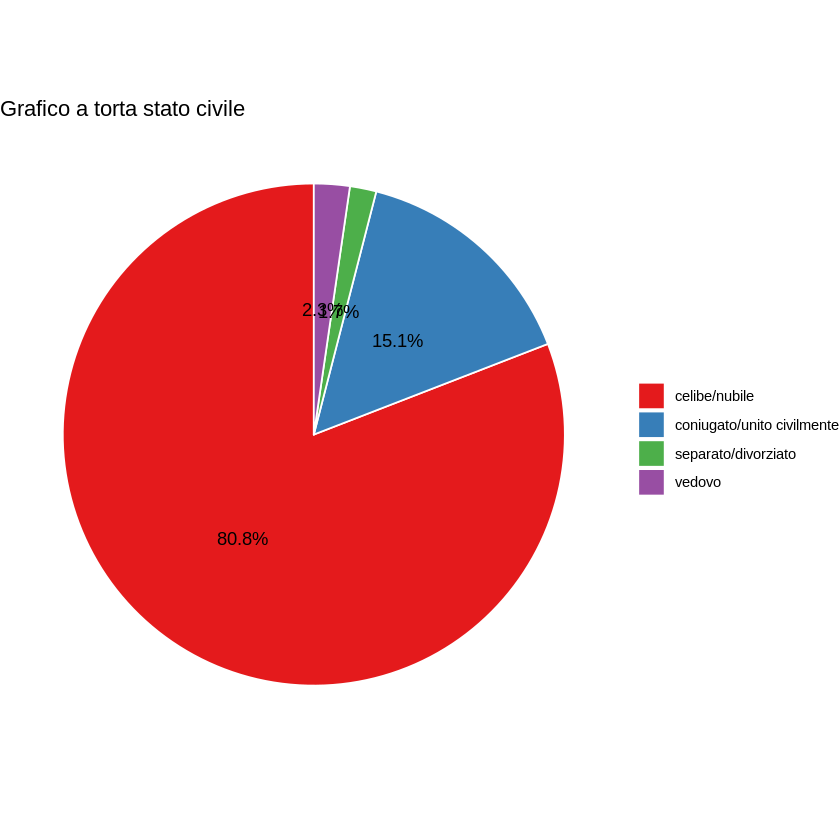

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$STCIVMi),
                   "values" =round(as.vector(table(AVQ18.sport$STCIVMi))/sum(as.vector(table(AVQ18.sport$STCIVMi)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta stato civile")+
scale_fill_brewer(palette="Set1")+
theme_void()

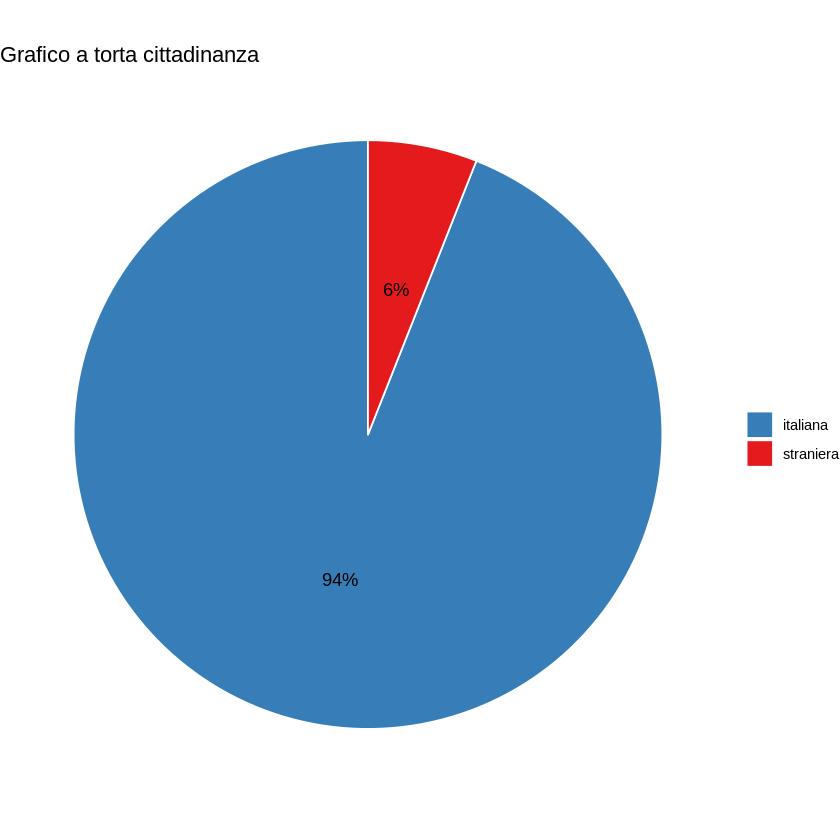

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$CITTMi),
                   "values" =round(as.vector(table(AVQ18.sport$CITTMi))/sum(as.vector(table(AVQ18.sport$CITTMi)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta cittadinanza")+
scale_fill_brewer(palette="Set1", direction=-1)+
theme_void()

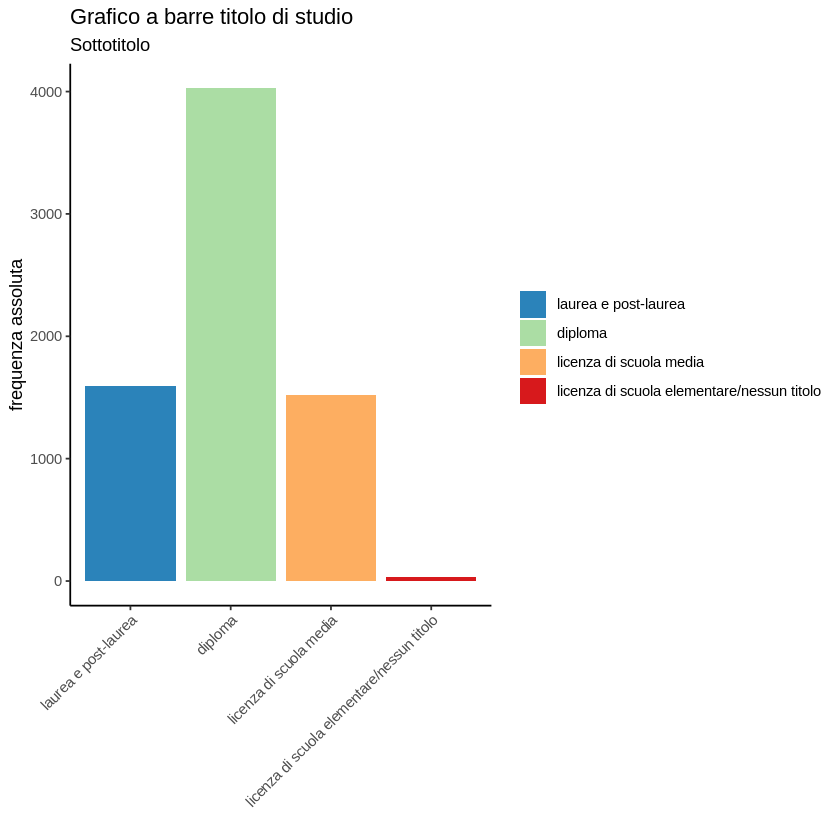

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$ISTRMi),
                   "values" =as.vector(table(AVQ18.sport$ISTRMi)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre titolo di studio", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

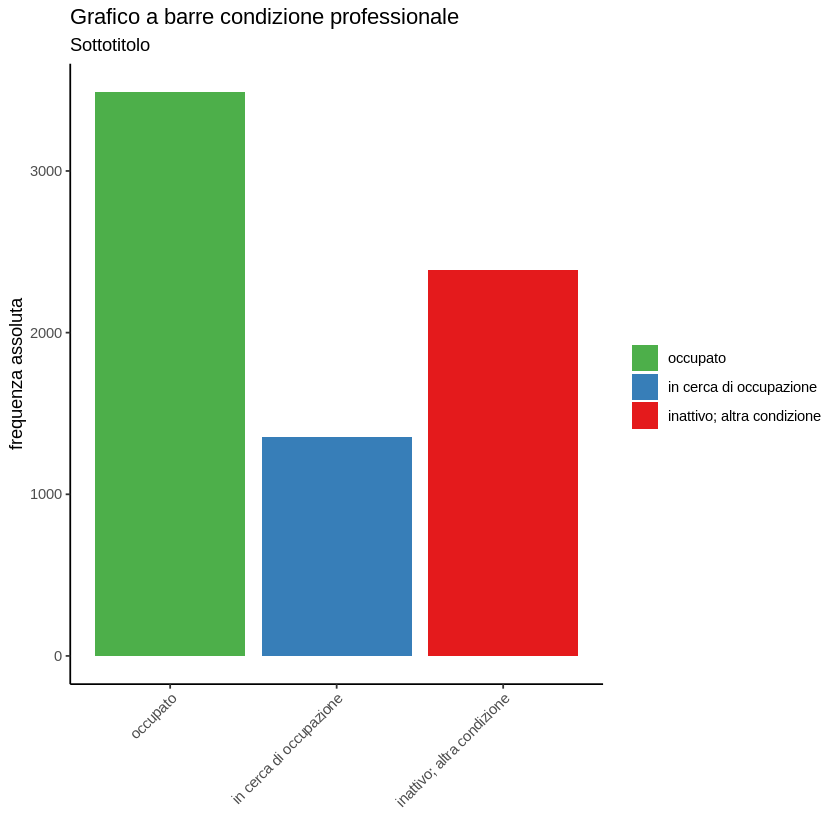

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$CONDMi),
                   "values" =as.vector(table(AVQ18.sport$CONDMi)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre condizione professionale", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Set1", direction=-1)

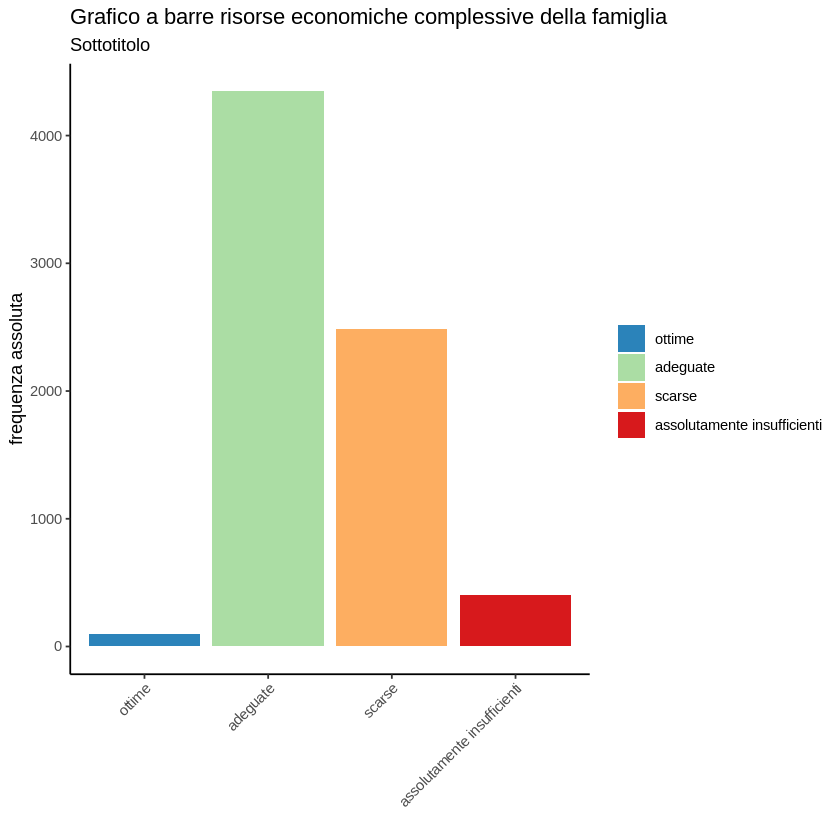

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$RISEC),
                   "values" =as.vector(table(AVQ18.sport$RISEC)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre risorse economiche complessive della famiglia", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

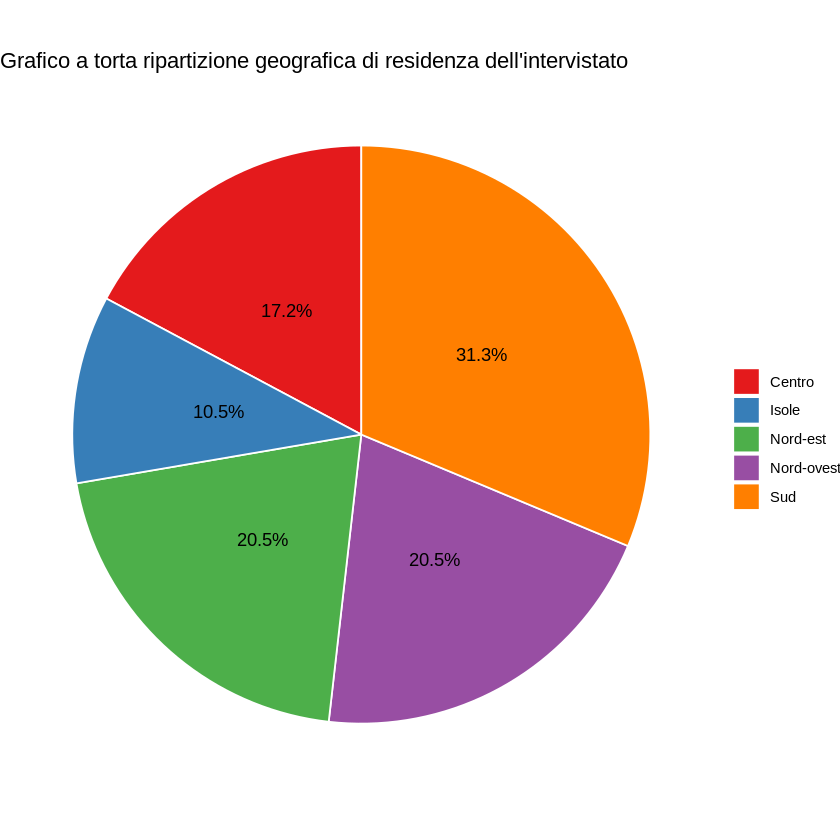

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$RIPMF),
                   "values" =round(as.vector(table(AVQ18.sport$RIPMF))/sum(as.vector(table(AVQ18.sport$RIPMF)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta ripartizione geografica di residenza dell'intervistato")+
scale_fill_brewer(palette="Set1")+
theme_void()

#### Analisi monovariata // Variabili sport e attività fisica

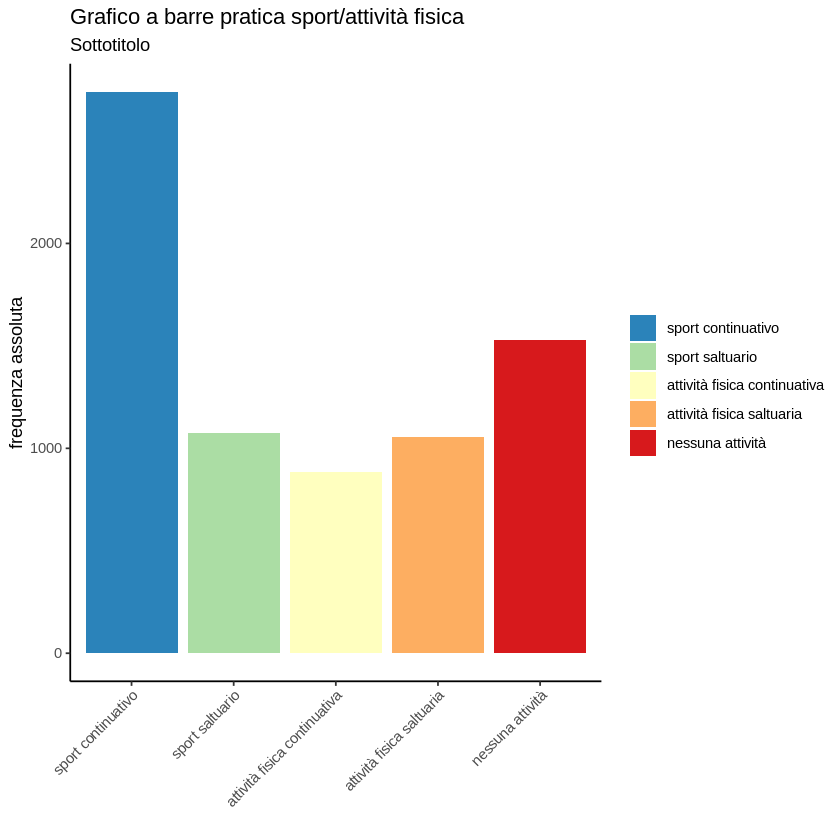

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$SPORT),
                   "values" =as.vector(table(AVQ18.sport$SPORT)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre pratica sport/attività fisica", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

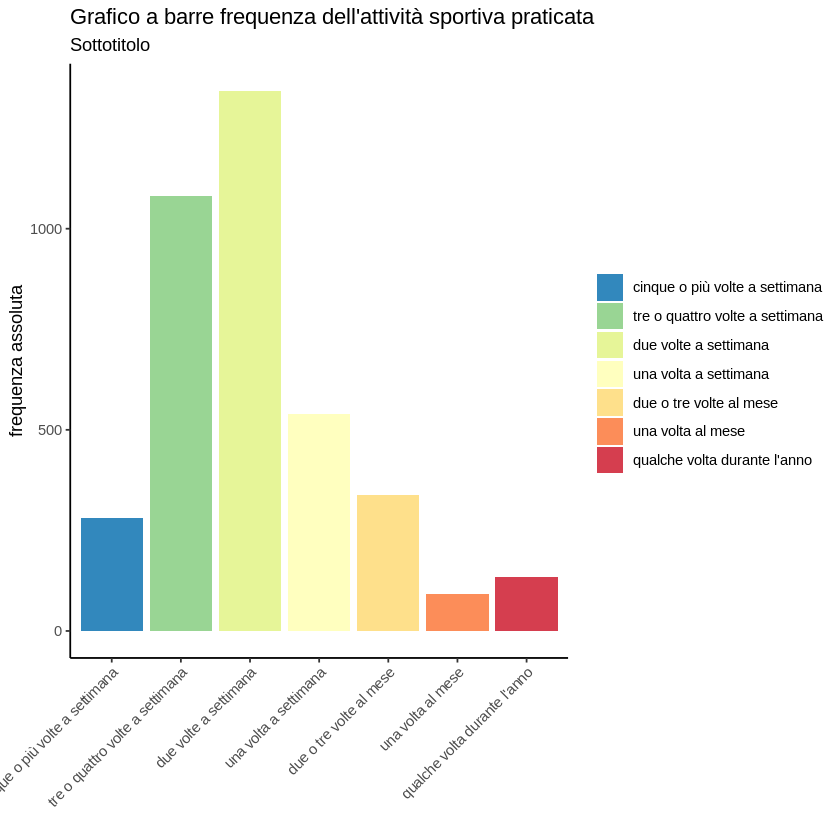

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$FREQSPO),
                   "values" =as.vector(table(AVQ18.sport$FREQSPO)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre frequenza dell'attività sportiva praticata", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

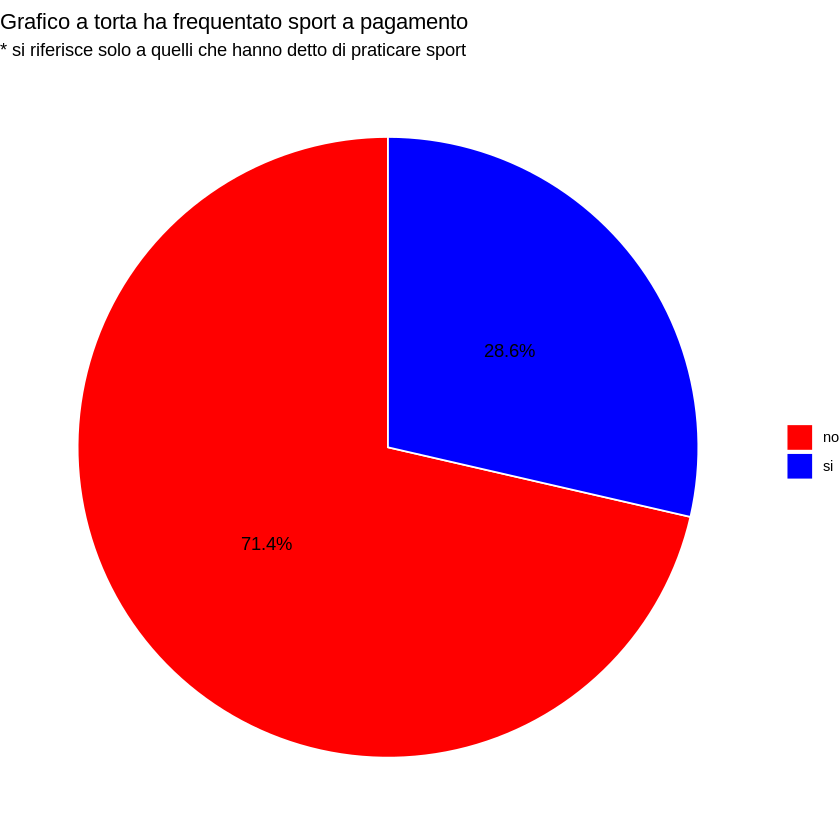

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$SPRIV),
                   "values" =round(as.vector(table(na.omit(AVQ18.sport$SPRIV)))/length(as.vector(na.omit(AVQ18.sport$SPRIV)))*100,1))

ggplot(data, aes(x="", y=values, fill=class)) +
coord_polar("y", start=0) +
geom_bar(stat="identity", width=1, color="white") +
geom_text(aes(label = paste0(values, "%")), position = position_stack(vjust = 0.5)) +
labs(x = NULL, y = NULL, fill = NULL, title = "Grafico a torta ha frequentato sport a pagamento", subtitle = "* si riferisce solo a quelli che hanno detto di praticare sport")+
scale_fill_manual( values=c("red", "blue"))+
theme_void()

#### Analisi monovariata // Variabili BMI, salute percepita e soddisfazione per il tempo libero

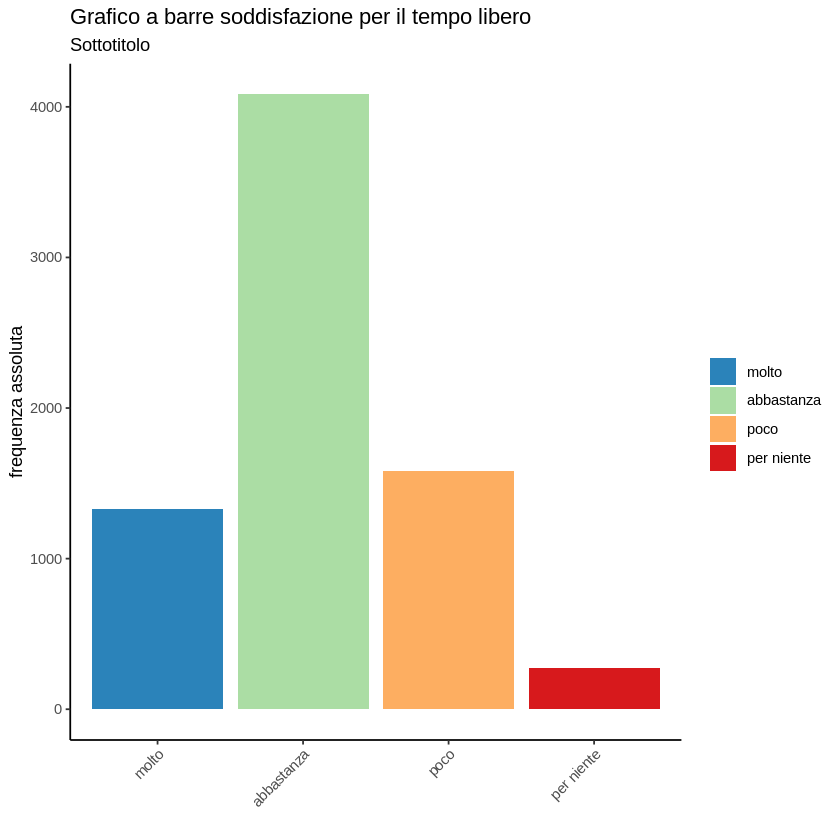

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$TEMLIB),
                   "values" =as.vector(table(AVQ18.sport$TEMLIB)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre soddisfazione per il tempo libero", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

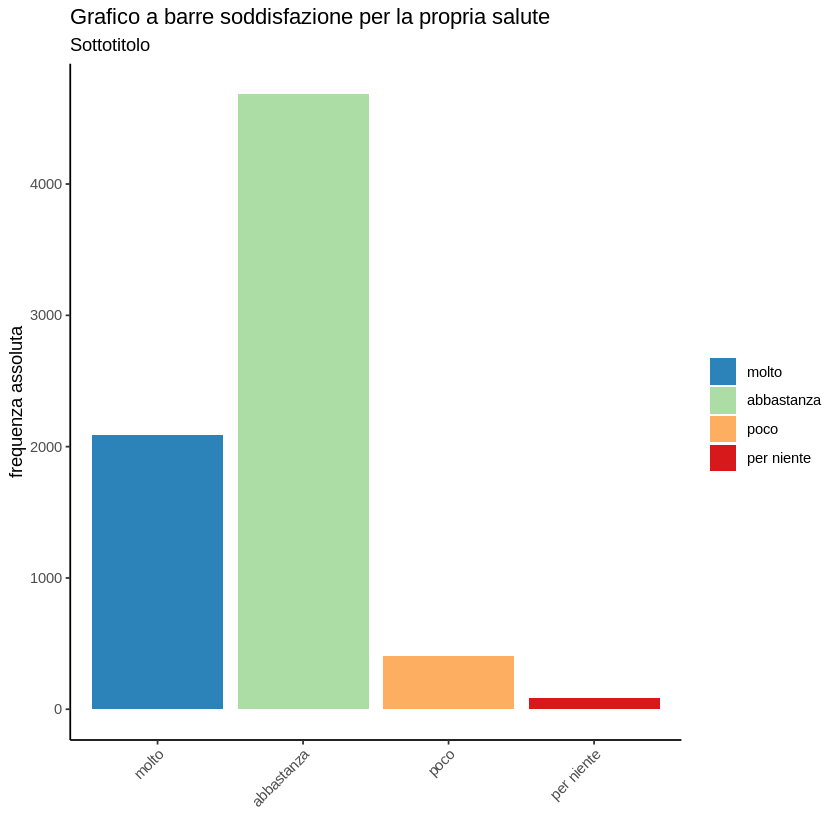

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$SALUT),
                   "values" =as.vector(table(AVQ18.sport$SALUT)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre soddisfazione per la propria salute", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="Spectral", direction=-1)

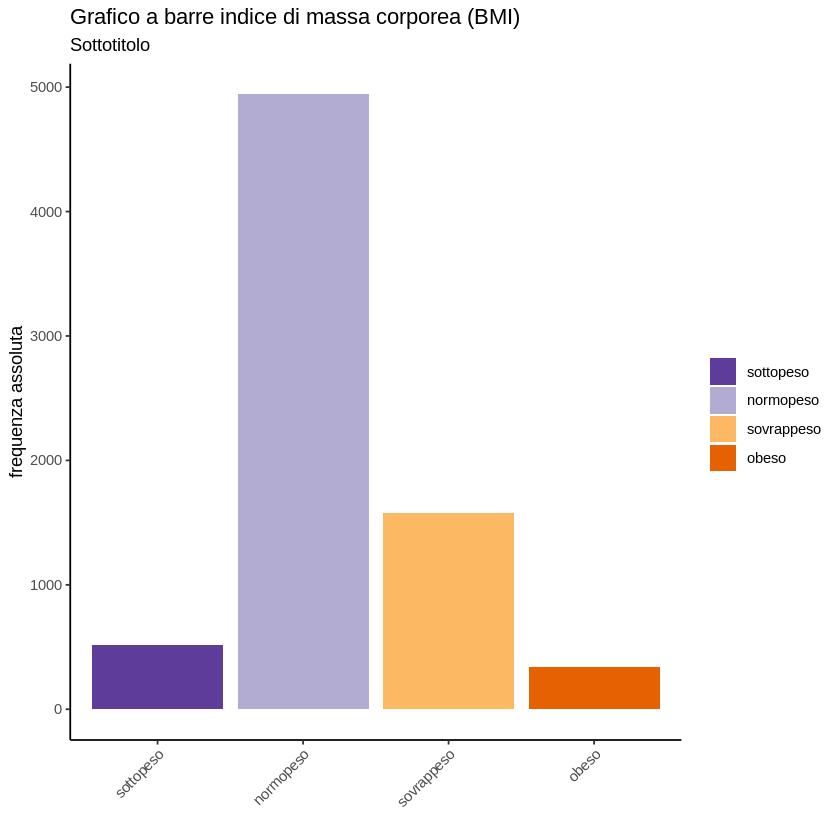

In [ ]:
data <- data.frame("class" = levels(AVQ18.sport$BMI),
                   "values" =as.vector(table(AVQ18.sport$BMI)))
data$class <- factor(data$class, levels = data[["class"]])

ggplot(data, aes(x=class, y=values, fill=class))+
geom_bar(stat="identity")+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
labs(title = "Grafico a barre indice di massa corporea (BMI)", subtitle = "Sottotitolo", y = "frequenza assoluta", x="", fill = "")+
scale_fill_brewer(palette="PuOr", direction=-1)

#### Nuova bivariata

In [ ]:
# PROVAAAAAAAAAAAAAAAAAAAAAAAAA
tab.BMI<-table(AVQ18.sport$BMI,AVQ18.sport$SPORT)
tab.BMI
chisq.test(tab.BMI)
tab.SAL<-table(AVQ18.sport$SALUT,AVQ18.sport$SPORT)
tab.SAL
chisq.test(tab.SAL)
par(mfrow = c(1,2), col.axis = "white", col.lab = "white", tck = 0)
mosaicplot(tab.BMI, shade = TRUE, las=2, main="BMIxSPORT")
mosaicplot(tab.SAL, shade = TRUE, las=2, main="SALUTxSPORT")

            
             sport continuativo sport saltuario attività fisica continuativa
  sottopeso                 156              82                           76
  normopeso                1995             703                          598
  sovrappeso                512             258                          164
  obeso                      77              31                           45
            
             attività fisica saltuaria nessuna attività
  sottopeso                         92              105
  normopeso                        636              949
  sovrappeso                       252              367
  obeso                             76              107


	Pearson's Chi-squared test

data:  tab
X-squared = 126.9, df = 12, p-value < 2.2e-16


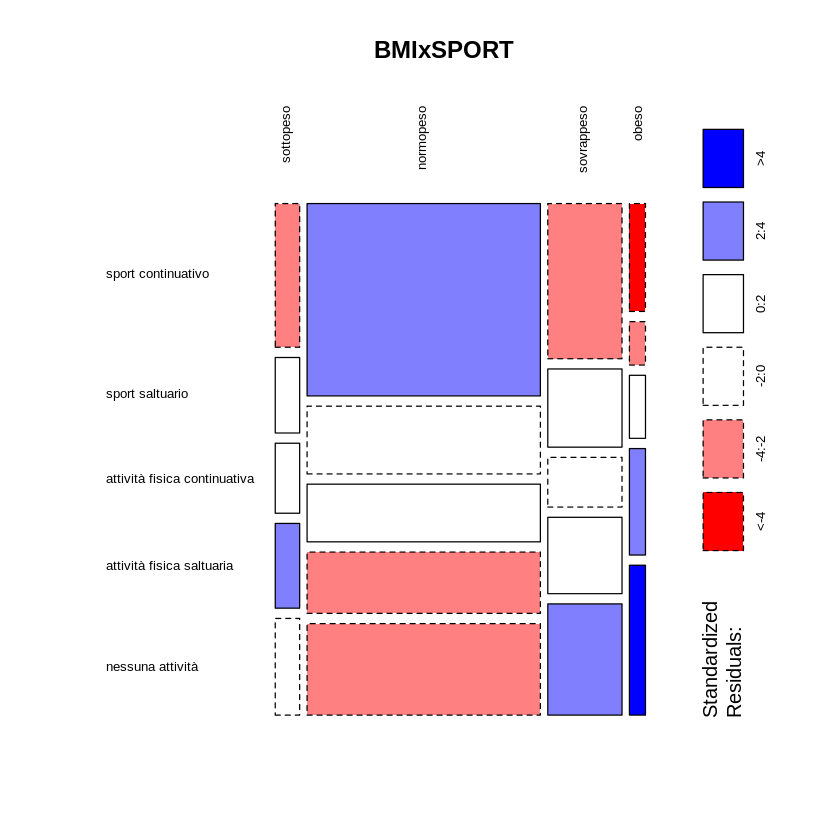

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$SPORT)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxSPORT")

            
             sport continuativo sport saltuario attività fisica continuativa
  molto                     932             298                          226
  abbastanza               1651             693                          575
  poco                      108              55                           57
  per niente                 18              14                            9
            
             attività fisica saltuaria nessuna attività
  molto                            256              353
  abbastanza                       697             1011
  poco                              83              100
  per niente                        12               34


	Pearson's Chi-squared test

data:  tab
X-squared = 110.26, df = 12, p-value < 2.2e-16


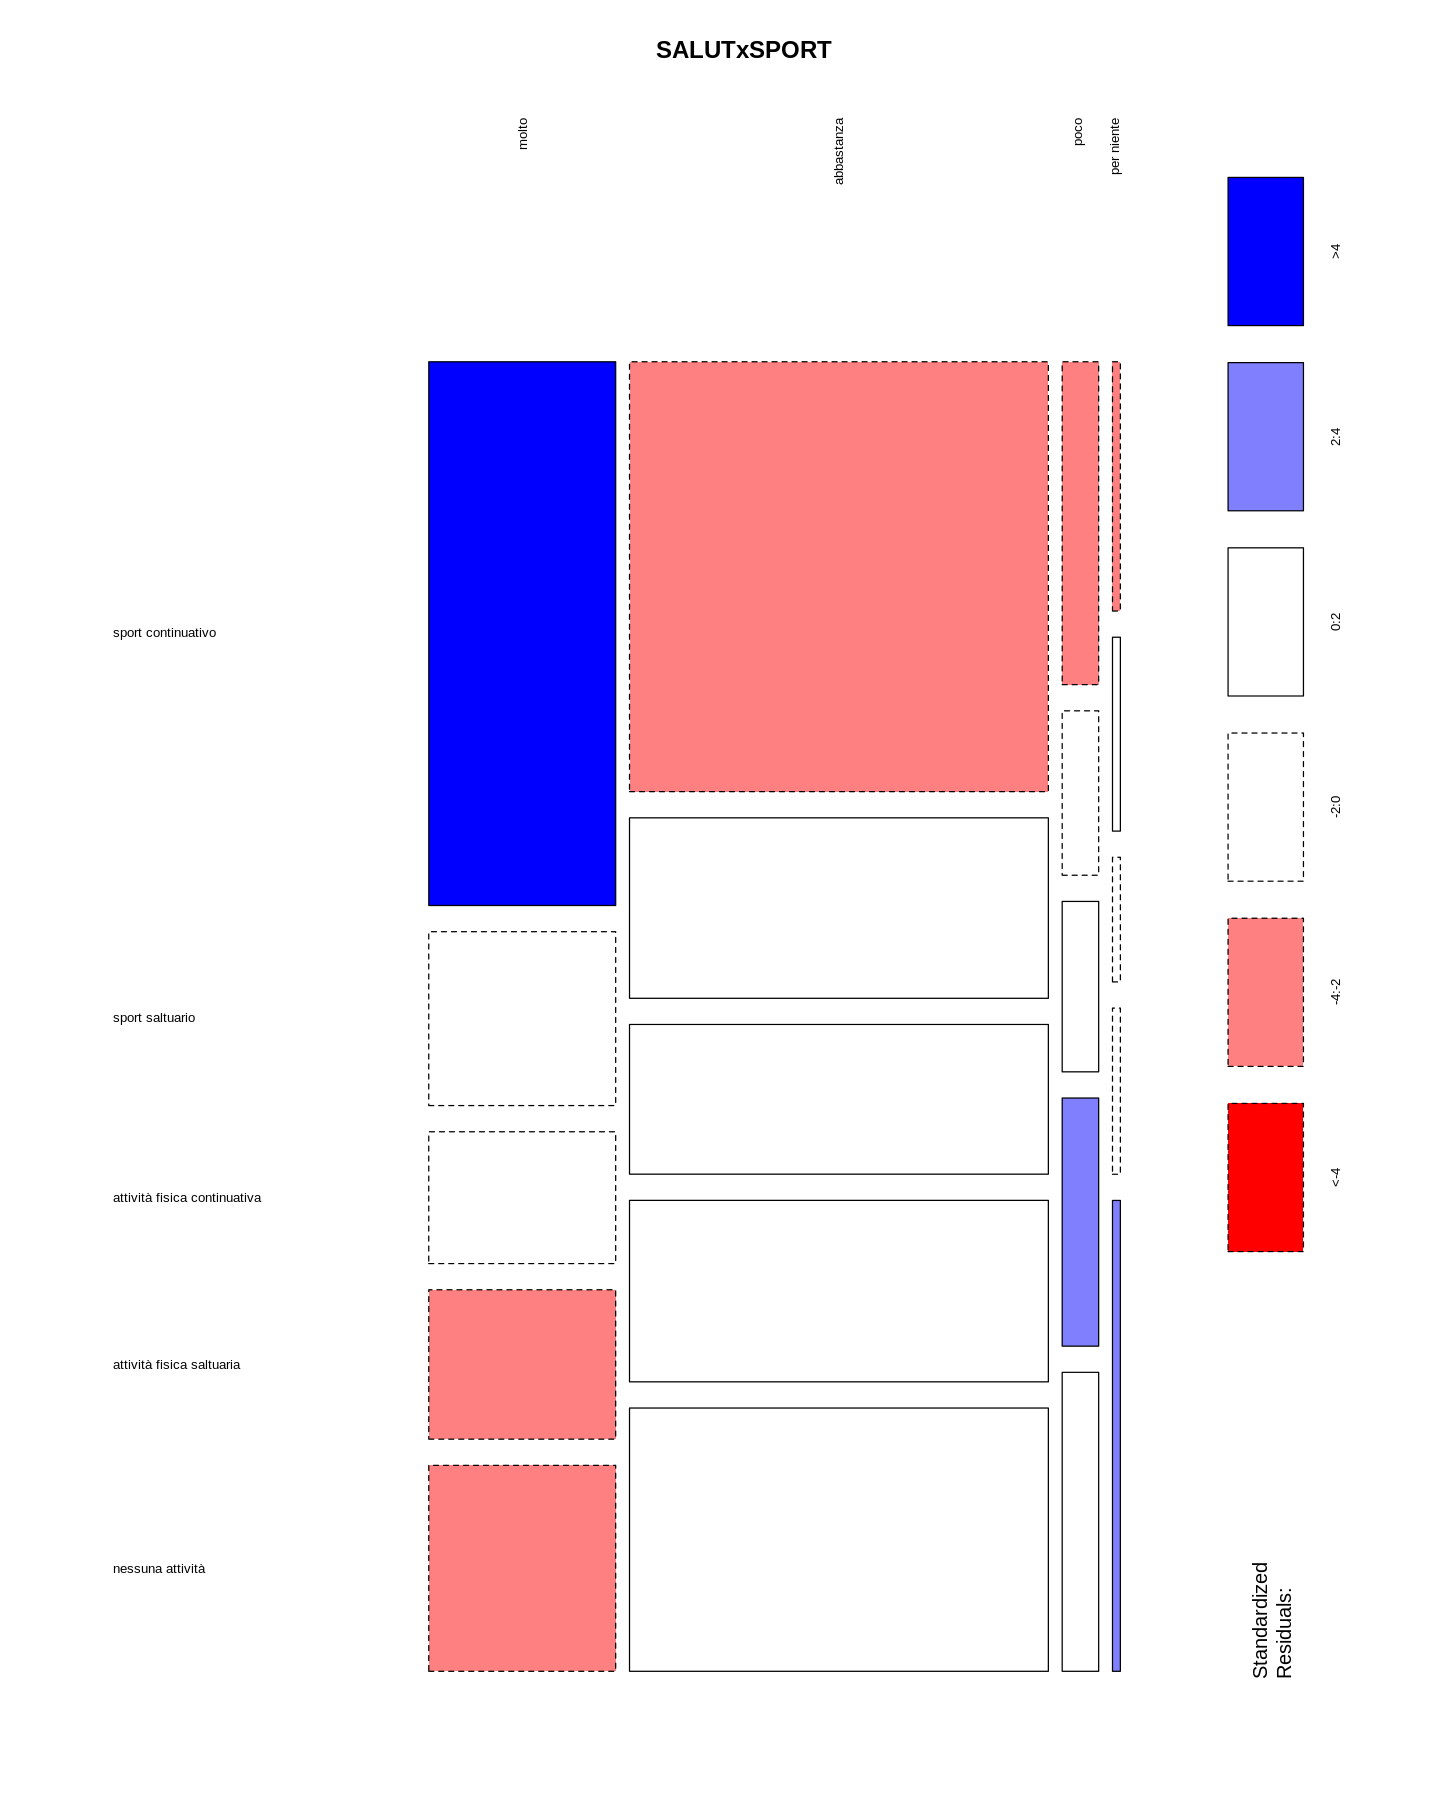

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$SPORT)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxSPORT")

            
             cinque o più volte a settimana tre o quattro volte a settimana
  sottopeso                              15                              45
  normopeso                             211                             813
  sovrappeso                             47                             198
  obeso                                   9                              26
            
             due volte a settimana una volta a settimana
  sottopeso                     87                    42
  normopeso                    955                   356
  sovrappeso                   262                   124
  obeso                         39                    17
            
             due o tre volte al mese una volta al mese
  sottopeso                       29                 9
  normopeso                      218                54
  sovrappeso                      85                26
  obeso                            7                 2
            
        

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 45.196, df = 18, p-value = 0.0003882


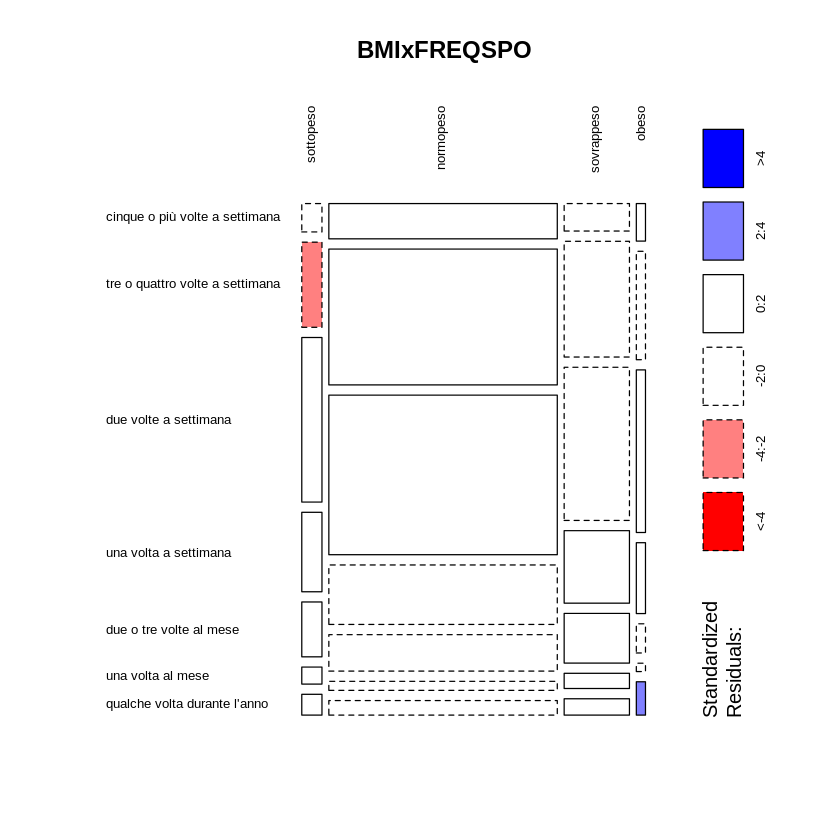

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$FREQSPO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxFREQSPO")

            
             Nord-ovest Nord-est Centro  Sud Isole
  sottopeso         135      124    100  111    47
  normopeso        1003     1015    873 1522   523
  sovrappeso        310      304    235  547   176
  obeso              60       70     58  127    24


	Pearson's Chi-squared test

data:  tab
X-squared = 52.643, df = 12, p-value = 4.767e-07


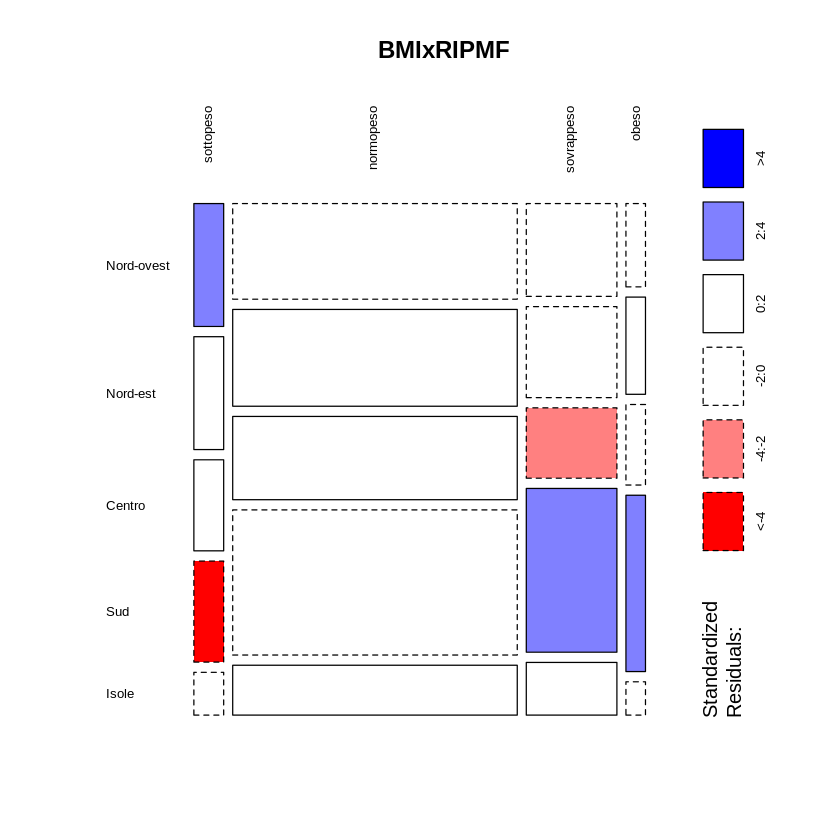

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxRIPMF")

            
             ottime adeguate scarse assolutamente insufficienti
  sottopeso       7      303    184                          22
  normopeso      67     2940   1644                         261
  sovrappeso     21      921    534                          91
  obeso           3      181    125                          28

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 11.294, df = 9, p-value = 0.2561


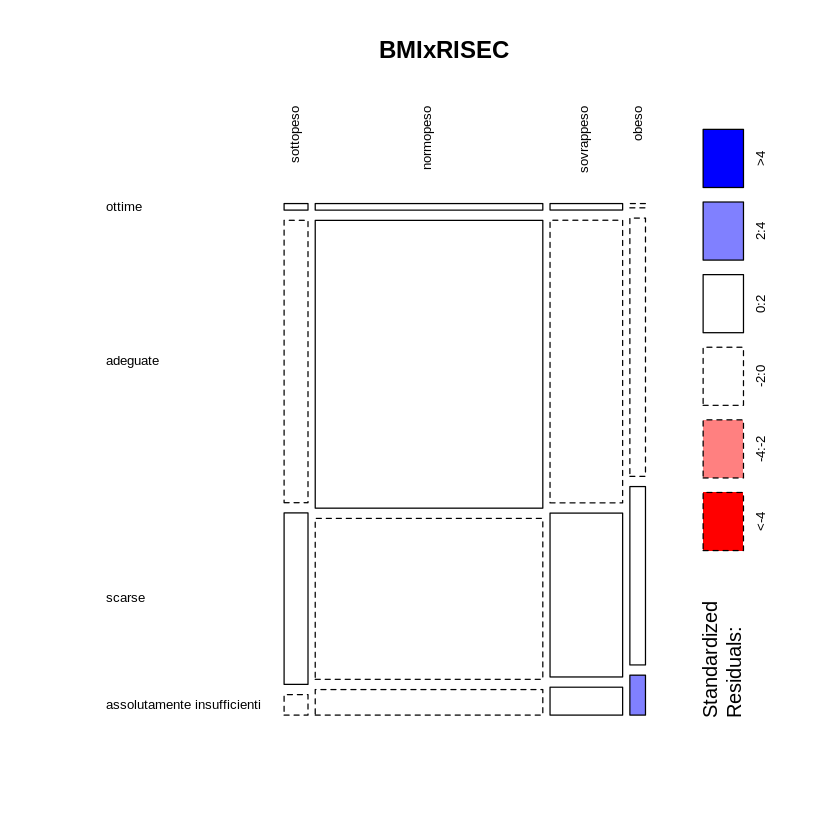

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$RISEC)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxRISEC")

#### Analisi bivariata

            
             maschio femmina
  sottopeso       76     442
  normopeso     2398    2543
  sovrappeso    1052     522
  obeso          190     149


	Pearson's Chi-squared test

data:  tab
X-squared = 445.82, df = 3, p-value < 2.2e-16


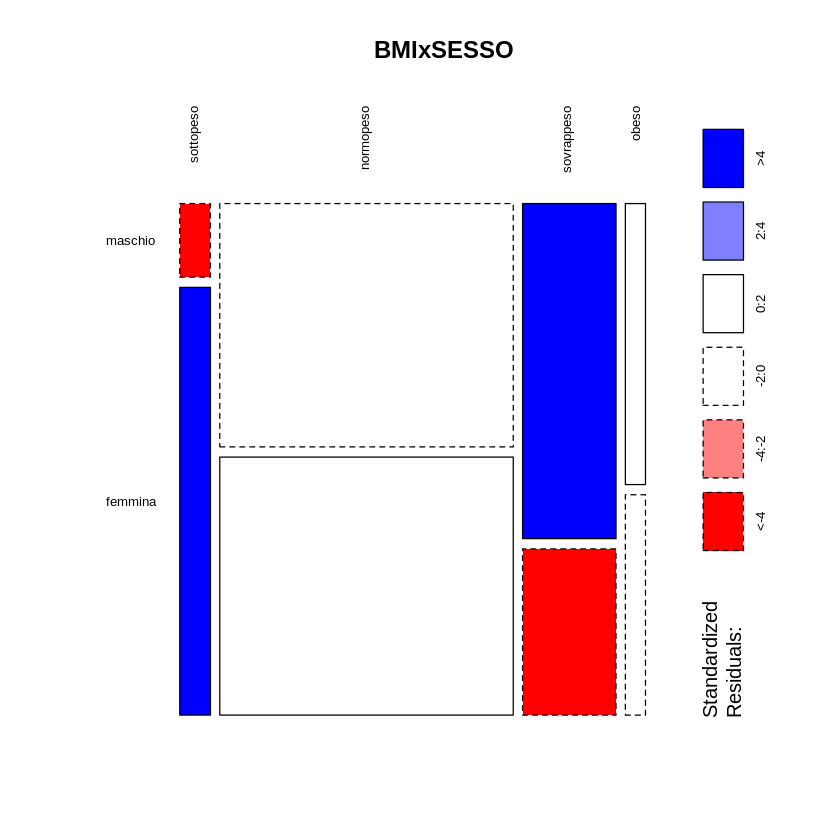

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxSESSO")

            
             maschio femmina
  molto         1103     988
  abbastanza    2335    2347
  poco           176     232
  per niente      52      36


	Pearson's Chi-squared test

data:  tab
X-squared = 16.406, df = 3, p-value = 0.0009361


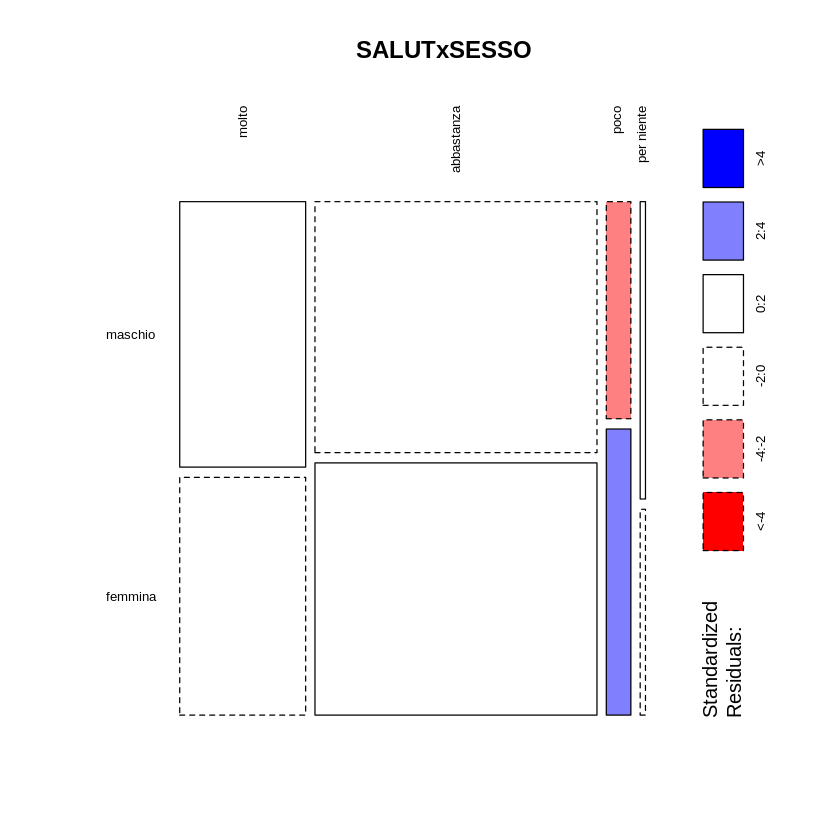

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxSESSO")

            
             maschio femmina
  molto          645     686
  abbastanza    2079    2003
  poco           799     782
  per niente     139     135


	Pearson's Chi-squared test

data:  tab
X-squared = 2.4878, df = 3, p-value = 0.4775


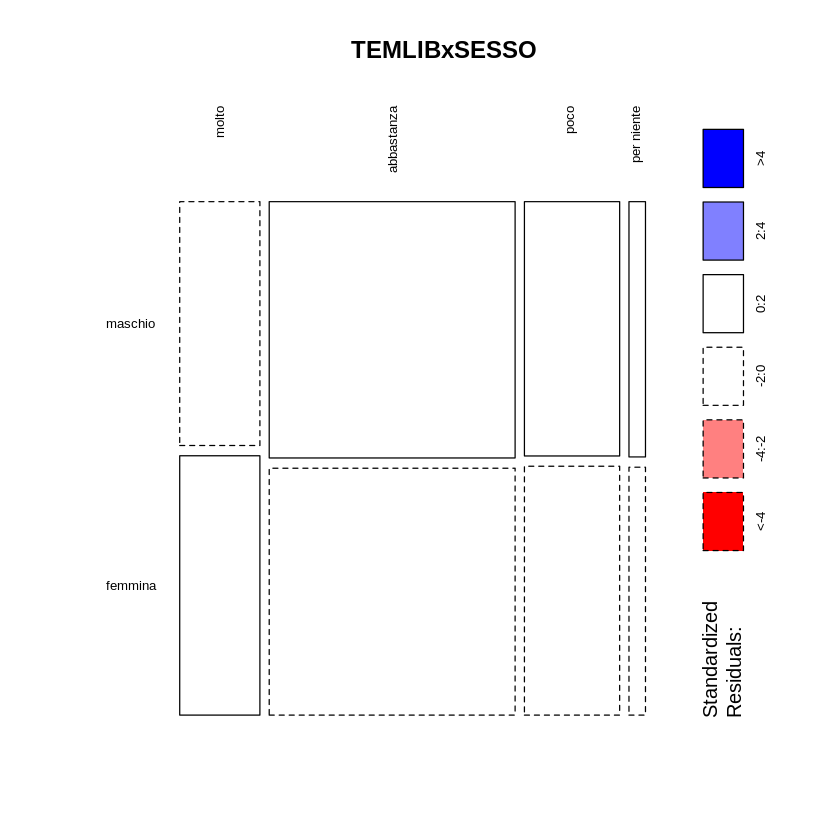

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxSESSO")

    
     maschio femmina
  no    2089    2526
  si    1618    1122


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 130.15, df = 1, p-value < 2.2e-16


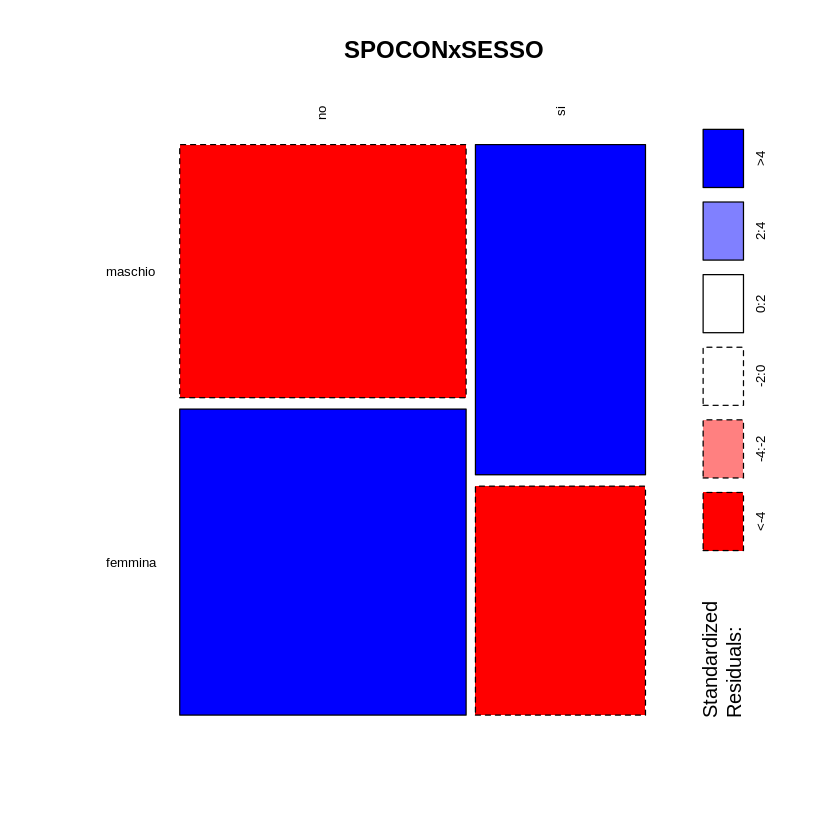

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxSESSO")

    
     maschio femmina
  no    1477    2050
  si     606     468


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 69.738, df = 1, p-value < 2.2e-16


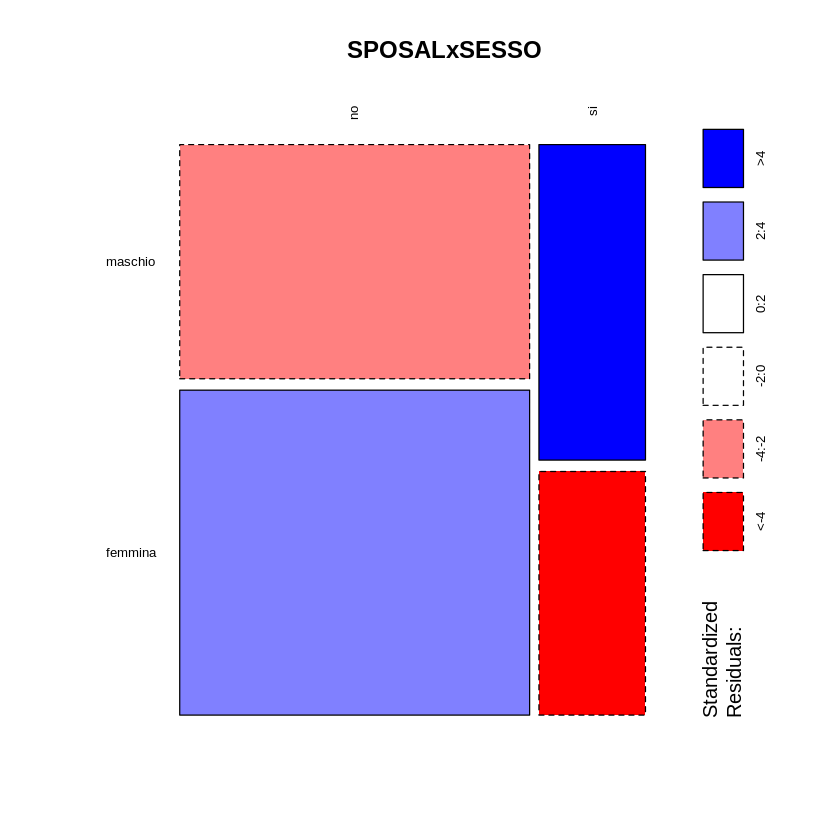

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxSESSO")

                                 
                                  maschio femmina
  no                                  684     844
  si, una o più volte a settimana     332     551
  si, una o più volte al mese         220     304
  si, più raramente                   218     314


	Pearson's Chi-squared test

data:  tab
X-squared = 12.042, df = 3, p-value = 0.007241


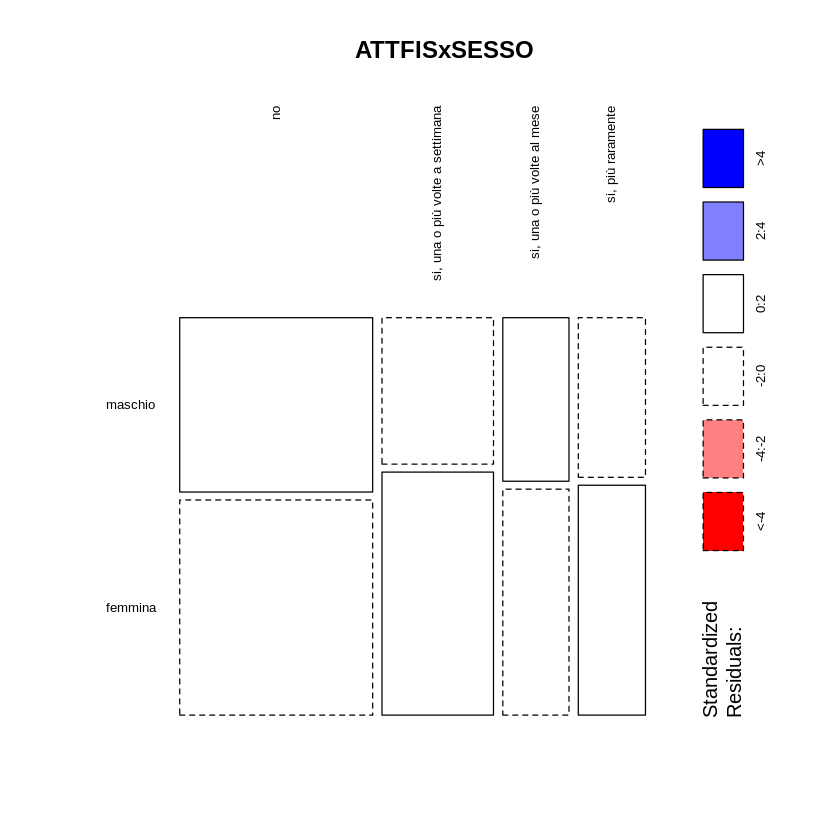

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxSESSO")

                                 
                                  maschio femmina
  cinque o più volte a settimana      187      95
  tre o quattro volte a settimana     670     412
  due volte a settimana               729     614
  una volta a settimana               314     225
  due o tre volte al mese             194     145
  una volta al mese                    48      43
  qualche volta durante l'anno         79      55


	Pearson's Chi-squared test

data:  tab
X-squared = 23.545, df = 6, p-value = 0.0006331


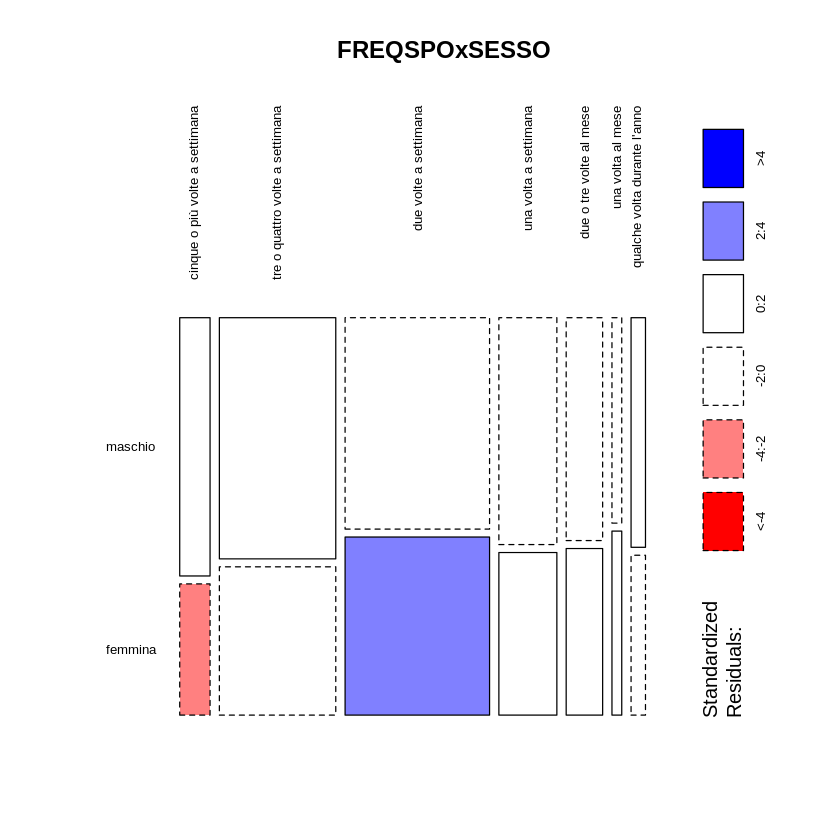

In [ ]:
tab<-table(AVQ18.sport$FREQSPO,AVQ18.sport$SESSO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="FREQSPOxSESSO")

            
             18-19 anni 20-24 anni 25-34 anni
  sottopeso          83        178        257
  normopeso         603       1475       2863
  sovrappeso        108        338       1128
  obeso              17         65        257


	Pearson's Chi-squared test

data:  tab
X-squared = 161, df = 6, p-value < 2.2e-16


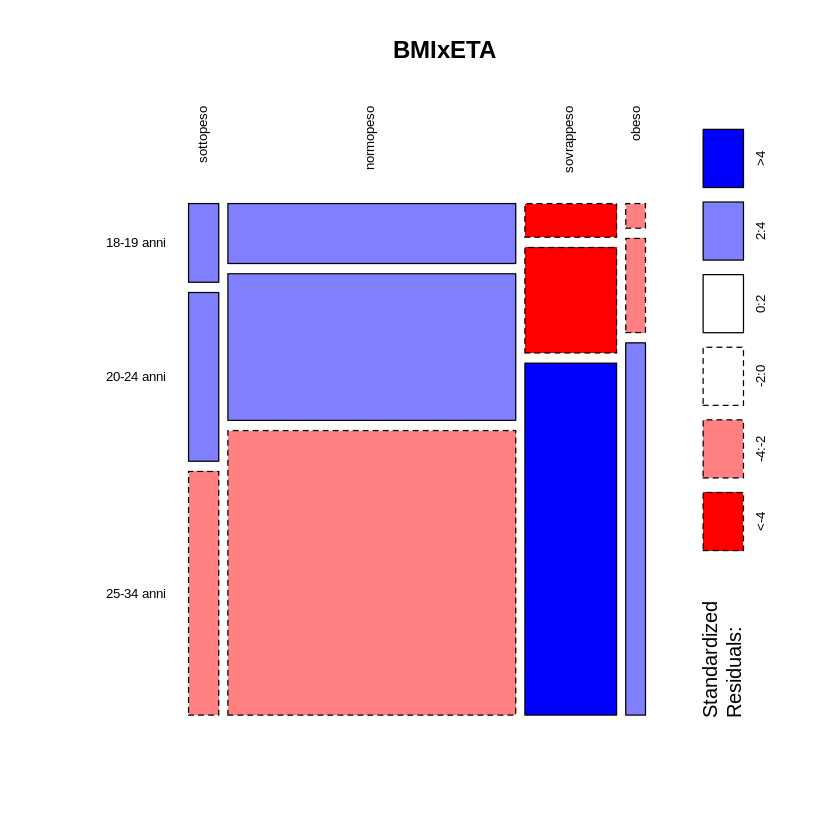

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxETA")

            
             18-19 anni 20-24 anni 25-34 anni
  molto             276        655       1160
  abbastanza        474       1254       2954
  poco               42         93        273
  per niente          9         26         53


	Pearson's Chi-squared test

data:  tab
X-squared = 43.59, df = 6, p-value = 8.914e-08


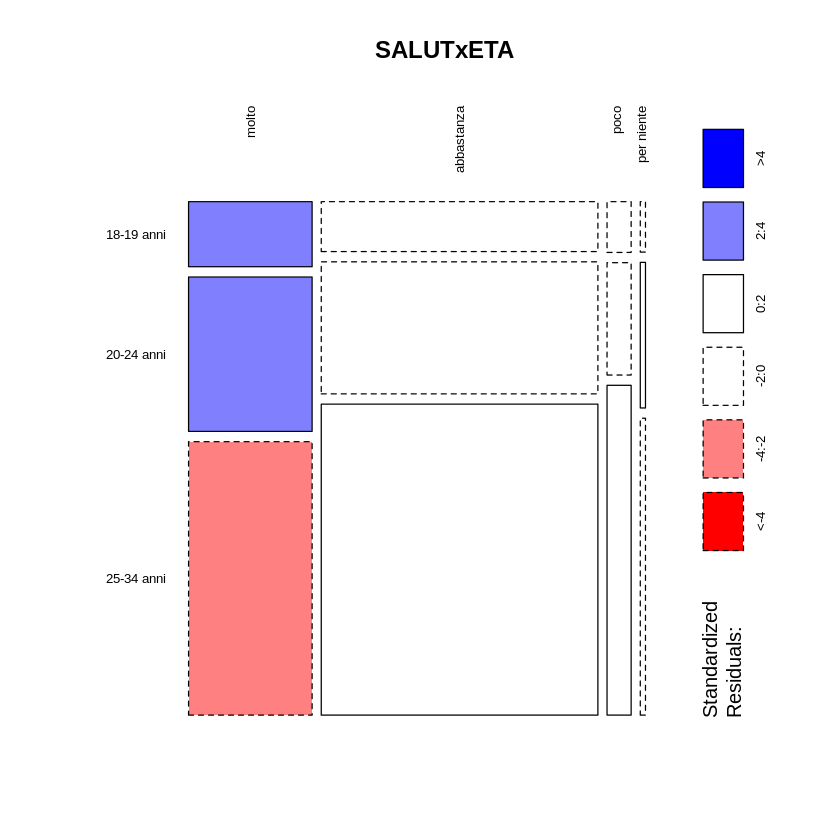

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxETA")

            
             18-19 anni 20-24 anni 25-34 anni
  molto             204        460        667
  abbastanza        467       1148       2467
  poco              112        363       1106
  per niente         17         56        201


	Pearson's Chi-squared test

data:  tab
X-squared = 145.27, df = 6, p-value < 2.2e-16


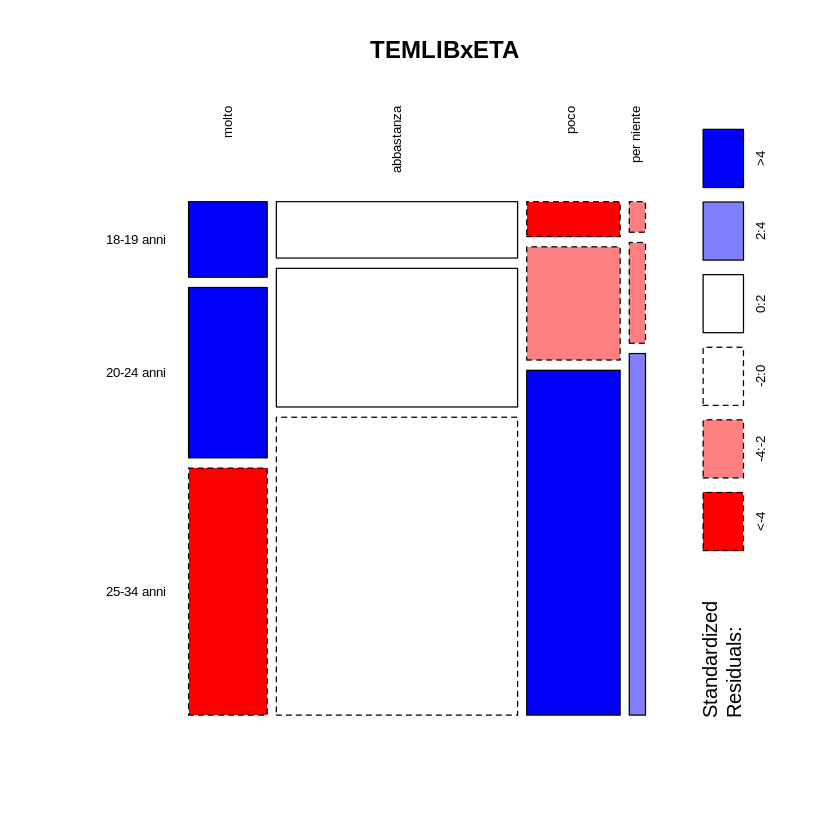

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxETA")

    
     18-19 anni 20-24 anni 25-34 anni
  no        483       1229       2903
  si        324        825       1591


	Pearson's Chi-squared test

data:  tab
X-squared = 16.93, df = 2, p-value = 0.0002107


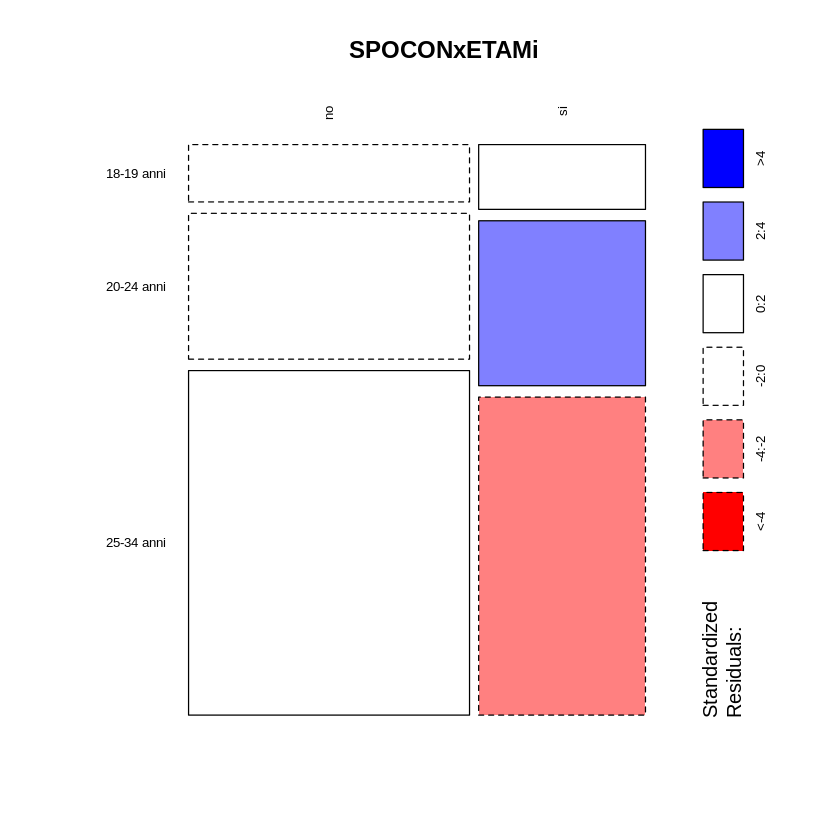

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxETAMi")

    
     18-19 anni 20-24 anni 25-34 anni
  no        363        889       2275
  si        119        335        620


	Pearson's Chi-squared test

data:  tab
X-squared = 17.583, df = 2, p-value = 0.000152


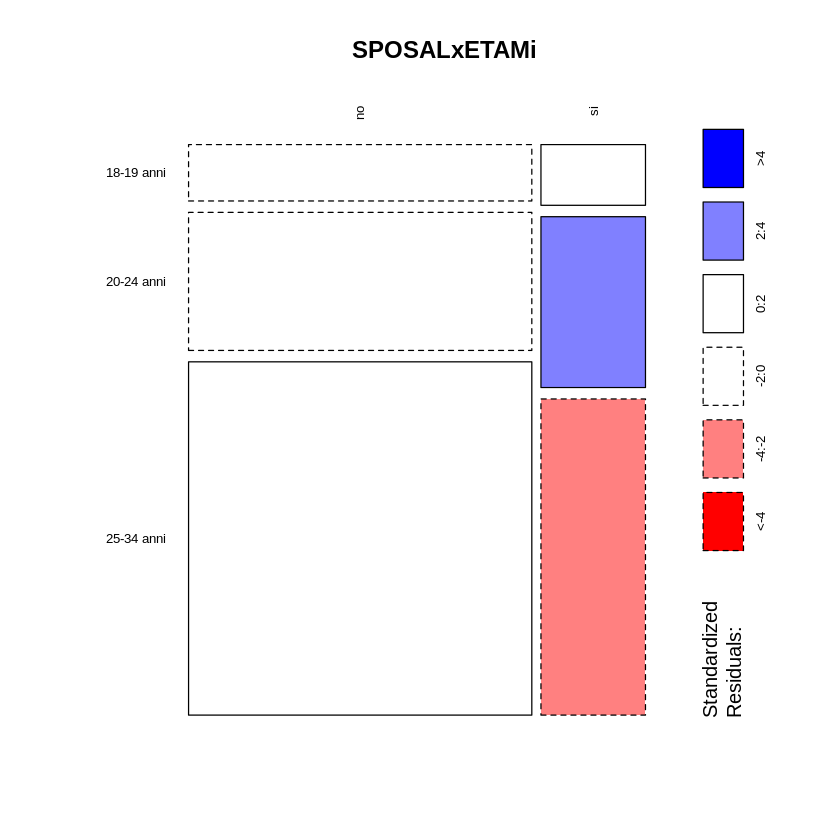

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxETAMi")

                                 
                                  18-19 anni 20-24 anni 25-34 anni
  no                                     145        375       1008
  si, una o più volte a settimana        100        239        544
  si, una o più volte al mese             52        136        336
  si, più raramente                       61        128        343


	Pearson's Chi-squared test

data:  tab
X-squared = 6.1458, df = 6, p-value = 0.4071


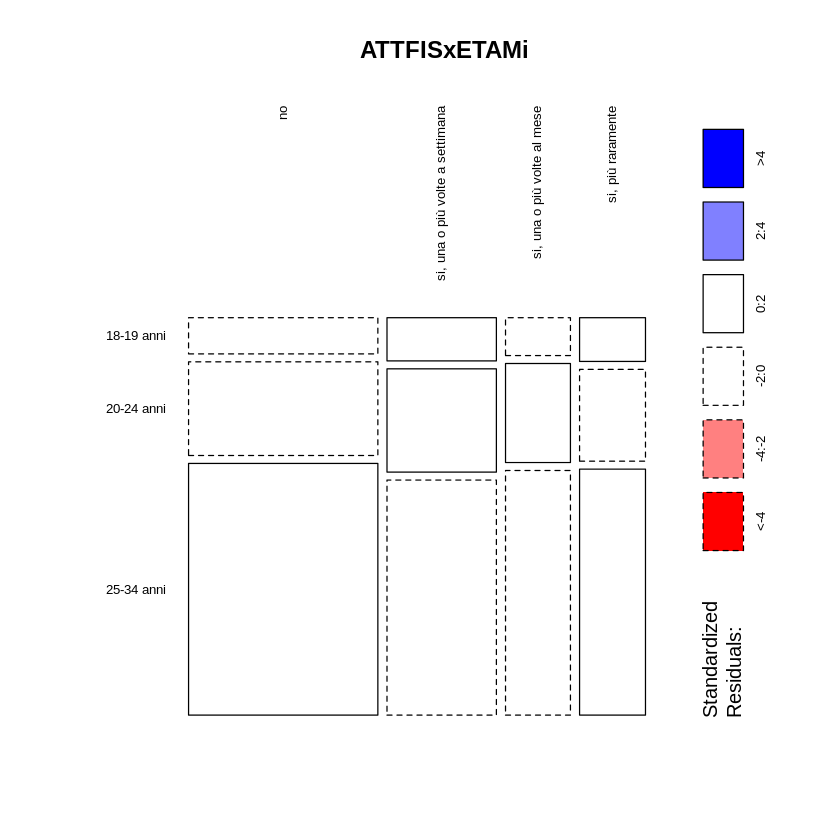

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxETAMi")

                                 
                                  18-19 anni 20-24 anni 25-34 anni
  cinque o più volte a settimana          33        101        148
  tre o quattro volte a settimana        155        352        575
  due volte a settimana                  139        386        818
  una volta a settimana                   52        142        345
  due o tre volte al mese                 45        111        183
  una volta al mese                        9         25         57
  qualche volta durante l'anno             8         42         84


	Pearson's Chi-squared test

data:  tab
X-squared = 37.605, df = 12, p-value = 0.0001782


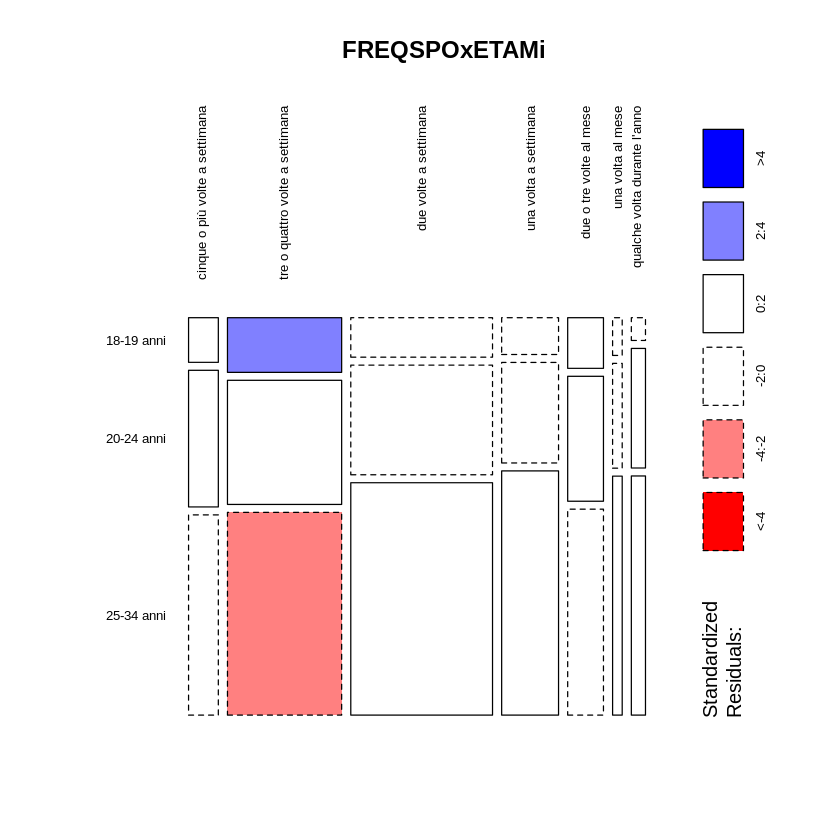

In [ ]:
tab<-table(AVQ18.sport$FREQSPO,AVQ18.sport$ETAMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="FREQSPOxETAMi")

            
             molto abbastanza poco per niente
  sottopeso    149        317   36          6
  normopeso   1456       3108  257         50
  sovrappeso   416       1026   87         27
  obeso         70        231   28          5

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 26.488, df = 9, p-value = 0.001699


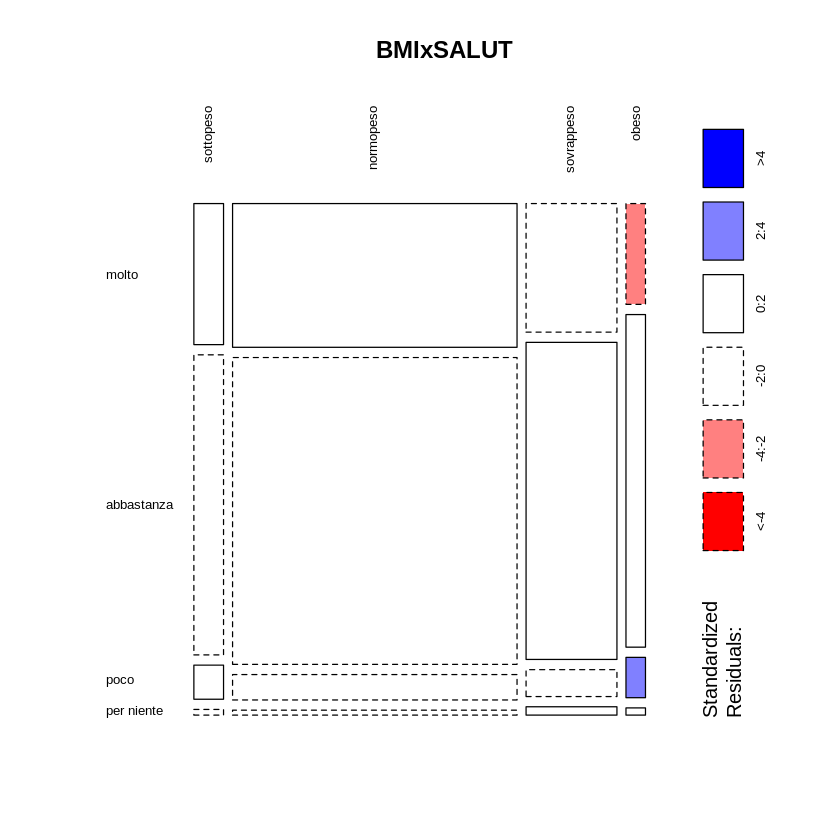

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$SALUT)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxSALUT")

            
             Nord-ovest Nord-est Centro  Sud Isole
  sottopeso         135      124    100  111    47
  normopeso        1003     1015    873 1522   523
  sovrappeso        310      304    235  547   176
  obeso              60       70     58  127    24


	Pearson's Chi-squared test

data:  tab
X-squared = 52.643, df = 12, p-value = 4.767e-07


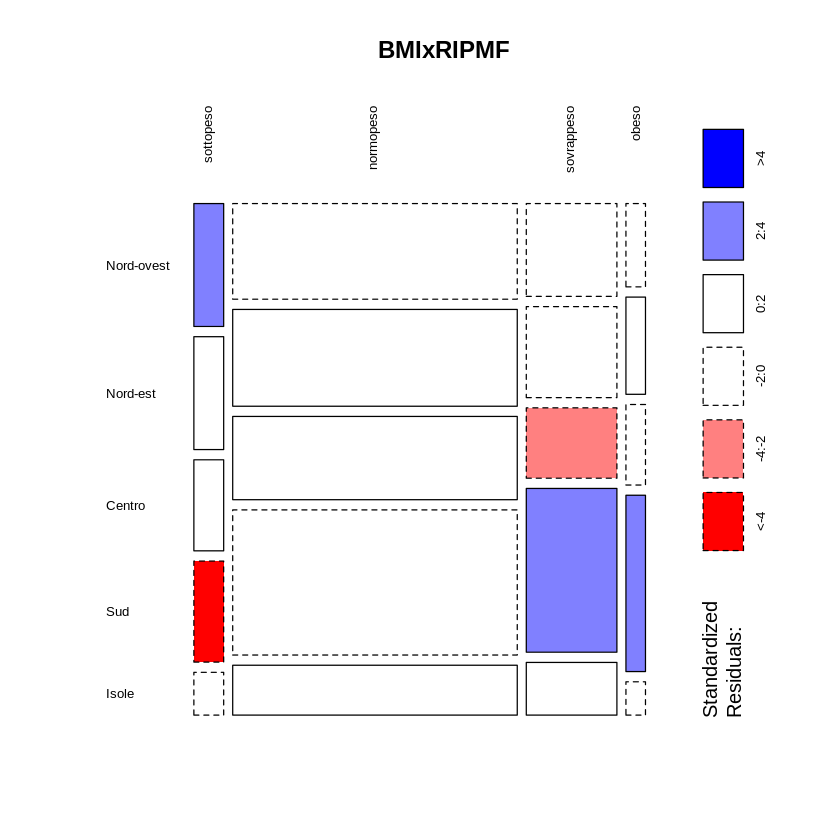

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxRIPMF")

            
             Nord-ovest Nord-est Centro  Sud Isole
  molto             470      489    368  577   186
  abbastanza        909      897    804 1557   508
  poco               99       85     72  110    42
  per niente         15       22     13   26    12


	Pearson's Chi-squared test

data:  tab
X-squared = 47.734, df = 12, p-value = 3.477e-06


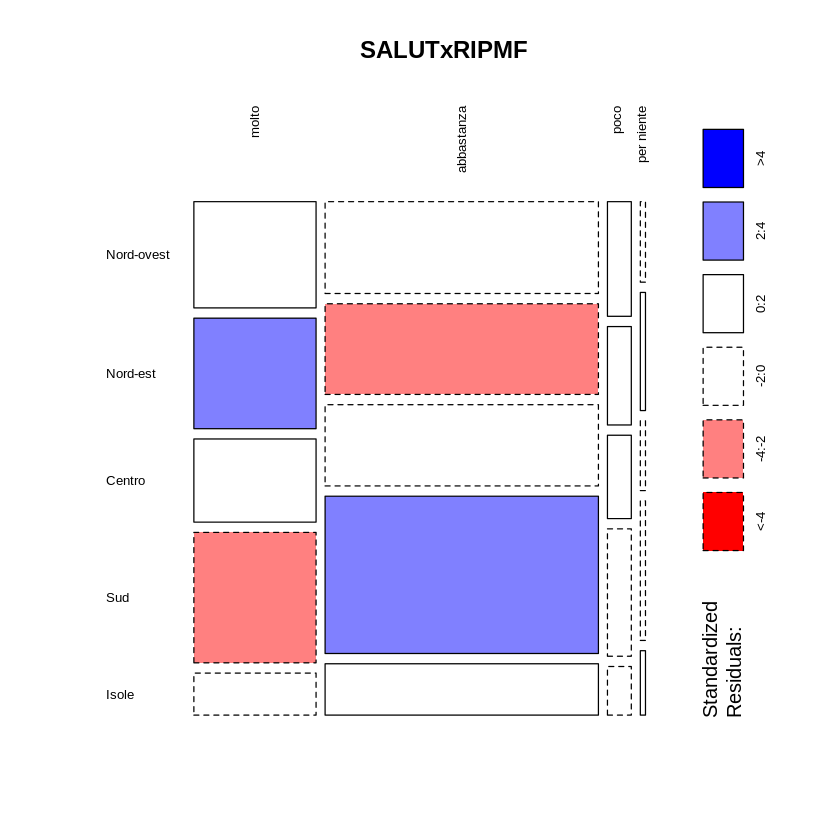

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxRIPMF")

            
             Nord-ovest Nord-est Centro  Sud Isole
  molto             316      301    259  340   112
  abbastanza        815      821    683 1336   426
  poco              316      320    265  505   171
  per niente         46       51     52   87    38


	Pearson's Chi-squared test

data:  tab
X-squared = 43.676, df = 12, p-value = 1.734e-05


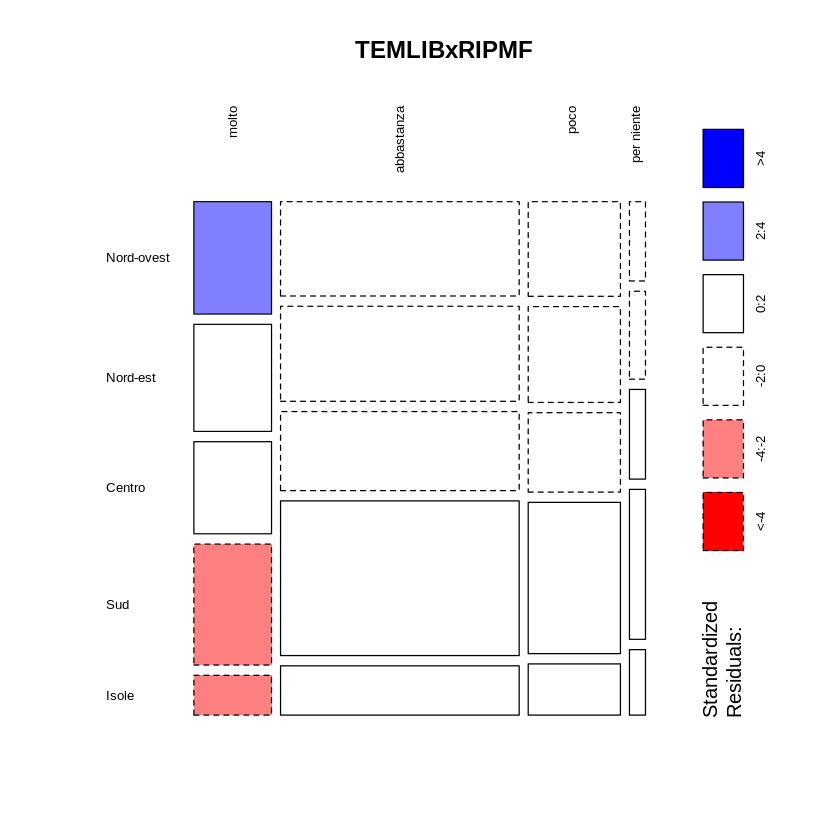

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxRIPMF")

    
     Nord-ovest Nord-est Centro  Sud Isole
  no        907      873    798 1513   517
  si        601      639    462  785   252


	Pearson's Chi-squared test

data:  tab
X-squared = 36.782, df = 4, p-value = 1.998e-07


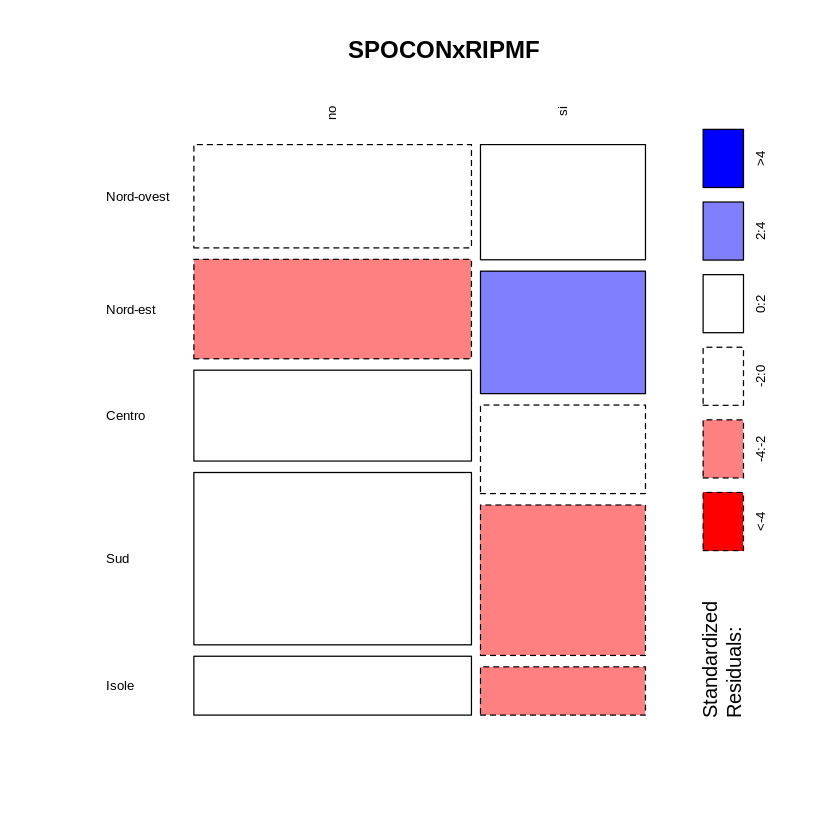

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxRIPMF")

    
     Nord-ovest Nord-est Centro  Sud Isole
  no        652      602    603 1243   422
  si        253      270    193  262    94


	Pearson's Chi-squared test

data:  tab
X-squared = 76.637, df = 4, p-value = 8.976e-16


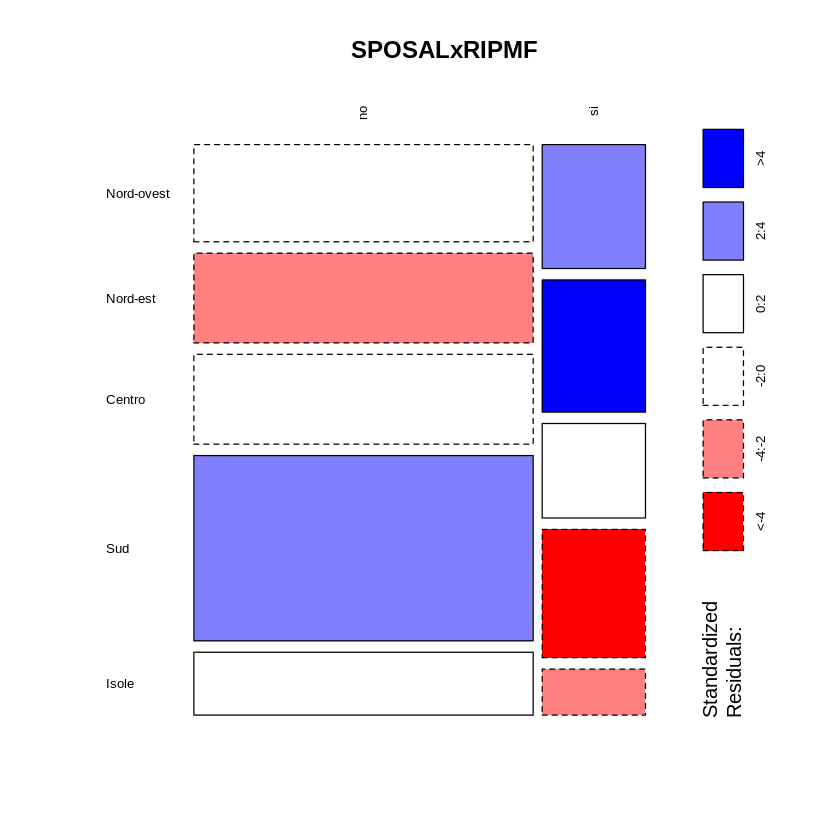

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxRIPMF")

                                 
                                  Nord-ovest Nord-est Centro Sud Isole
  no                                     214      160    256 653   242
  si, una o più volte a settimana        178      203    144 279    77
  si, una o più volte al mese            136      123     98 122    45
  si, più raramente                      114      109     89 168    52


	Pearson's Chi-squared test

data:  tab
X-squared = 195.2, df = 12, p-value < 2.2e-16


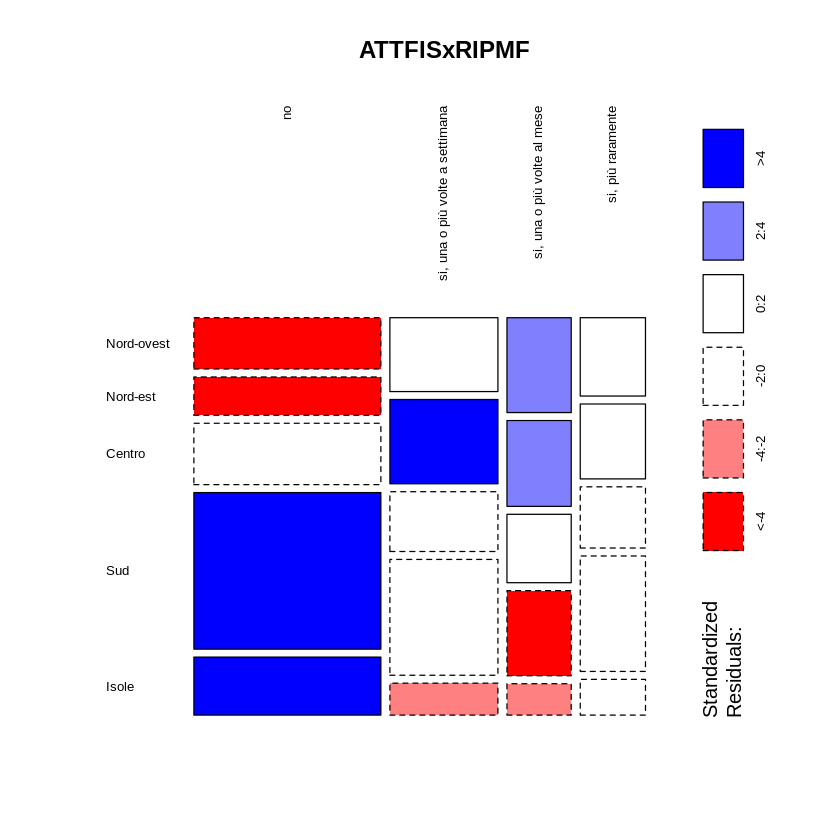

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxRIPMF")

                                        
                                         Nord-ovest Nord-est Centro Sud Isole
  Nell'ultima settimana non ho praticato        159      160    108 162    66
  Fino a 2 ore                                  282      279    196 335   109
  Da più di 2 ore fino a 4 ore                  204      207    183 308    79
  Da più di 4 ore fino a 6 ore                  115      143     92 150    52
  Da più di 6 ore fino a 10 ore                  61       70     55  57    22
  Più di 10 ore                                  33       50     20  33    16


	Pearson's Chi-squared test

data:  tab
X-squared = 34.297, df = 20, p-value = 0.02419


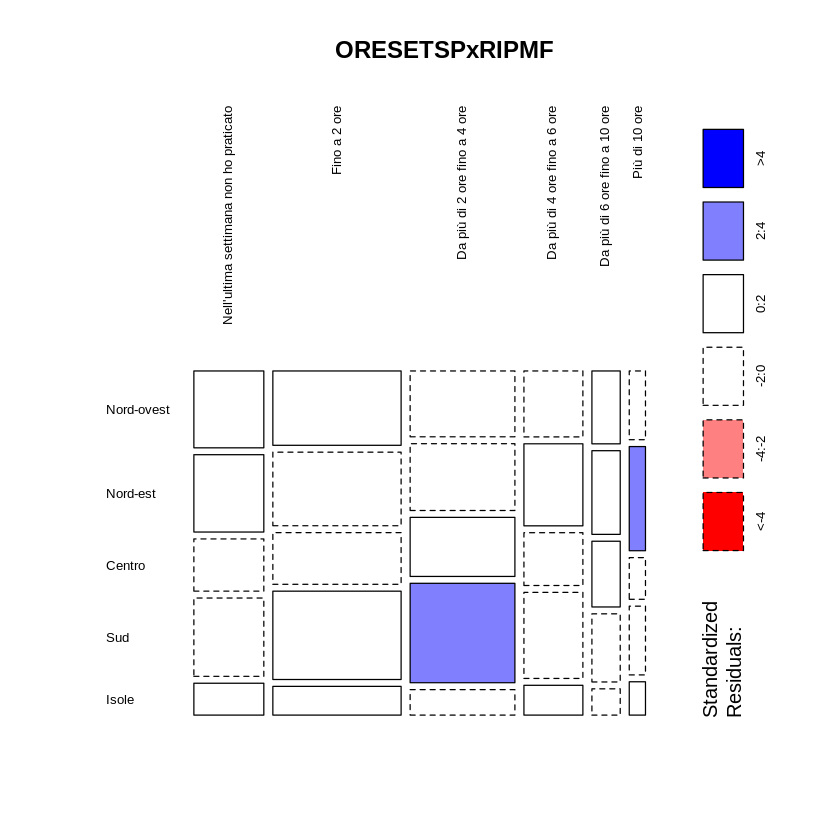

In [ ]:
tab<-table(AVQ18.sport$ORESETSP,AVQ18.sport$RIPMF)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ORESETSPxRIPMF")

            
             italiana straniera
  sottopeso       483        22
  normopeso      4552       268
  sovrappeso     1417       114
  obeso           306        24


	Pearson's Chi-squared test

data:  tab
X-squared = 10.746, df = 3, p-value = 0.01318


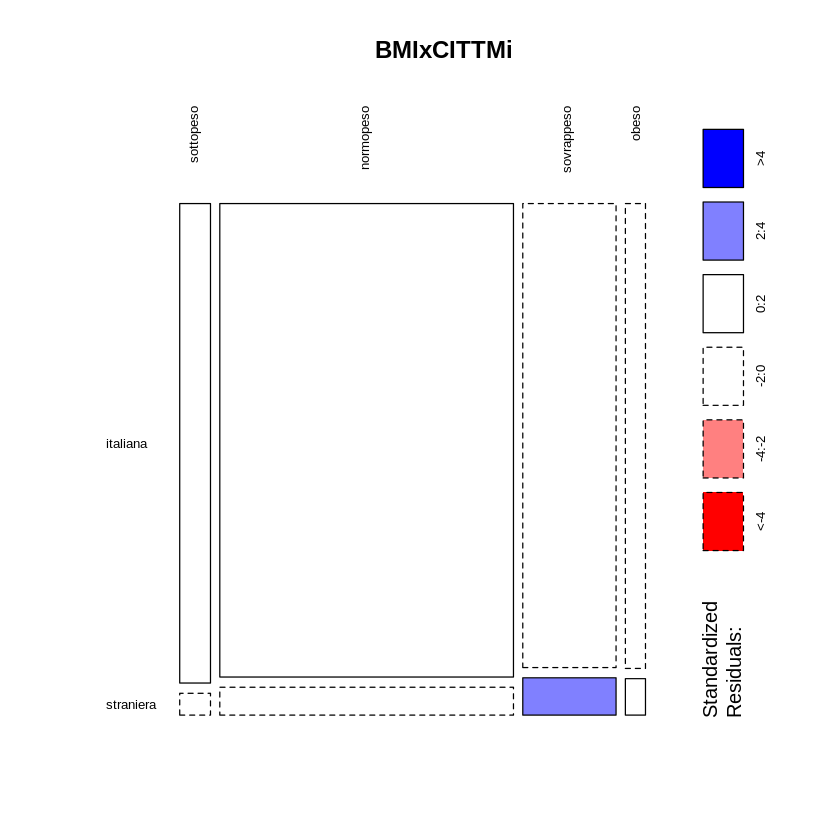

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxCITTMi")

            
             italiana straniera
  molto          1935        96
  abbastanza     4270       292
  poco            373        29
  per niente       83         5


	Pearson's Chi-squared test

data:  tab
X-squared = 8.2348, df = 3, p-value = 0.0414


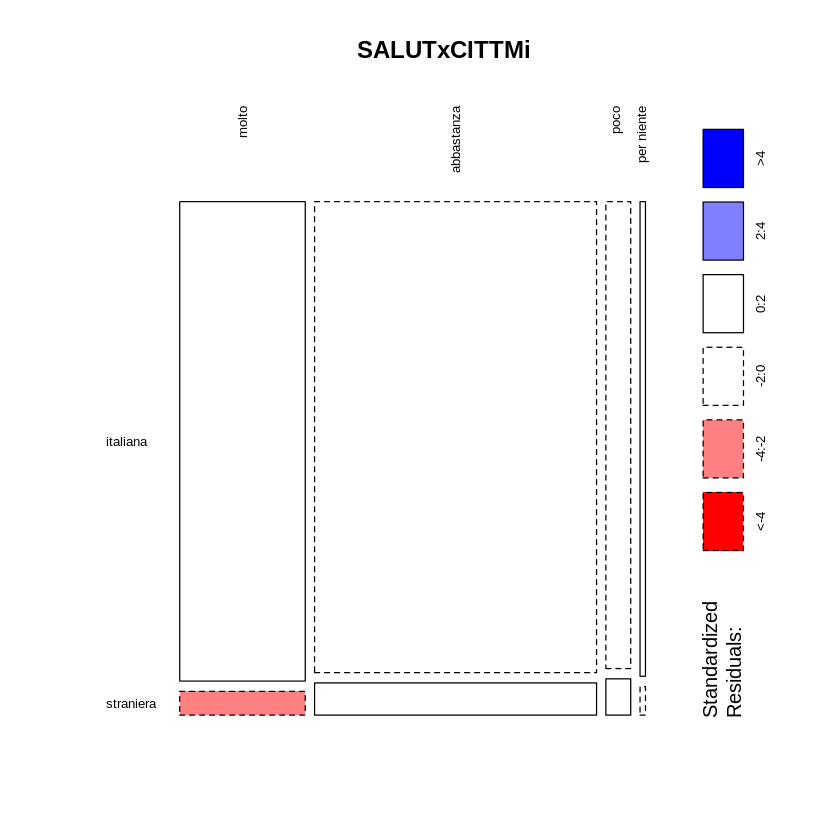

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxCITTMi")

            
             italiana straniera
  molto          1259        45
  abbastanza     3744       236
  poco           1419       116
  per niente      237        26


	Pearson's Chi-squared test

data:  tab
X-squared = 28.81, df = 3, p-value = 2.455e-06


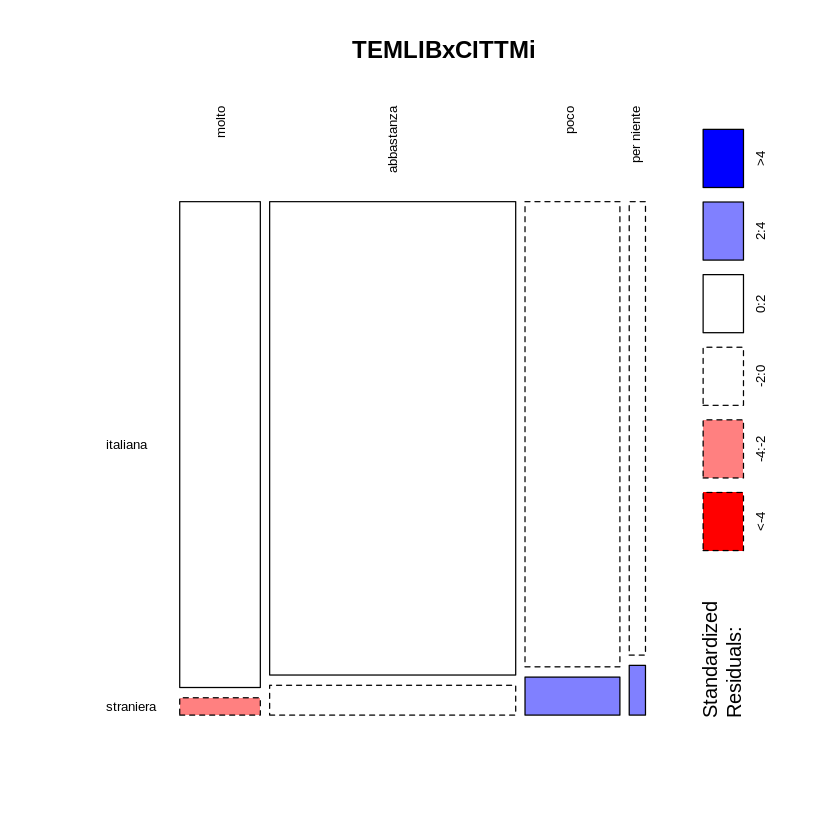

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxCITTMi")

    
     italiana straniera
  no     4122       340
  si     2620        87


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 57.608, df = 1, p-value = 3.2e-14


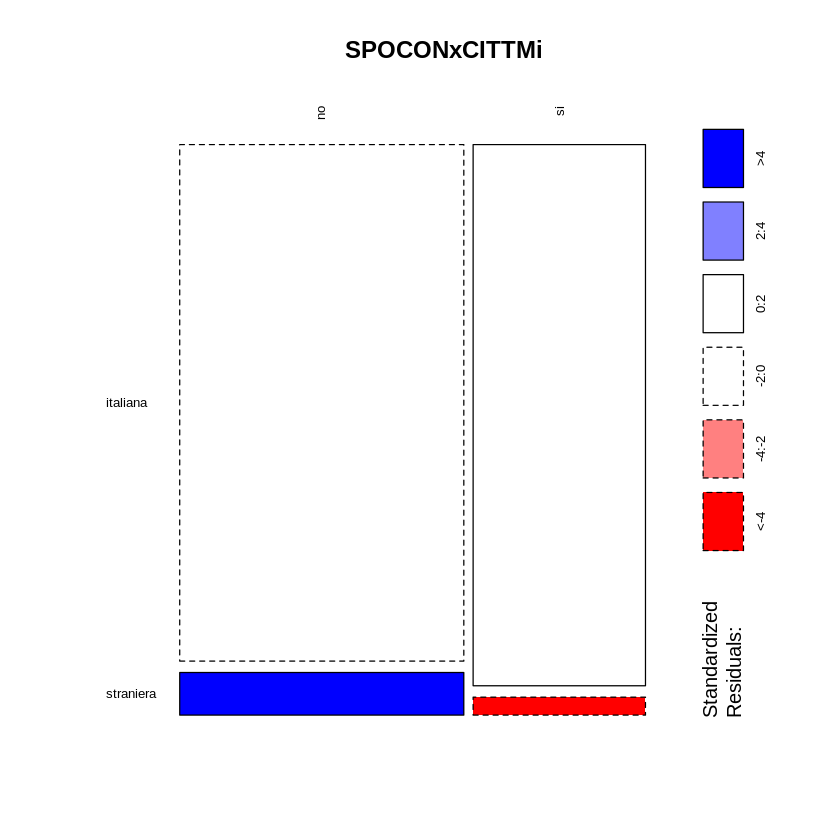

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxCITTMi")

    
     italiana straniera
  no     3116       287
  si      994        53


	Pearson's Chi-squared test with Yates' continuity correction

data:  tab
X-squared = 12.425, df = 1, p-value = 0.0004236


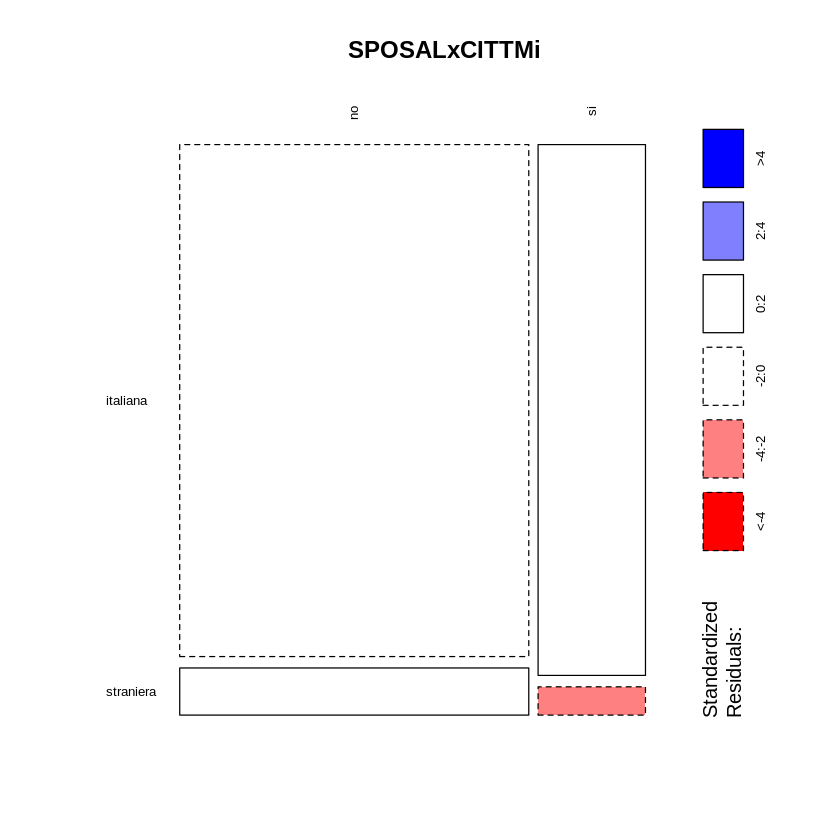

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxCITTMi")

                                 
                                  italiana straniera
  no                                  1344       133
  si, una o più volte a settimana      772        80
  si, una o più volte al mese          456        44
  si, più raramente                    493        26


	Pearson's Chi-squared test

data:  tab
X-squared = 9.577, df = 3, p-value = 0.02253


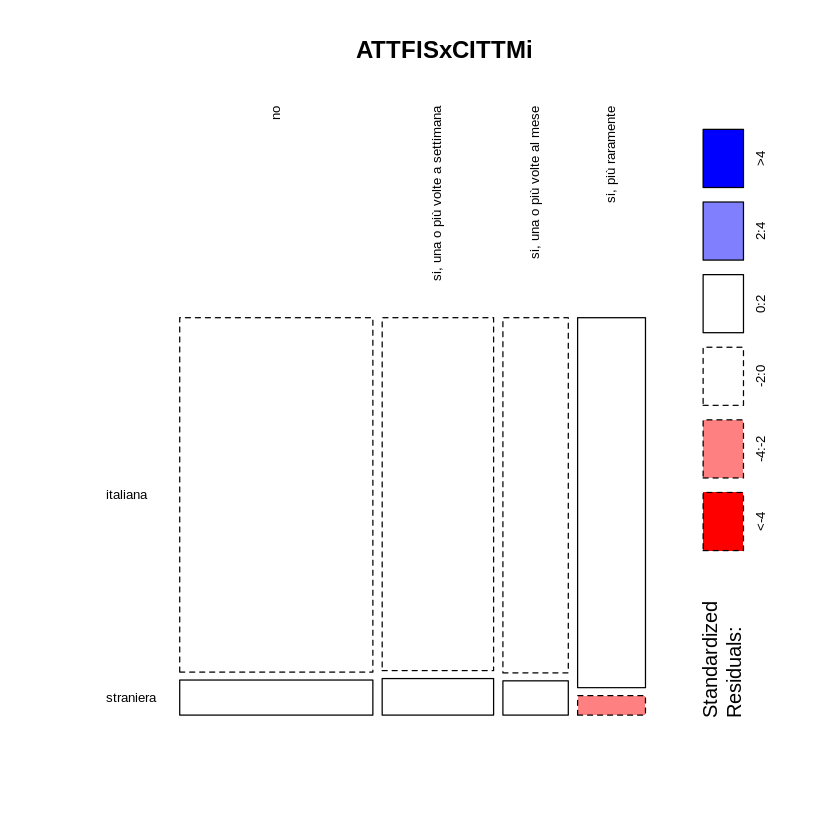

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxCITTMi")

                                 
                                  italiana straniera
  cinque o più volte a settimana       259        18
  tre o quattro volte a settimana     1044        27
  due volte a settimana               1277        43
  una volta a settimana                503        30
  due o tre volte al mese              312        16
  una volta al mese                     86         3
  qualche volta durante l'anno         130         3

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 18.471, df = 6, p-value = 0.005157


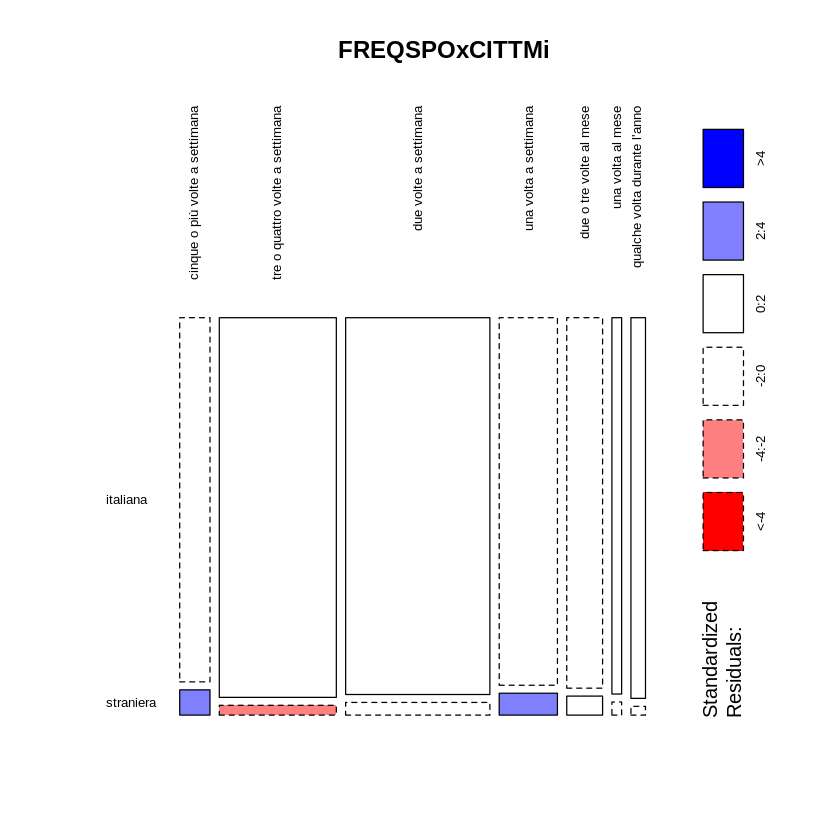

In [ ]:
tab<-table(AVQ18.sport$FREQSPO,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="FREQSPOxCITTMi")

                                        
                                         italiana straniera
  Nell'ultima settimana non ho praticato      620        27
  Fino a 2 ore                               1127        54
  Da più di 2 ore fino a 4 ore                932        36
  Da più di 4 ore fino a 6 ore                535        12
  Da più di 6 ore fino a 10 ore               252         6
  Più di 10 ore                               143         5


	Pearson's Chi-squared test

data:  tab
X-squared = 7.7422, df = 5, p-value = 0.171


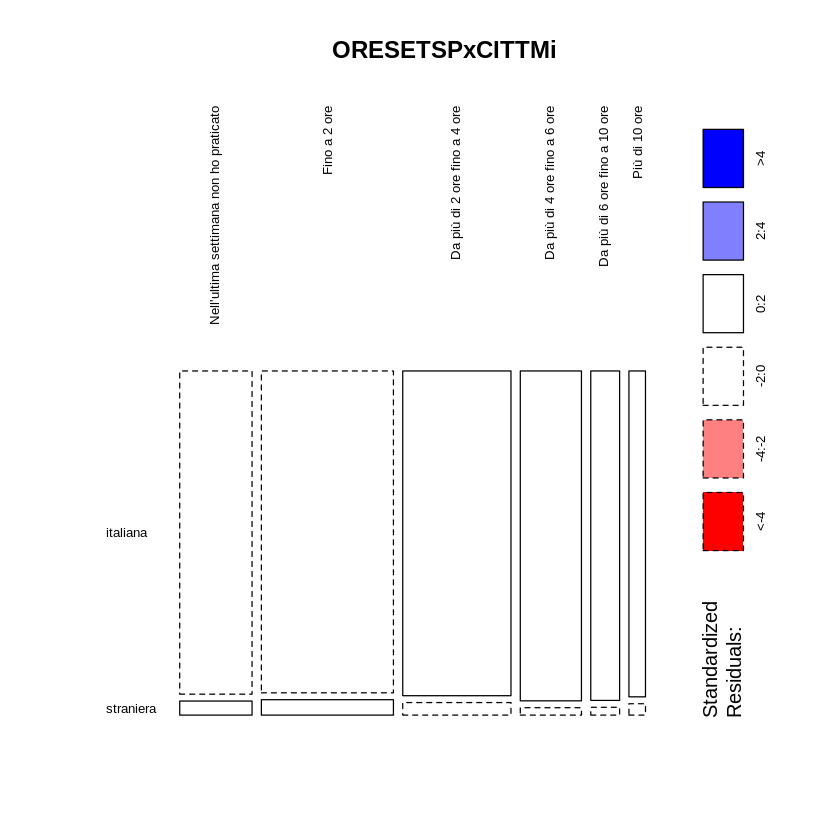

In [ ]:
tab<-table(AVQ18.sport$ORESETSP,AVQ18.sport$CITTMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ORESETSPxCITTMi")

                                 
                                  Nell'ultima settimana non ho praticato
  cinque o più volte a settimana                                       5
  tre o quattro volte a settimana                                     52
  due volte a settimana                                              140
  una volta a settimana                                              112
  due o tre volte al mese                                            176
  una volta al mese                                                   57
  qualche volta durante l'anno                                       113
                                 
                                  Fino a 2 ore Da più di 2 ore fino a 4 ore
  cinque o più volte a settimana            38                           27
  tre o quattro volte a settimana          164                          299
  due volte a settimana                    511                          544
  una volta a settimana                    3

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 3092.4, df = 30, p-value < 2.2e-16


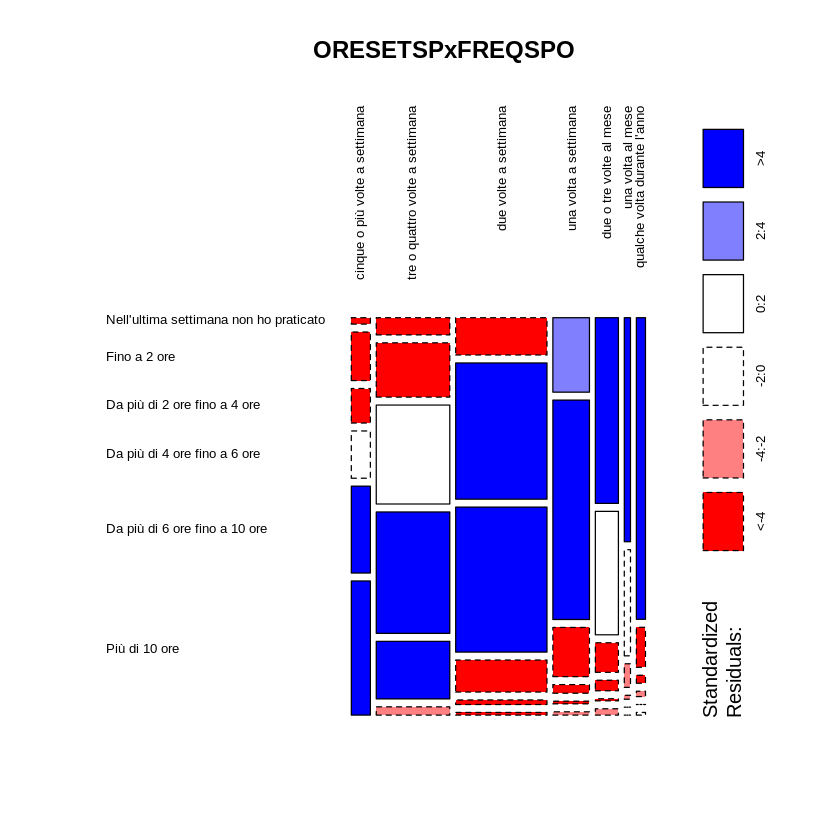

In [ ]:
tab<-table(AVQ18.sport$FREQSPO,AVQ18.sport$ORESETSP)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ORESETSPxFREQSPO")

            
             laurea e post-laurea diploma licenza di scuola media
  sottopeso                   137     286                      88
  normopeso                  1134    2713                     945
  sovrappeso                  284     843                     382
  obeso                        40     184                     103
            
             licenza di scuola elementare/nessun titolo
  sottopeso                                           2
  normopeso                                          19
  sovrappeso                                         14
  obeso                                               0

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 77.317, df = 9, p-value = 5.504e-13


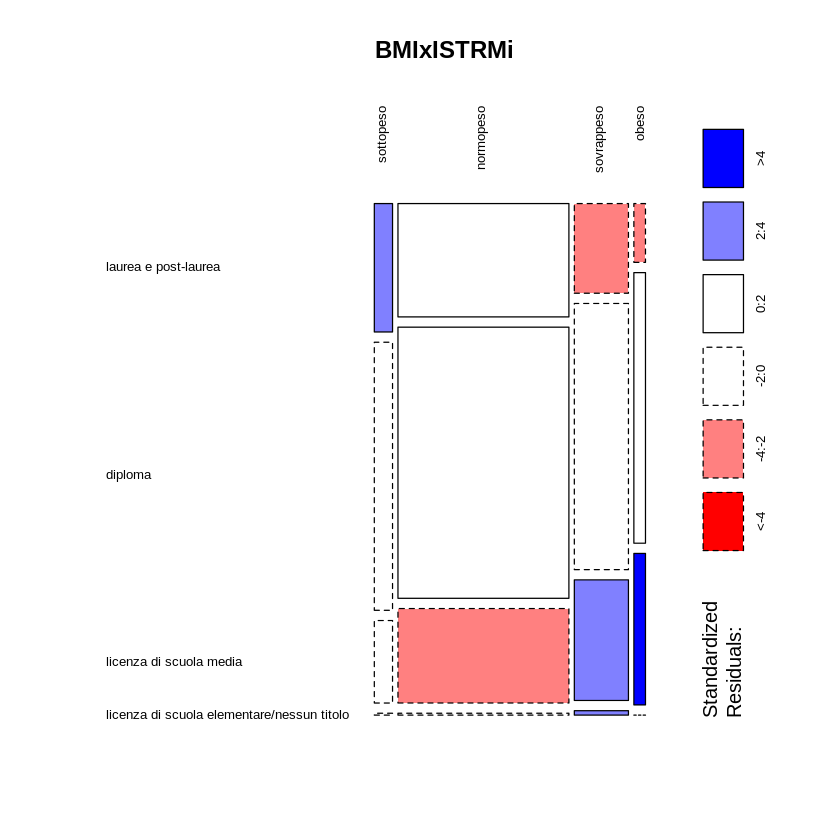

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$ISTRMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxISTRMi")

            
             laurea e post-laurea diploma licenza di scuola media
  molto                       464    1150                     413
  abbastanza                 1006    2575                     954
  poco                         89     211                      97
  per niente                   11      37                      32
            
             licenza di scuola elementare/nessun titolo
  molto                                               8
  abbastanza                                         21
  poco                                                4
  per niente                                          1

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 24.702, df = 9, p-value = 0.003319


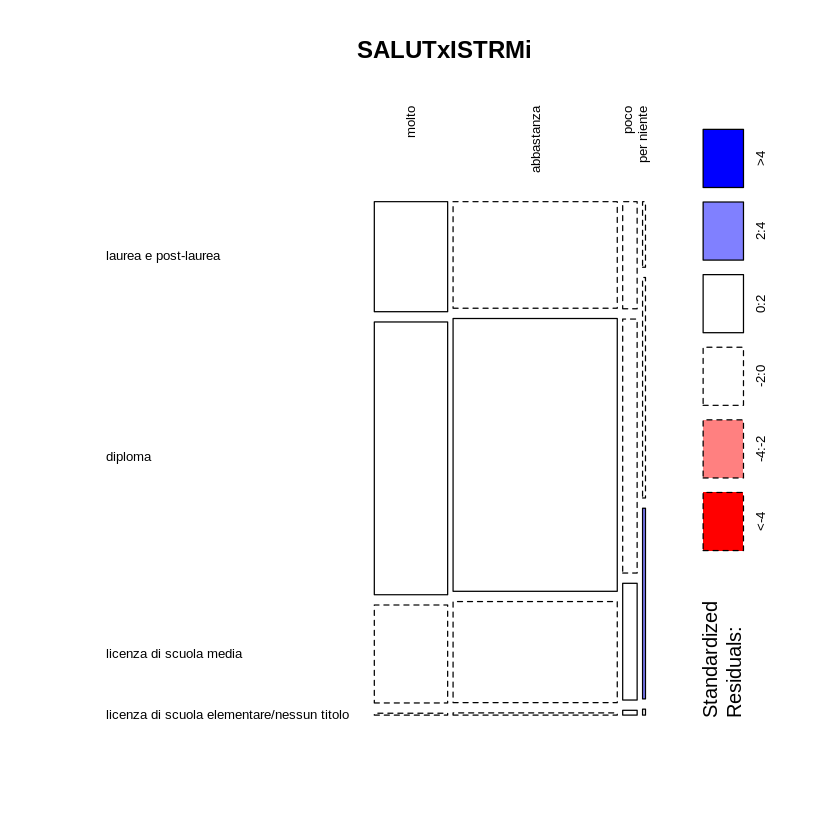

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$ISTRMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxISTRMi")

            
             laurea e post-laurea diploma licenza di scuola media
  molto                       277     742                     273
  abbastanza                  896    2262                     795
  poco                        342     834                     352
  per niente                   55     135                      74
            
             licenza di scuola elementare/nessun titolo
  molto                                               6
  abbastanza                                         16
  poco                                                9
  per niente                                          4

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 20.57, df = 9, p-value = 0.0147


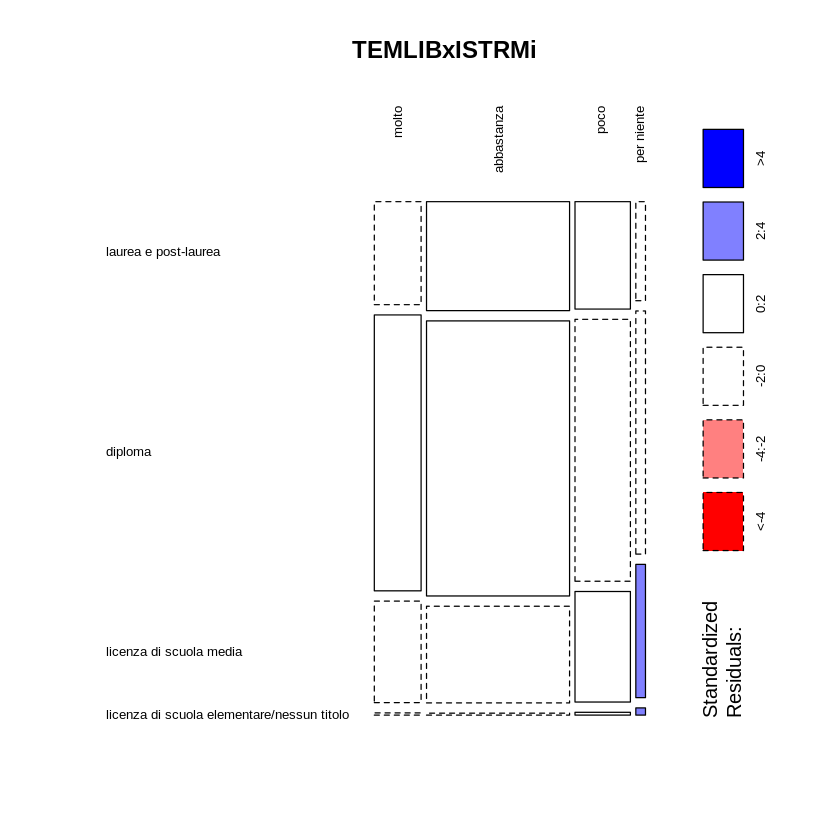

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$ISTRMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxISTRMi")

    
     laurea e post-laurea diploma licenza di scuola media
  no                  872    2452                    1113
  si                  721    1561                     403
    
     licenza di scuola elementare/nessun titolo
  no                                         29
  si                                          6


	Pearson's Chi-squared test

data:  tab
X-squared = 127.39, df = 3, p-value < 2.2e-16


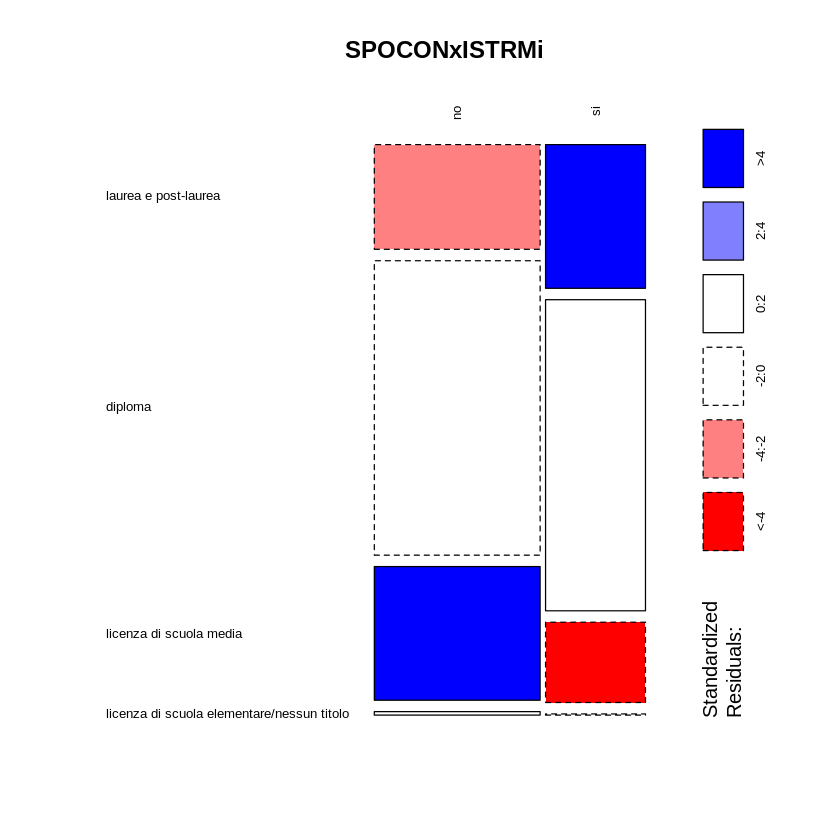

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$ISTRMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxISTRMi")

    
     laurea e post-laurea diploma licenza di scuola media
  no                  584    1850                     951
  si                  285     596                     158
    
     licenza di scuola elementare/nessun titolo
  no                                         28
  si                                          0


	Pearson's Chi-squared test

data:  tab
X-squared = 104.65, df = 3, p-value < 2.2e-16


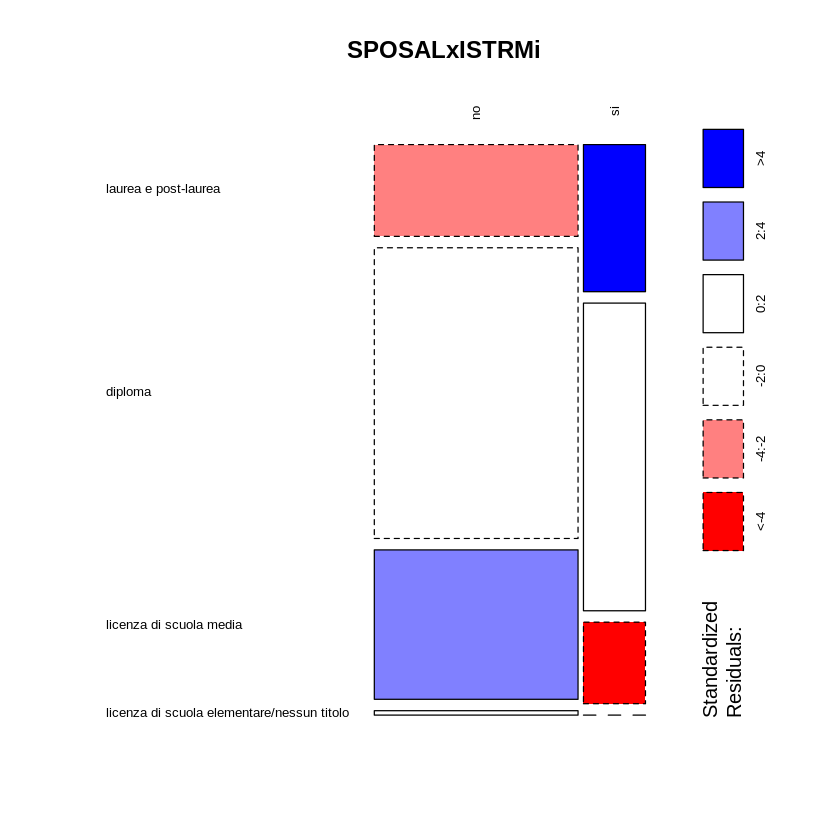

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$ISTRMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxISTRMi")

                                 
                                  laurea e post-laurea diploma
  no                                               174     757
  si, una o più volte a settimana                  186     463
  si, una o più volte al mese                      123     278
  si, più raramente                                 95     311
                                 
                                  licenza di scuola media
  no                                                  518
  si, una o più volte a settimana                     205
  si, una o più volte al mese                         106
  si, più raramente                                   111
                                 
                                  licenza di scuola elementare/nessun titolo
  no                                                                      21
  si, una o più volte a settimana                                          2
  si, una o più volte al mese                                 

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 116, df = 9, p-value < 2.2e-16


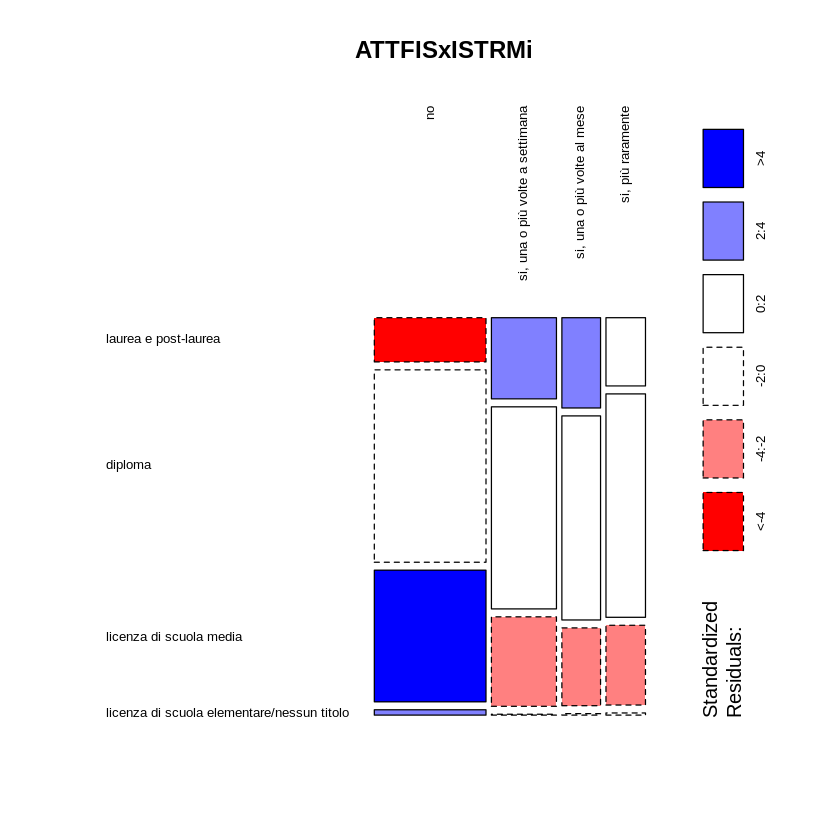

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$ISTRMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxISTRMi")

            
             occupato in cerca di occupazione inattivo; altra condizione
  sottopeso       203                     107                        195
  normopeso      2272                     874                       1694
  sovrappeso      843                     306                        397
  obeso           171                      66                         99


	Pearson's Chi-squared test

data:  tab
X-squared = 62.552, df = 6, p-value = 1.362e-11


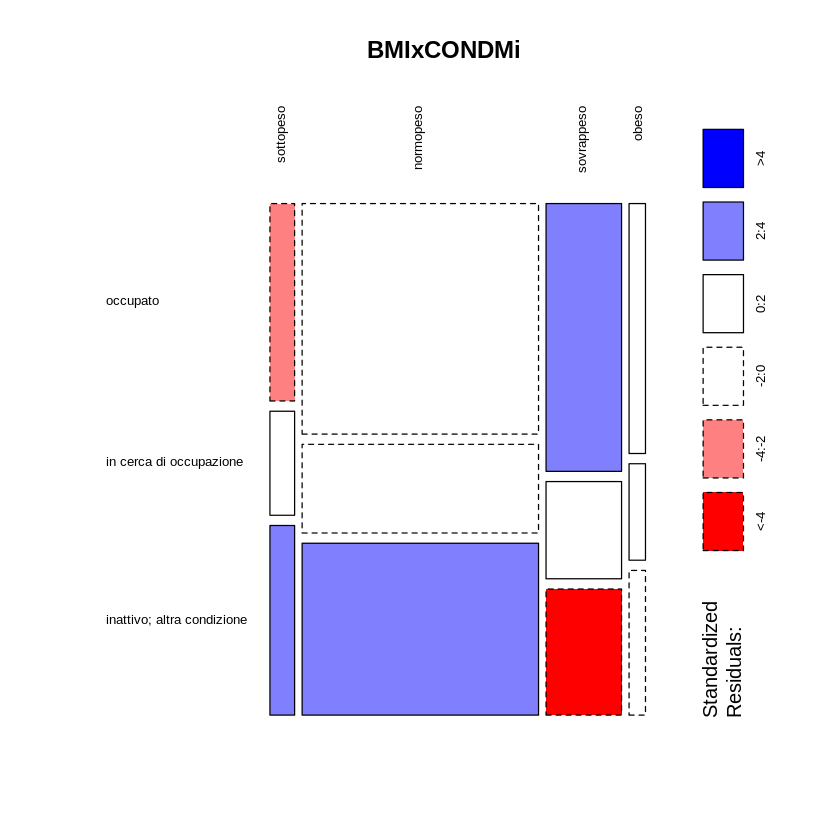

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$CONDMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxCONDMi")

            
             occupato in cerca di occupazione inattivo; altra condizione
  molto           996                     326                        721
  abbastanza     2223                     891                       1482
  poco            192                      89                        121
  per niente       28                      26                         31


	Pearson's Chi-squared test

data:  tab
X-squared = 27.986, df = 6, p-value = 9.454e-05


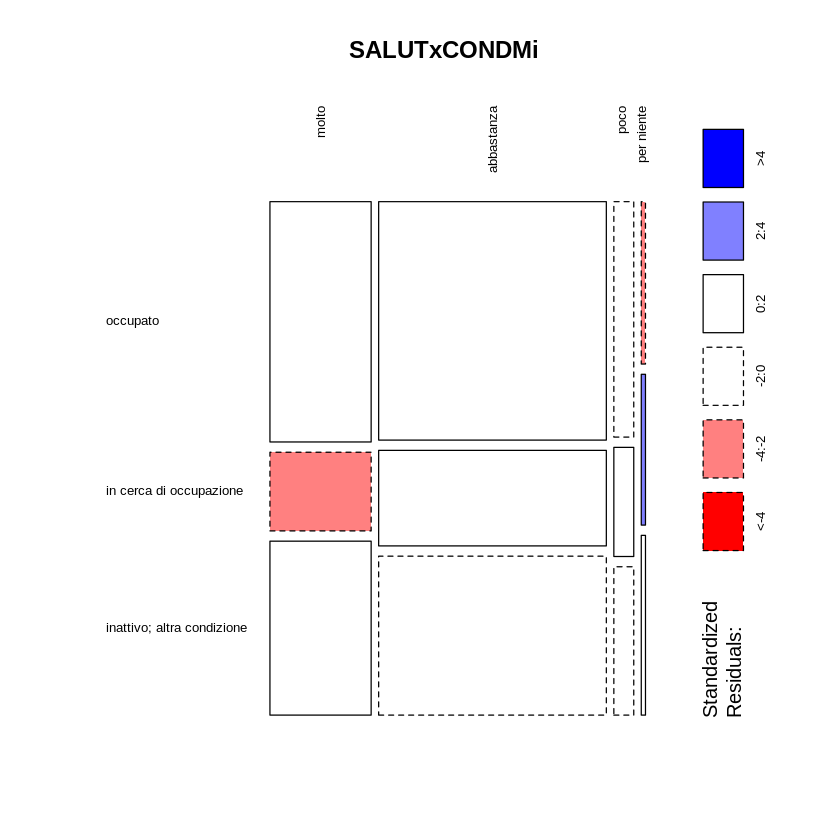

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$CONDMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxCONDMi")

            
             occupato in cerca di occupazione inattivo; altra condizione
  molto           561                     253                        482
  abbastanza     1855                     789                       1359
  poco            871                     232                        452
  per niente      153                      55                         63


	Pearson's Chi-squared test

data:  tab
X-squared = 70.794, df = 6, p-value = 2.811e-13


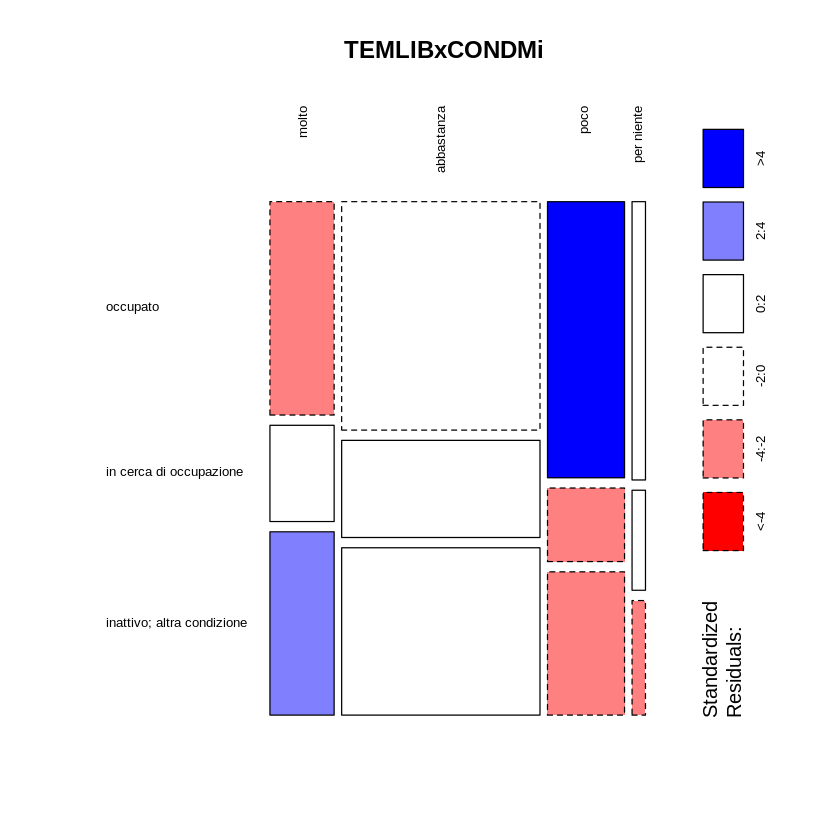

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$CONDMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxCONDMi")

    
     occupato in cerca di occupazione inattivo; altra condizione
  no     2096                     938                       1483
  si     1391                     409                        894


	Pearson's Chi-squared test

data:  tab
X-squared = 37.782, df = 2, p-value = 6.247e-09


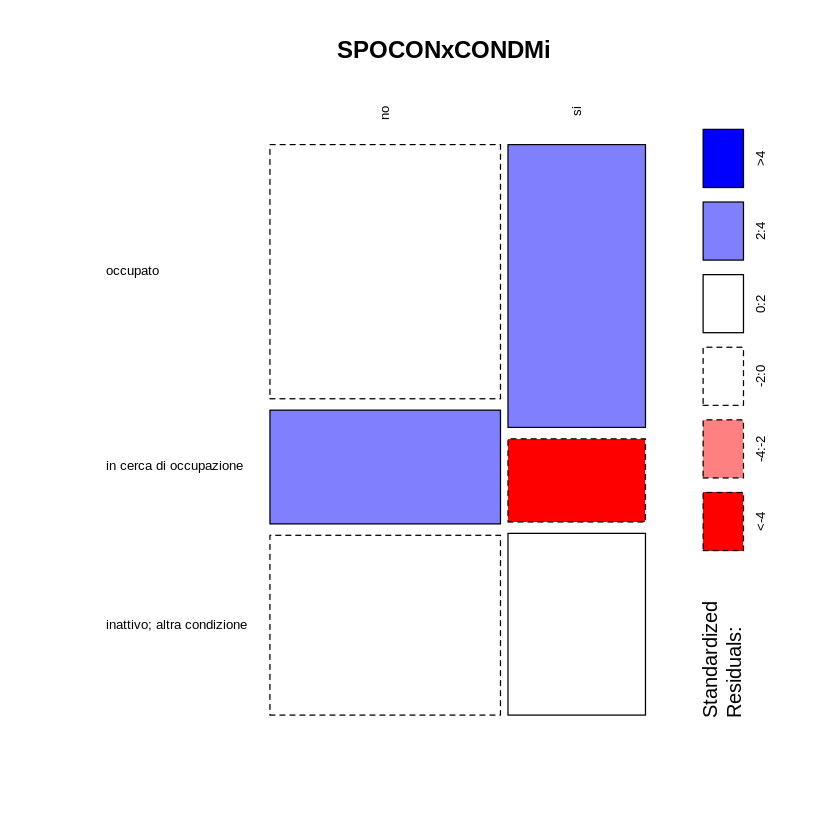

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$CONDMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxCONDMi")

    
     occupato in cerca di occupazione inattivo; altra condizione
  no     1574                     763                       1112
  si      515                     174                        365


	Pearson's Chi-squared test

data:  tab
X-squared = 15.441, df = 2, p-value = 0.0004436


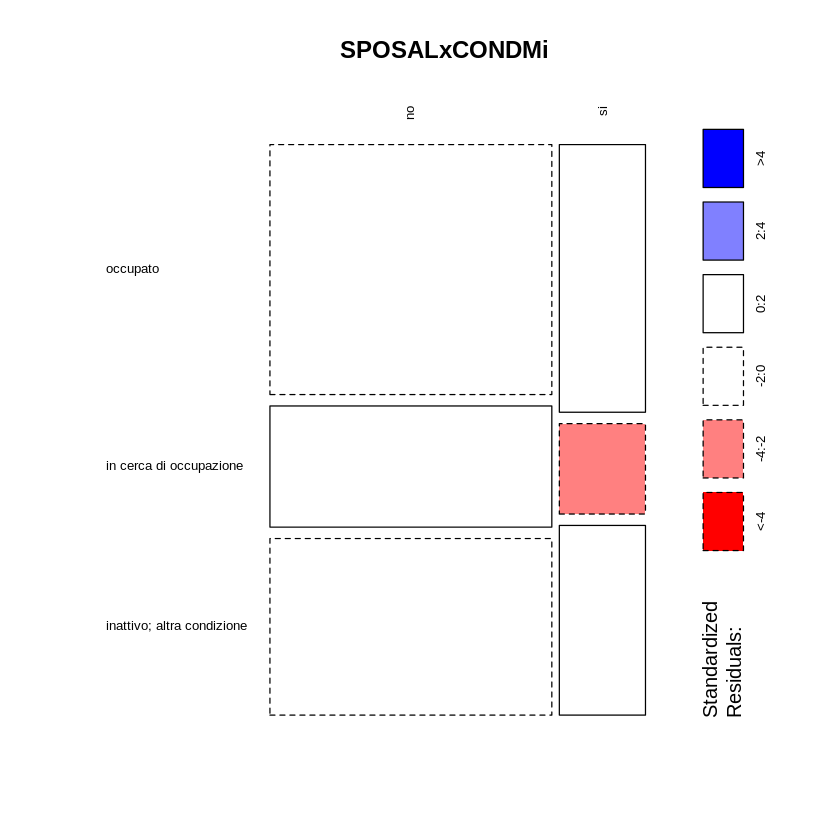

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$CONDMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxCONDMi")

                                 
                                  occupato in cerca di occupazione
  no                                   636                     362
  si, una o più volte a settimana      359                     216
  si, una o più volte al mese          275                      78
  si, più raramente                    277                      92
                                 
                                  inattivo; altra condizione
  no                                                     488
  si, una o più volte a settimana                        293
  si, una o più volte al mese                            159
  si, più raramente                                      154


	Pearson's Chi-squared test

data:  tab
X-squared = 44.074, df = 6, p-value = 7.146e-08


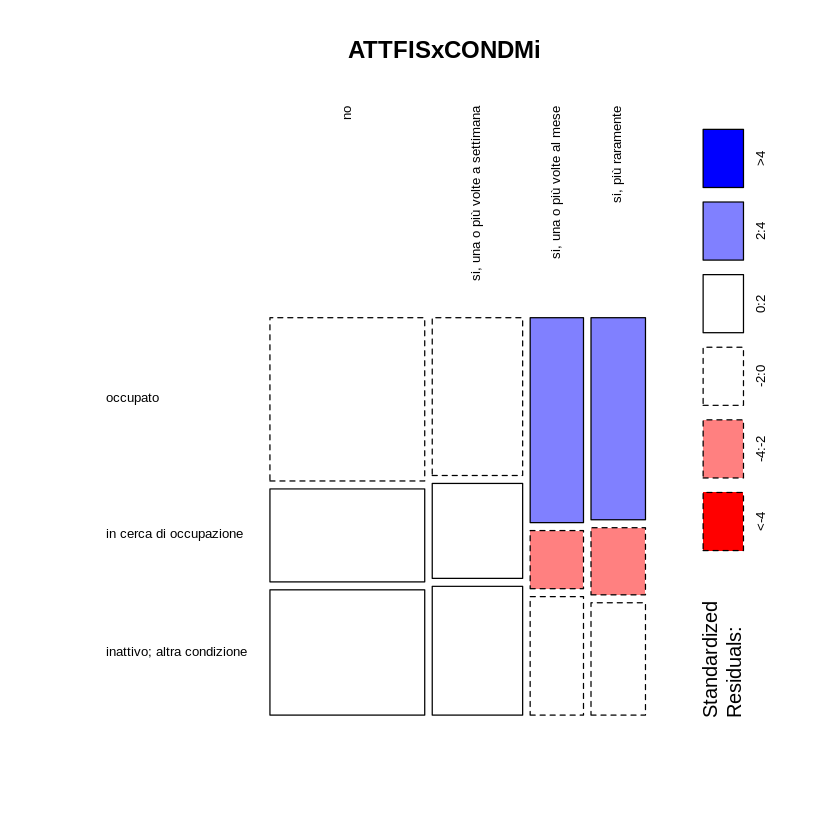

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$CONDMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxCONDMi")

            
             celibe/nubile coniugato/unito civilmente separato/divorziato
  sottopeso            437                         62                   7
  normopeso           4149                        595                  84
  sovrappeso          1158                        345                  31
  obeso                216                        110                   6
            
             vedovo
  sottopeso      12
  normopeso     113
  sovrappeso     40
  obeso           7


	Pearson's Chi-squared test

data:  tab
X-squared = 180.94, df = 9, p-value < 2.2e-16


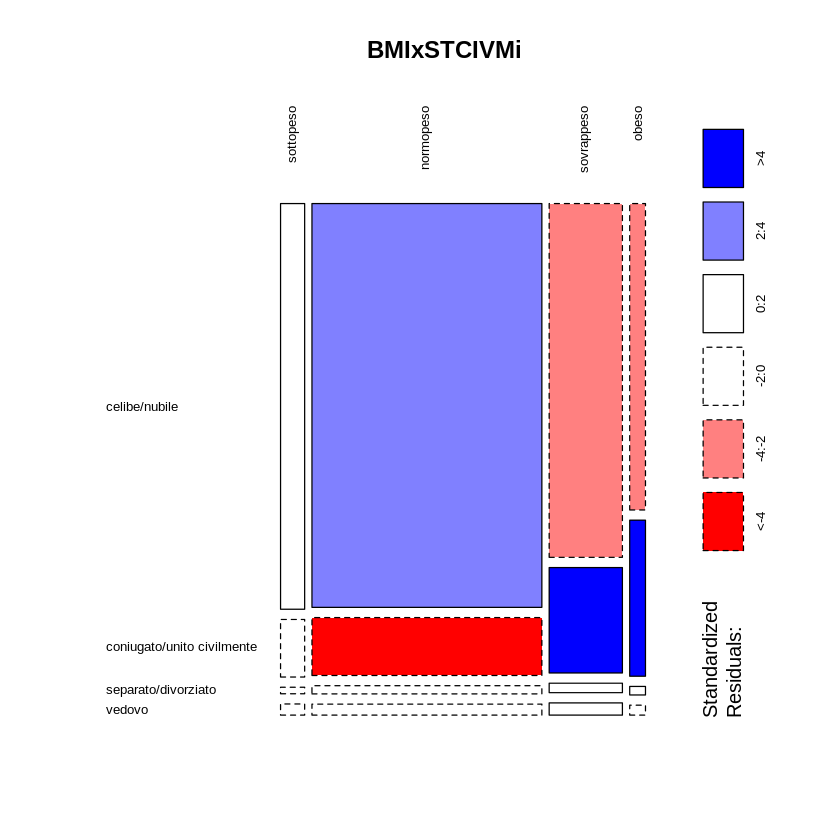

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxSTCIVMi")

            
             celibe/nubile coniugato/unito civilmente separato/divorziato
  molto               1740                        271                  32
  abbastanza          3726                        762                  81
  poco                 326                         63                  10
  per niente            80                          6                   1
            
             vedovo
  molto          48
  abbastanza    113
  poco            9
  per niente      1

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 20.679, df = 9, p-value = 0.01415


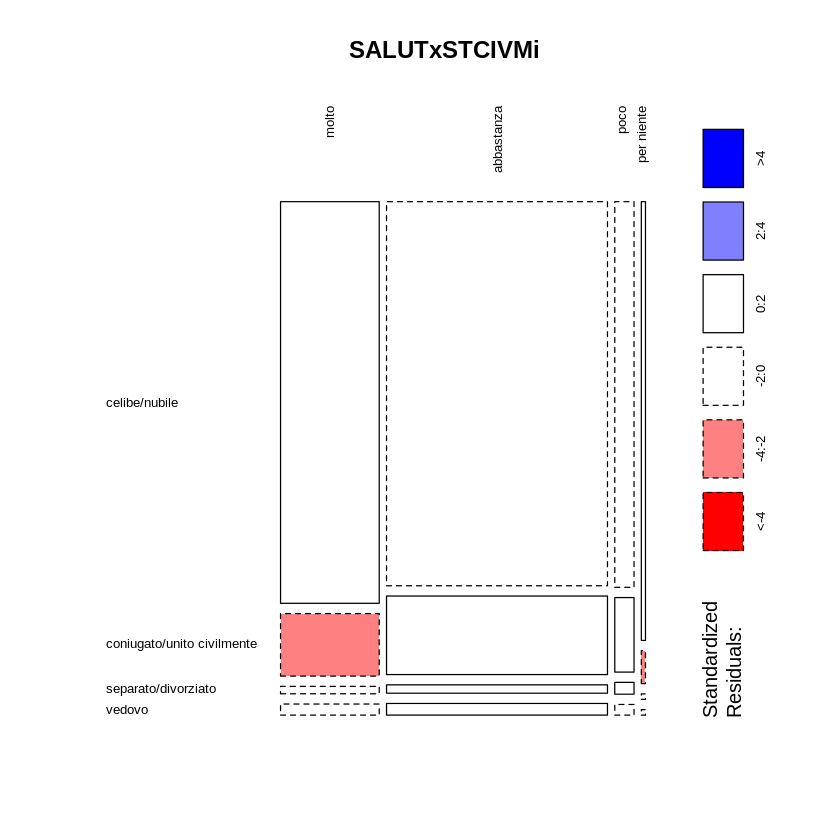

In [ ]:
tab<-table(AVQ18.sport$SALUT,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SALUTxSTCIVMi")

            
             celibe/nubile coniugato/unito civilmente separato/divorziato
  molto               1160                        132                  13
  abbastanza          3338                        584                  66
  poco                1167                        331                  36
  per niente           205                         56                   9
            
             vedovo
  molto          26
  abbastanza     94
  poco           47
  per niente      4

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 99.566, df = 9, p-value < 2.2e-16


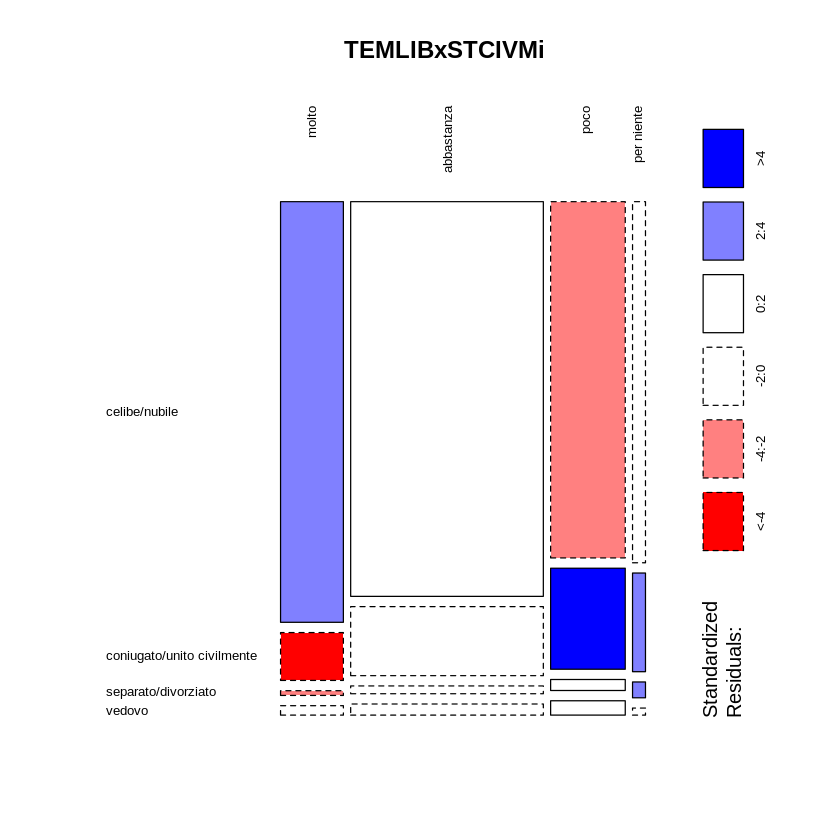

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxSTCIVMi")

    
     celibe/nubile coniugato/unito civilmente separato/divorziato vedovo
  no          3527                        865                  93    130
  si          2417                        246                  35     42


	Pearson's Chi-squared test

data:  tab
X-squared = 155.59, df = 3, p-value < 2.2e-16


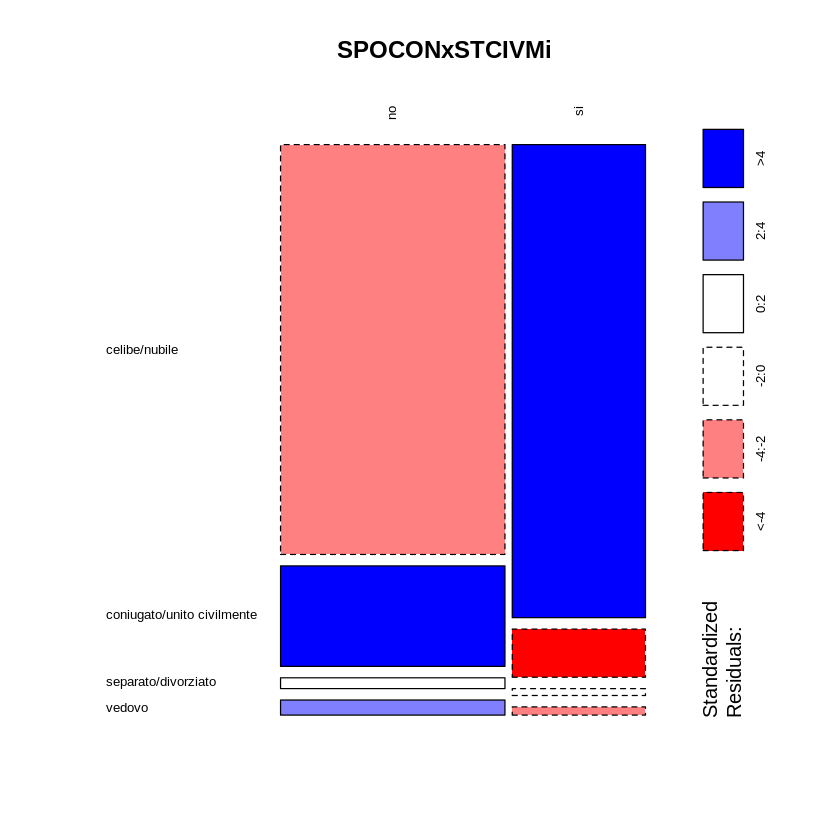

In [ ]:
tab<-table(AVQ18.sport$SPOCON,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOCONxSTCIVMi")

    
     celibe/nubile coniugato/unito civilmente separato/divorziato vedovo
  no          2598                        752                  82     95
  si           917                        111                  11     35


	Pearson's Chi-squared test

data:  tab
X-squared = 75.605, df = 3, p-value = 2.688e-16


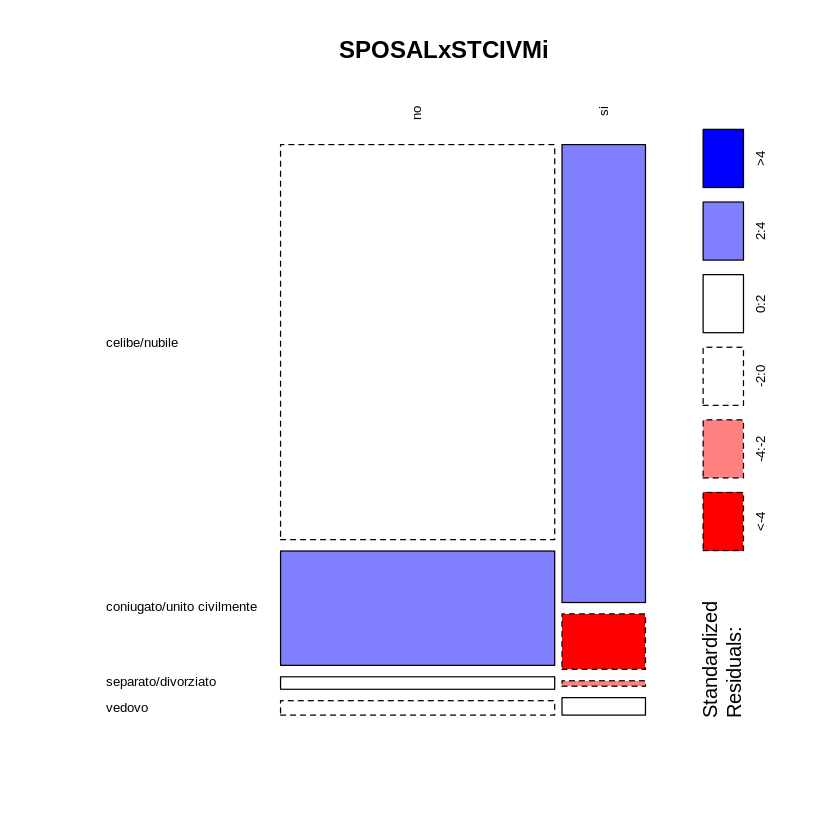

In [ ]:
tab<-table(AVQ18.sport$SPOSAL,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="SPOSALxSTCIVMi")

                                 
                                  celibe/nubile coniugato/unito civilmente
  no                                       1100                        336
  si, una o più volte a settimana           680                        172
  si, una o più volte al mese               391                        114
  si, più raramente                         386                        113
                                 
                                  separato/divorziato vedovo
  no                                               46     46
  si, una o più volte a settimana                  16     15
  si, una o più volte al mese                       6     13
  si, più raramente                                14     19


	Pearson's Chi-squared test

data:  tab
X-squared = 16.566, df = 9, p-value = 0.05596


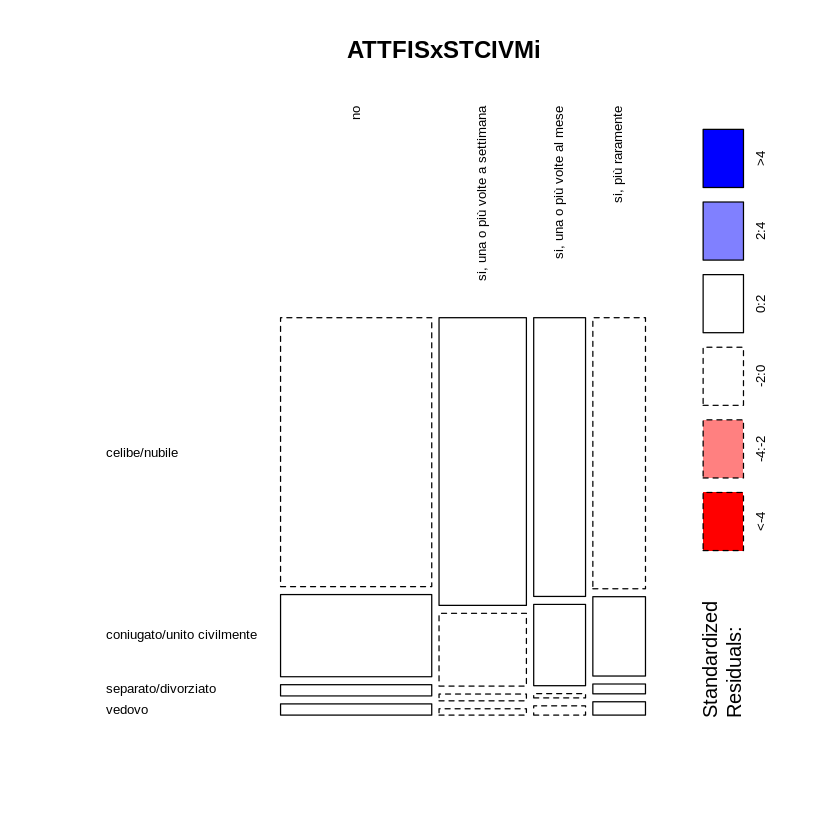

In [ ]:
tab<-table(AVQ18.sport$ATTFIS,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ATTFISxSTCIVMi")

                                 
                                  celibe/nubile coniugato/unito civilmente
  cinque o più volte a settimana            249                         27
  tre o quattro volte a settimana           994                         61
  due volte a settimana                    1179                        123
  una volta a settimana                     438                         75
  due o tre volte al mese                   289                         37
  una volta al mese                          74                         13
  qualche volta durante l'anno              107                         21
                                 
                                  separato/divorziato vedovo
  cinque o più volte a settimana                    3      3
  tre o quattro volte a settimana                   9     18
  due volte a settimana                            19     22
  una volta a settimana                             9     17
  due o tre volte al mese  

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 56.986, df = 18, p-value = 6.221e-06


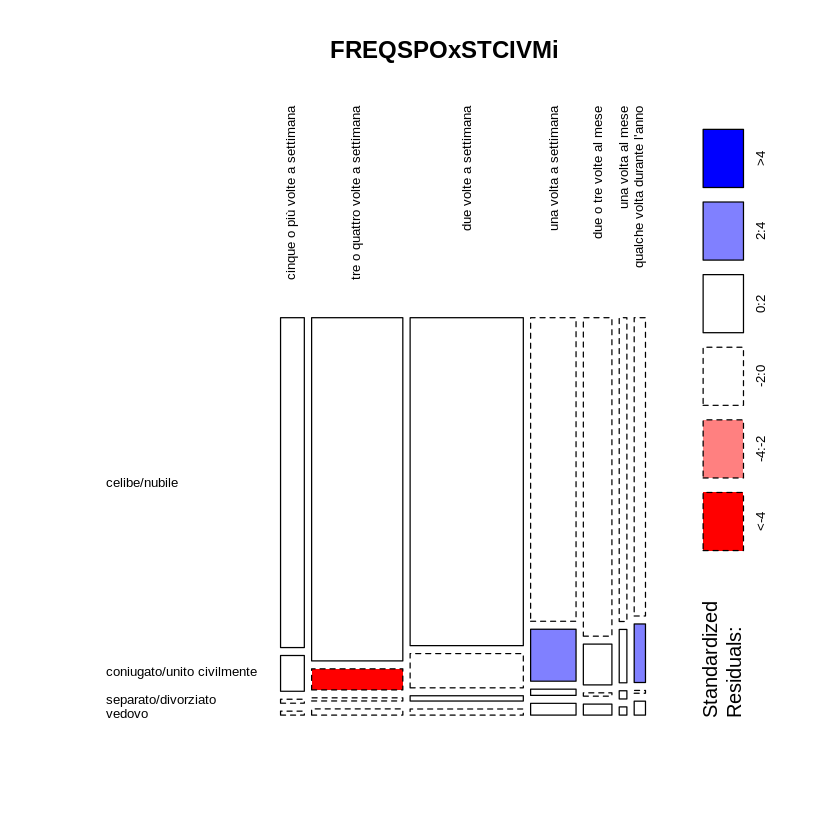

In [ ]:
tab<-table(AVQ18.sport$FREQSPO,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="FREQSPOxSTCIVMi")

                                        
                                         celibe/nubile
  Nell'ultima settimana non ho praticato           558
  Fino a 2 ore                                    1017
  Da più di 2 ore fino a 4 ore                     872
  Da più di 4 ore fino a 6 ore                     502
  Da più di 6 ore fino a 10 ore                    241
  Più di 10 ore                                    140
                                        
                                         coniugato/unito civilmente
  Nell'ultima settimana non ho praticato                         79
  Fino a 2 ore                                                  136
  Da più di 2 ore fino a 4 ore                                   80
  Da più di 4 ore fino a 6 ore                                   33
  Da più di 6 ore fino a 10 ore                                  16
  Più di 10 ore                                                  12
                                        
                

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 46.927, df = 15, p-value = 3.782e-05


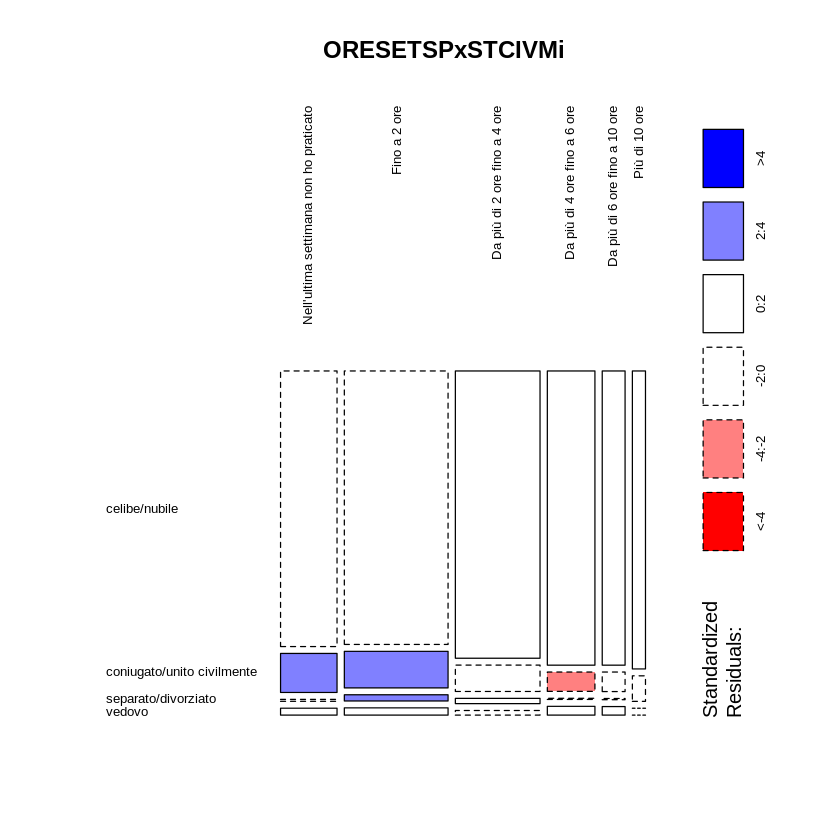

In [ ]:
tab<-table(AVQ18.sport$ORESETSP,AVQ18.sport$STCIVMi)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="ORESETSPxSTCIVMi")

In [ ]:
TEMLIB E SPORT -- LO SPORT MIGLIROA IL TEMPO LIBERO?
RISORSE ECONOMICHE -- BMI ETC

            
             ottime adeguate scarse assolutamente insufficienti
  molto          30      823    405                          68
  abbastanza     49     2495   1321                         194
  poco           14      854    612                          93
  per niente      4      122    105                          41

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 102.7, df = 9, p-value < 2.2e-16


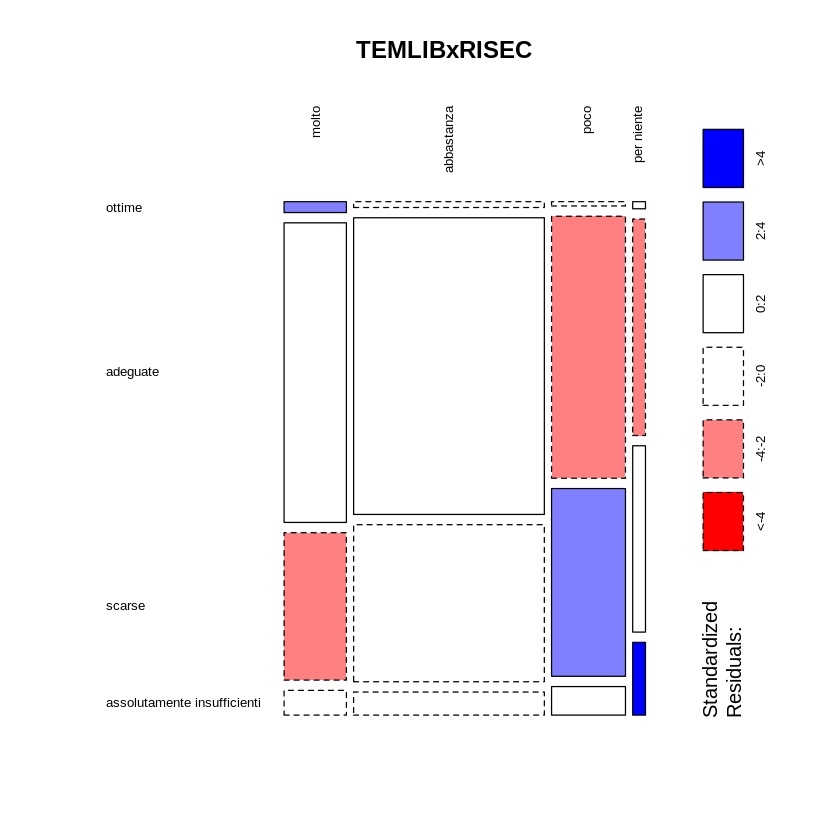

In [ ]:
tab<-table(AVQ18.sport$TEMLIB,AVQ18.sport$RISEC)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="TEMLIBxRISEC")

                             
                              sottopeso normopeso sovrappeso obeso
  ottime                              7        67         21     3
  adeguate                          303      2940        921   181
  scarse                            184      1644        534   125
  assolutamente insufficienti        22       261         91    28

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 11.294, df = 9, p-value = 0.2561


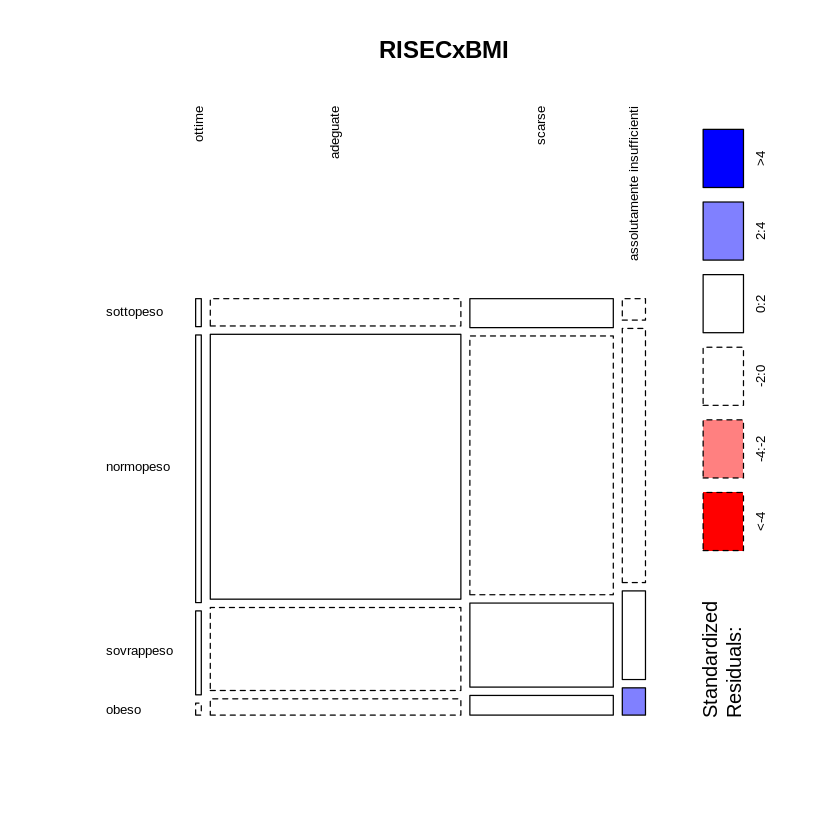

In [ ]:
tab<-table(AVQ18.sport$RISEC,AVQ18.sport$BMI)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="RISECxBMI")

                             
                                no   si
  ottime                        57   41
  adeguate                    2575 1763
  scarse                      1671  808
  assolutamente insufficienti  285  116


	Pearson's Chi-squared test

data:  tab
X-squared = 57.068, df = 3, p-value = 2.486e-12


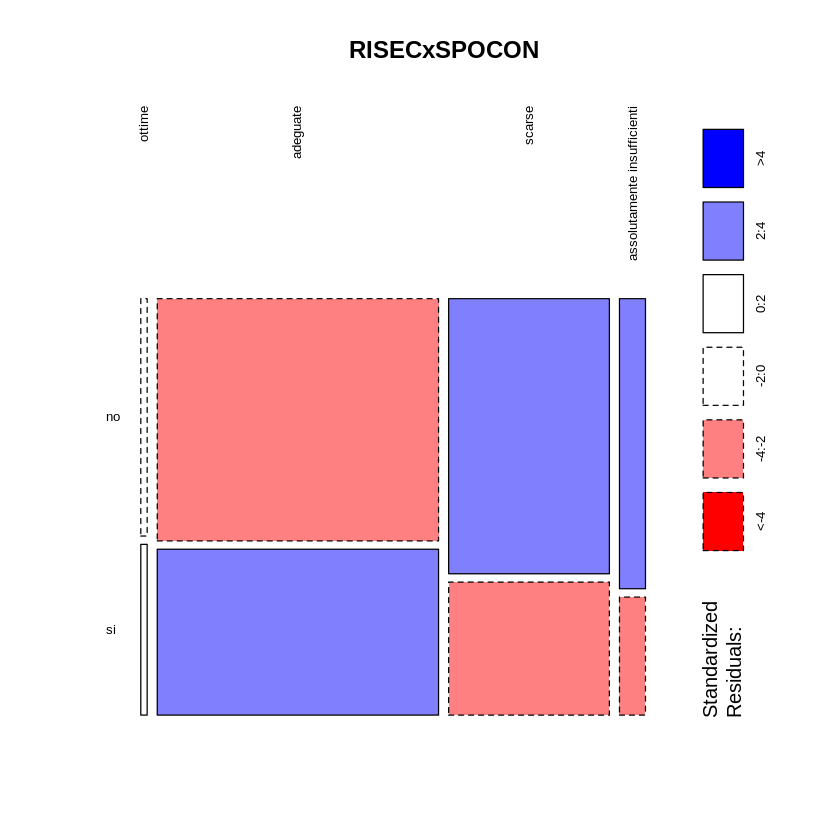

In [ ]:
tab<-table(AVQ18.sport$RISEC,AVQ18.sport$SPOCON)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="RISECxSPOCON")

                             
                                no   si
  ottime                        39   18
  adeguate                    1898  668
  scarse                      1331  336
  assolutamente insufficienti  237   48


	Pearson's Chi-squared test

data:  tab
X-squared = 28.685, df = 3, p-value = 2.608e-06


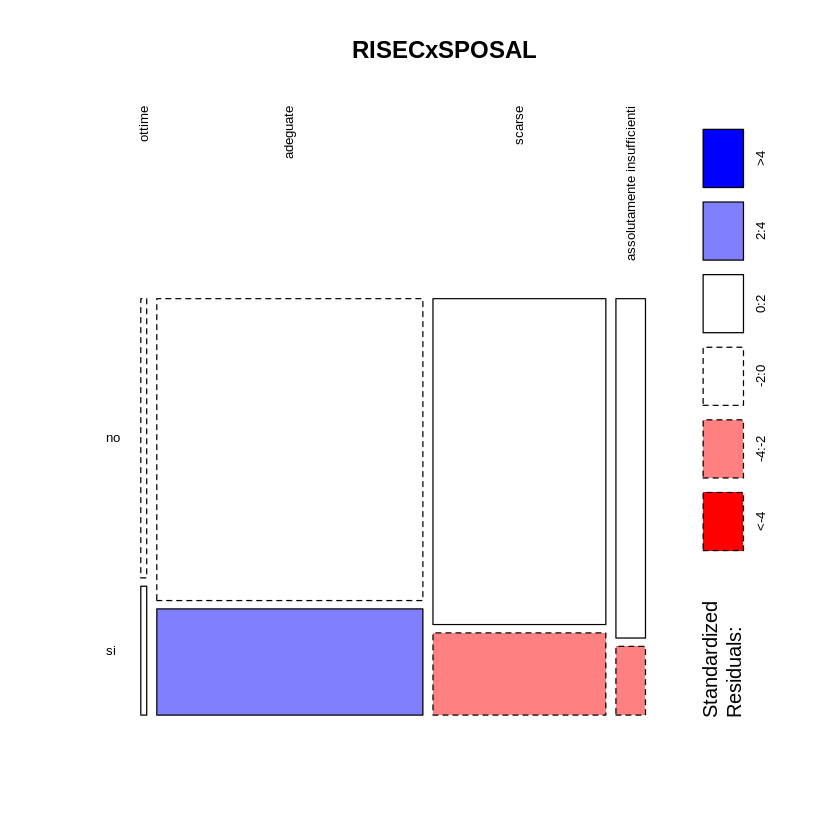

In [ ]:
tab<-table(AVQ18.sport$RISEC,AVQ18.sport$SPOSAL)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="RISECxSPOSAL")

                             
                               no si, una o più volte a settimana
  ottime                       14                              13
  adeguate                    745                             500
  scarse                      634                             320
  assolutamente insufficienti 123                              45
                             
                              si, una o più volte al mese si, più raramente
  ottime                                                7                 5
  adeguate                                            309               303
  scarse                                              180               181
  assolutamente insufficienti                          28                38


	Pearson's Chi-squared test

data:  tab
X-squared = 32.754, df = 9, p-value = 0.0001474


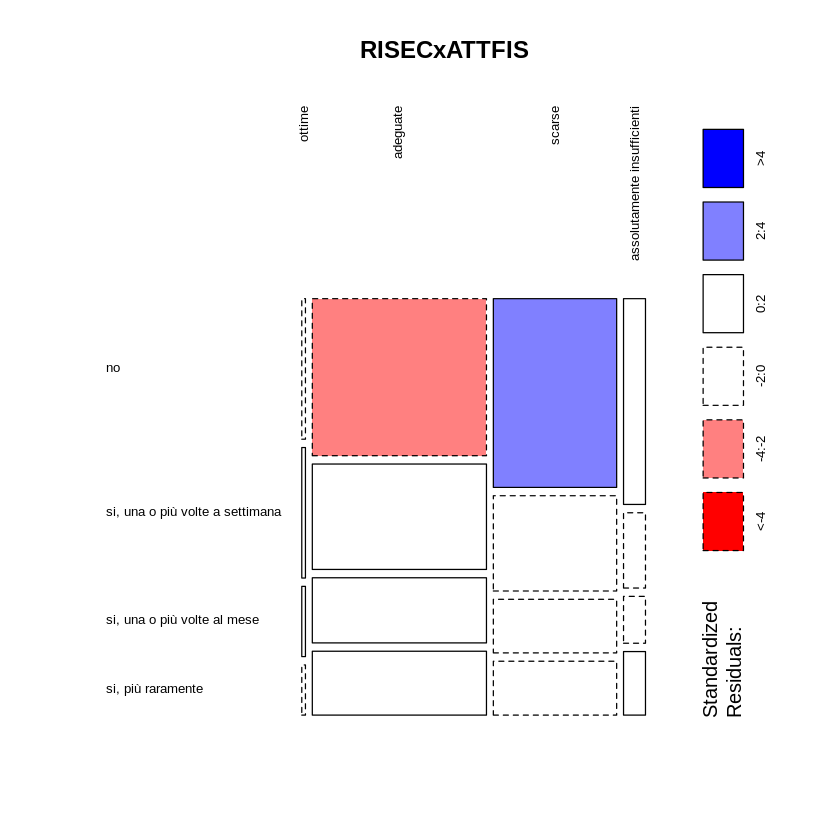

In [ ]:
tab<-table(AVQ18.sport$RISEC,AVQ18.sport$ATTFIS)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="RISECxATTFIS")

                             
                              cinque o più volte a settimana
  ottime                                                   5
  adeguate                                               188
  scarse                                                  71
  assolutamente insufficienti                             17
                             
                              tre o quattro volte a settimana
  ottime                                                    8
  adeguate                                                711
  scarse                                                  307
  assolutamente insufficienti                              52
                             
                              due volte a settimana una volta a settimana
  ottime                                         24                     8
  adeguate                                      829                   352
  scarse                                        439                   158

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 41.508, df = 18, p-value = 0.001295


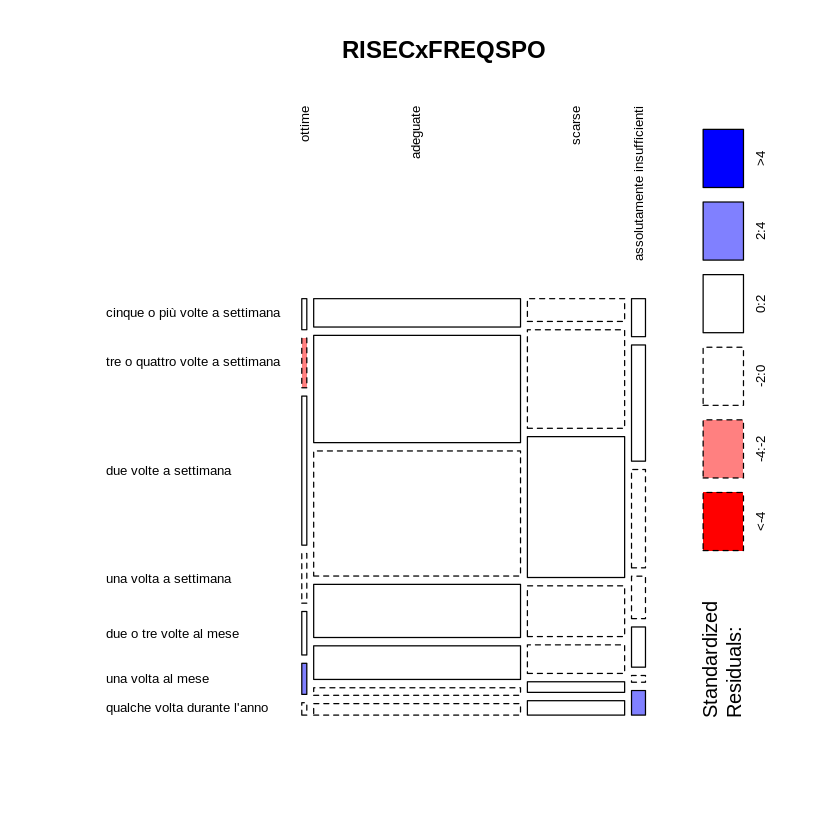

In [ ]:
tab<-table(AVQ18.sport$RISEC,AVQ18.sport$FREQSPO)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="RISECxFREQSPO")

                             
                              Nell'ultima settimana non ho praticato
  ottime                                                           7
  adeguate                                                       413
  scarse                                                         199
  assolutamente insufficienti                                     33
                             
                              Fino a 2 ore Da più di 2 ore fino a 4 ore
  ottime                                25                           15
  adeguate                             757                          626
  scarse                               372                          293
  assolutamente insufficienti           45                           43
                             
                              Da più di 4 ore fino a 6 ore
  ottime                                                 7
  adeguate                                             361
  scarse                    

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tab
X-squared = 8.9992, df = 15, p-value = 0.8776


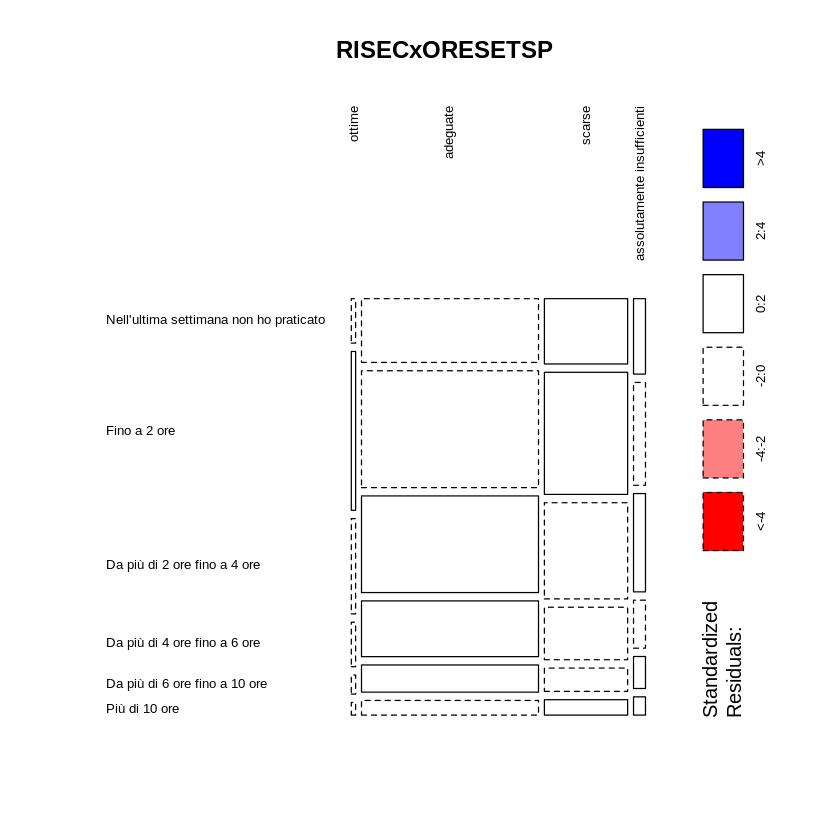

In [ ]:
tab<-table(AVQ18.sport$RISEC,AVQ18.sport$ORESETSP)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="RISECxORESETSP")

In [ ]:
# ftable (tabella di contingenza) ... è come il summary per le bivariate ... per esempo sesso su righe e colonne metti varie colonne dello sport (utile per profilo alimentare!... per regione!... sportivi o non sportivi)
# X^2 (da fare quando si fa ftable?)
# mosaicoplot (fa tutto insieme...)

# barplot da ftable (consumo di alimenti e sesso)

# Provare a vedere nelle bivariate se esiste uan qualche relazione tra stato civile e alimentazione o bmi o altro

            
             continuativamente saltuariamente   no
  sottopeso                156             82  278
  normopeso               1995            703 2221
  sovrappeso               512            258  797
  obeso                     77             31  231


	Pearson's Chi-squared test

data:  tab
X-squared = 104.02, df = 6, p-value < 2.2e-16


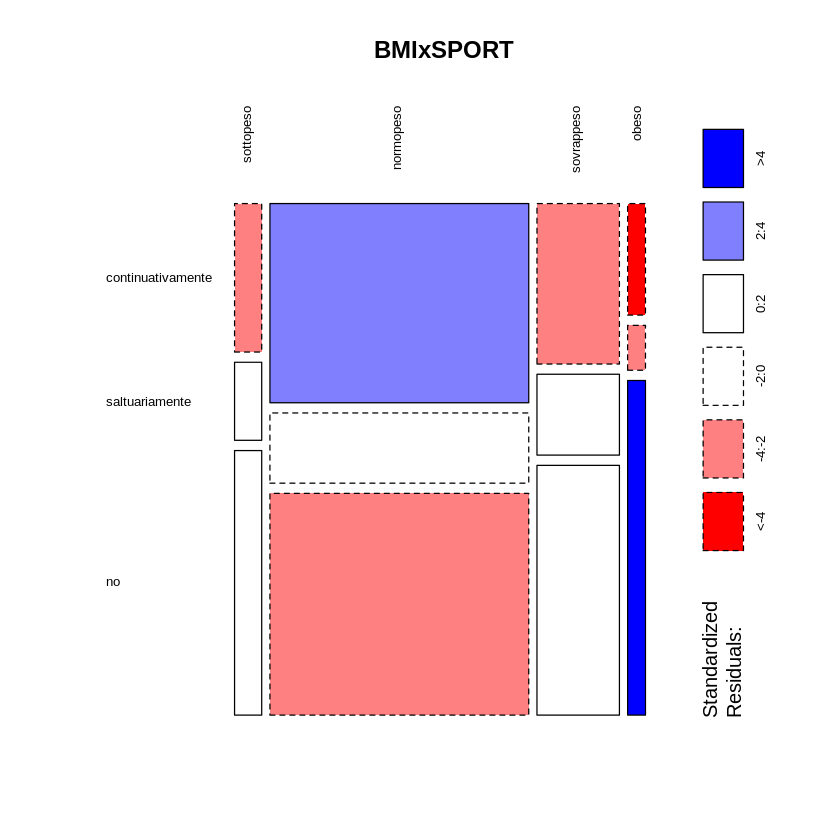

In [ ]:
tab<-table(AVQ18.sport$BMI,AVQ18.sport$SPORT)
tab
chisq.test(tab)
mosaicplot(tab, shade = TRUE, las=2, main="BMIxSPORT")

#### Analisi Multivariata

In [ ]:
library("FactoMineR")
library("factoextra")
library("ggplot2")

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
df <- AVQ18.sport[,c('BMI','SPORT','RISEC','RIPMF')]
df <- na.omit(df)

In [ ]:
head(df)

BMI,SPORT,RISEC,RIPMF
<fct>,<fct>,<fct>,<fct>
normopeso,no,adeguate,Nord-ovest
normopeso,continuativamente,adeguate,Nord-ovest
normopeso,continuativamente,adeguate,Nord-ovest
normopeso,continuativamente,adeguate,Nord-ovest
sottopeso,saltuariamente,adeguate,Nord-ovest
normopeso,no,scarse,Nord-ovest


In [ ]:
# number of categories per variable
cats = apply(df, 2, function(x) nlevels(as.factor(x)))

cats

BMI SPORT RISEC RIPMF 
    4     3     4     5

In [ ]:
# apply MCA
mca1 = MCA(df, graph = FALSE)

# list of results
mca1

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 7295 individuals, described by 4 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 

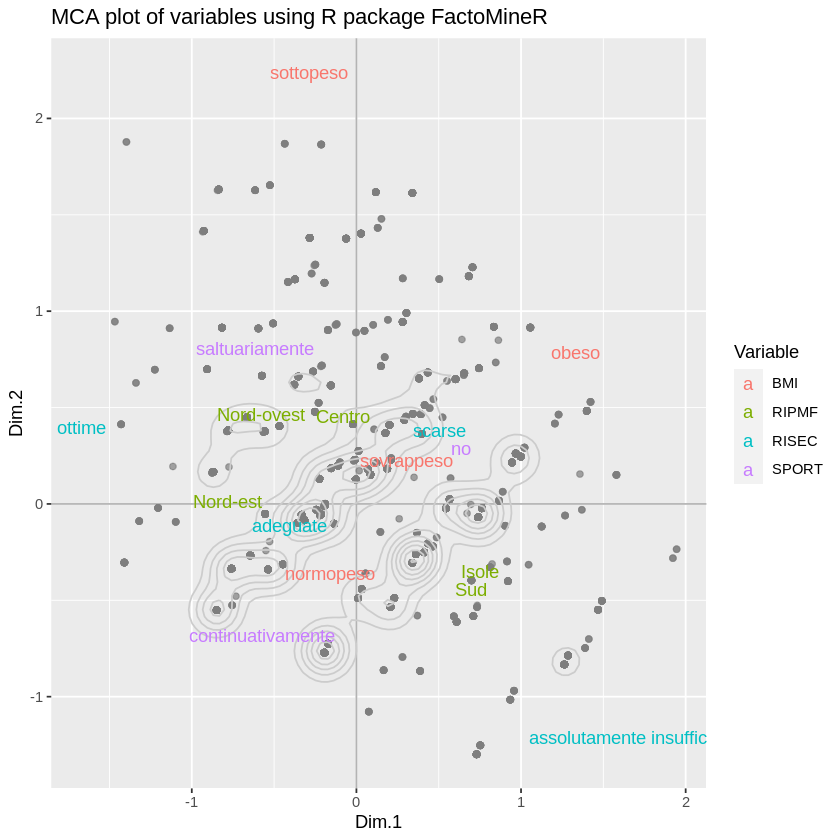

In [ ]:
# data frame with variable coordinates
mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))

# data frame with observation coordinates
mca1_obs_df = data.frame(mca1$ind$coord)

# MCA plot of observations and categories
ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2)) +
  geom_hline(yintercept = 0, colour = "gray70") +
  geom_vline(xintercept = 0, colour = "gray70") +
  geom_point(colour = "gray50", alpha = 0.7) +
  geom_density2d(colour = "gray80") +
  geom_text(data = mca1_vars_df, 
            aes(x = Dim.1, y = Dim.2, 
                label = rownames(mca1_vars_df), colour = Variable)) +
  ggtitle("MCA plot of variables using R package FactoMineR") +
  scale_colour_discrete(name = "Variable")

In [ ]:
# MCA da ripetere con cittadinanza e 